In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

In [2]:
user = "white"
source = f'data/{user}/{user}_chunks/'
save_path = f'data/{user}/'

In [3]:
user = "white"
source = f'data/{user}/{user}_chunks/'

In [4]:
with open(f'{source}{user}_test_acc9.json', 'r') as f:
        data_all = json.load(f)

In [5]:
# run if the first file
data_all = data_all['rawAccelerometer'][0]
watch_pos = data_all['firstName']
print(watch_pos)
values = data_all['values']
t = [i['t'] for i in values]
offset = [i['offset'] for i in values]

KeyError: 'rawAccelerometer'

In [6]:
# run if cont
values = data_all["cont"]

t = [i['t'] for i in values]
offset = [i['offset'] for i in values]

In [7]:
acc_x = [part['x'] for i in values for part in i['samples']]
acc_y = [part['y'] for i in values for part in i['samples']]
acc_z = [part['z'] for i in values for part in i['samples']]


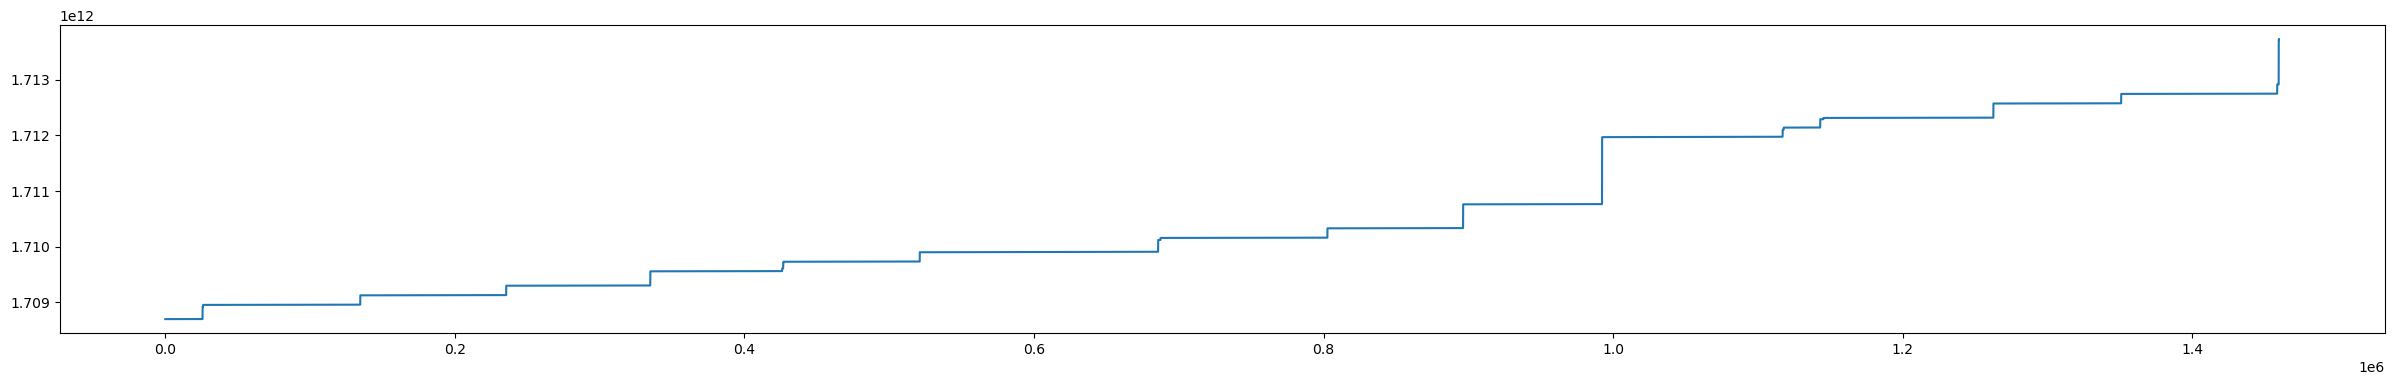

In [8]:
second = t[1] - t[0]
freq = 25.0
period = second / freq
t_all = []
for sec in t:
    subsec = np.arange(sec, sec + second, period)
    for s in subsec:
        t_all.append(s)
fig = plt.figure(figsize=(30, 4))
plt.plot(t_all)

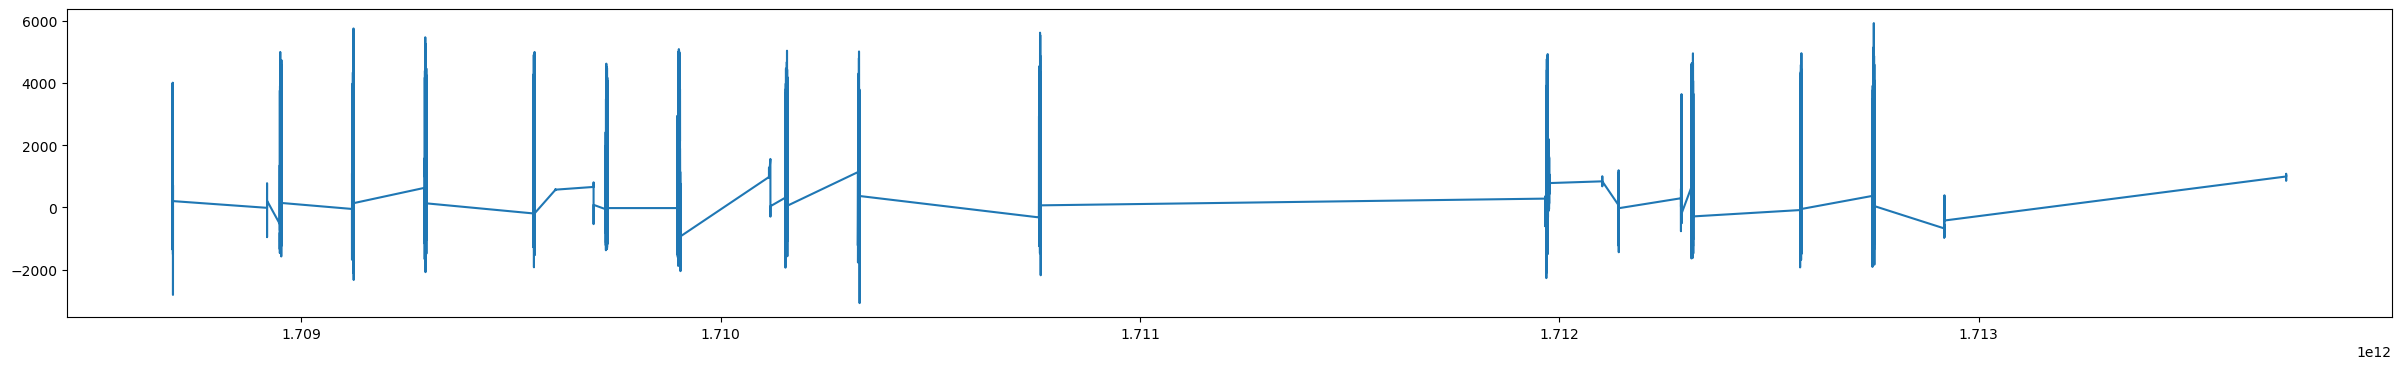

In [9]:
fig = plt.figure(figsize=(30, 4))
plt.plot(t_all, acc_x)

In [10]:
from datetime import datetime, timedelta, date
import time
timestamp = time.time()
date_object = datetime.fromtimestamp(timestamp)
print("Datetime:", date_object.date())

Datetime: 2025-01-22


In [11]:
# make a list of datetime objects showing all days data collection happened: swimming_days
current_day = date(2024, 1, 29)
swimming_days = []
finish_day = date(2024, 4, 10)
while current_day < finish_day:
    swimming_days.append(current_day)
    if current_day.weekday() == 0 or current_day.weekday() == 2:
        current_day += timedelta(days=2)
    elif current_day.weekday() == 4:
        current_day += timedelta(days=3)
    else:
        print(f'error, date {current_day} and weekday:{current_day.weekday()}')
print(f'we have {len(swimming_days)} days of swimming data')

we have 31 days of swimming data


In [12]:
# Finding the indices of the swimming dates
data_dates_set = set()
# indices are index of start of a swimming day that we have data for
indices = []
not_swimmed_i = []
# we might have data on days swimming not happened
# i might've turned the watch on for some reason
# all dates i : all the indices on the begining of the day
# the watch collected any form of data
all_dates_i = []
swimming_dates_date = []
i = 0
for t in t_all:
    # for each t in times that swimming happened, find the date
    date_object = datetime.fromtimestamp(t/1000.0)
    # as long as there's a date to add
    tmplen = len(data_dates_set)
    data_dates_set.add(date_object.date())

    if len(data_dates_set) > tmplen:
        if date_object.date() in swimming_days:
            indices.append(i)
        else:
            not_swimmed_i.append(i)
        all_dates_i.append(i)
    i += 1
print(f'we have at most {len(indices)} days of swimming in this batch')



we have at most 14 days of swimming in this batch


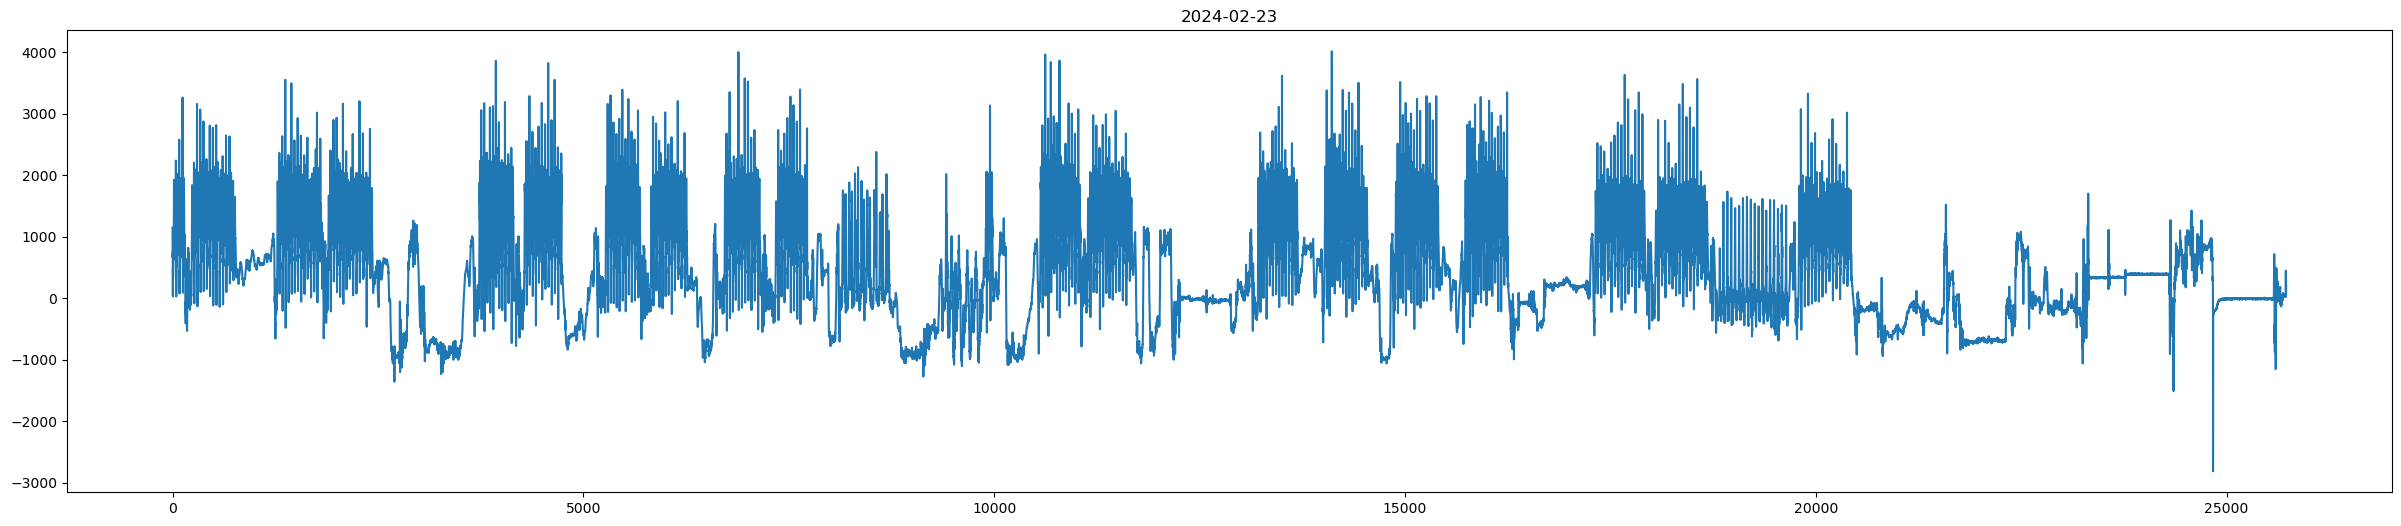

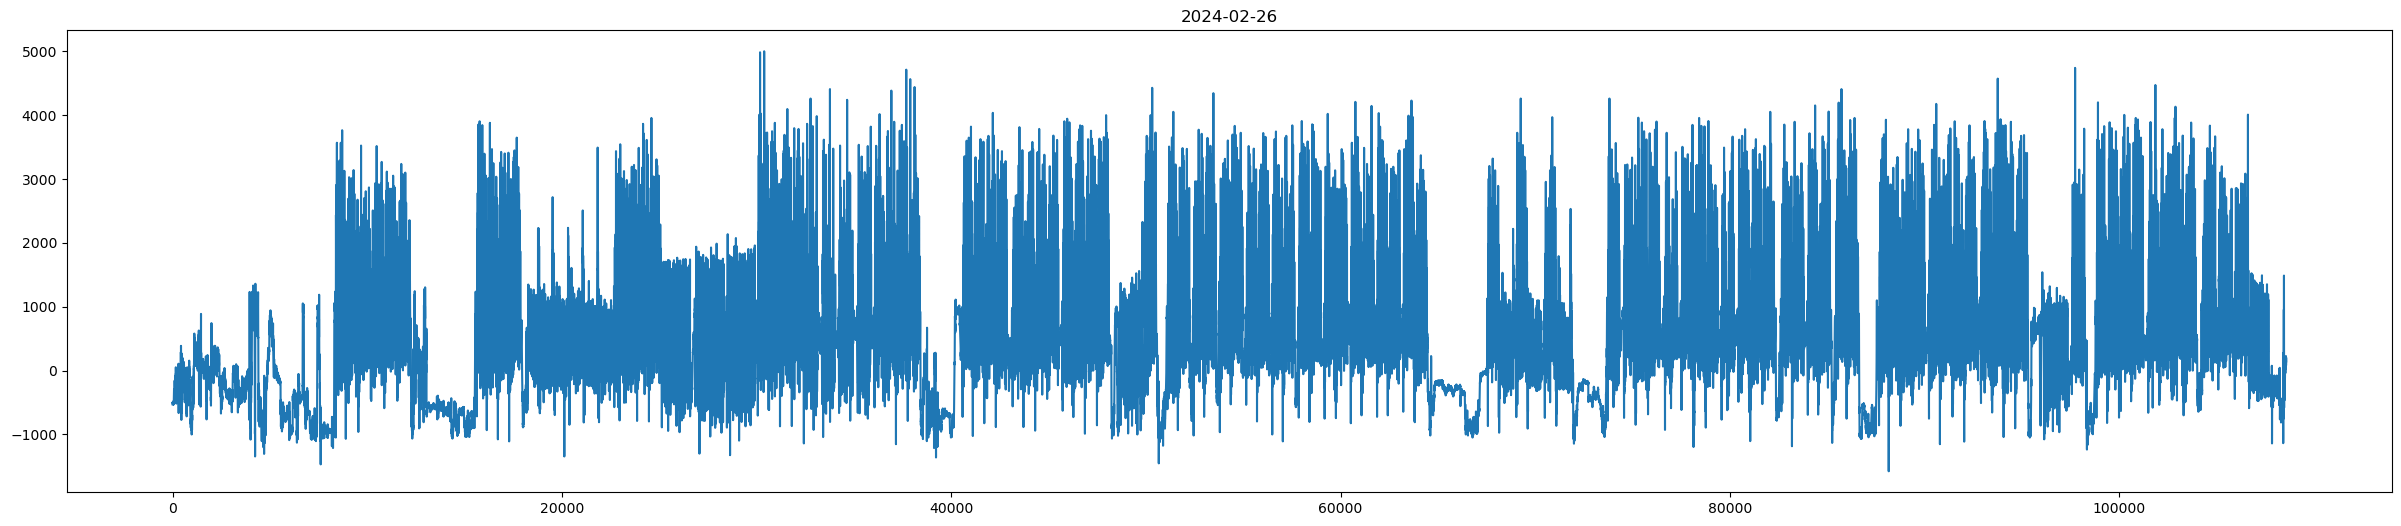

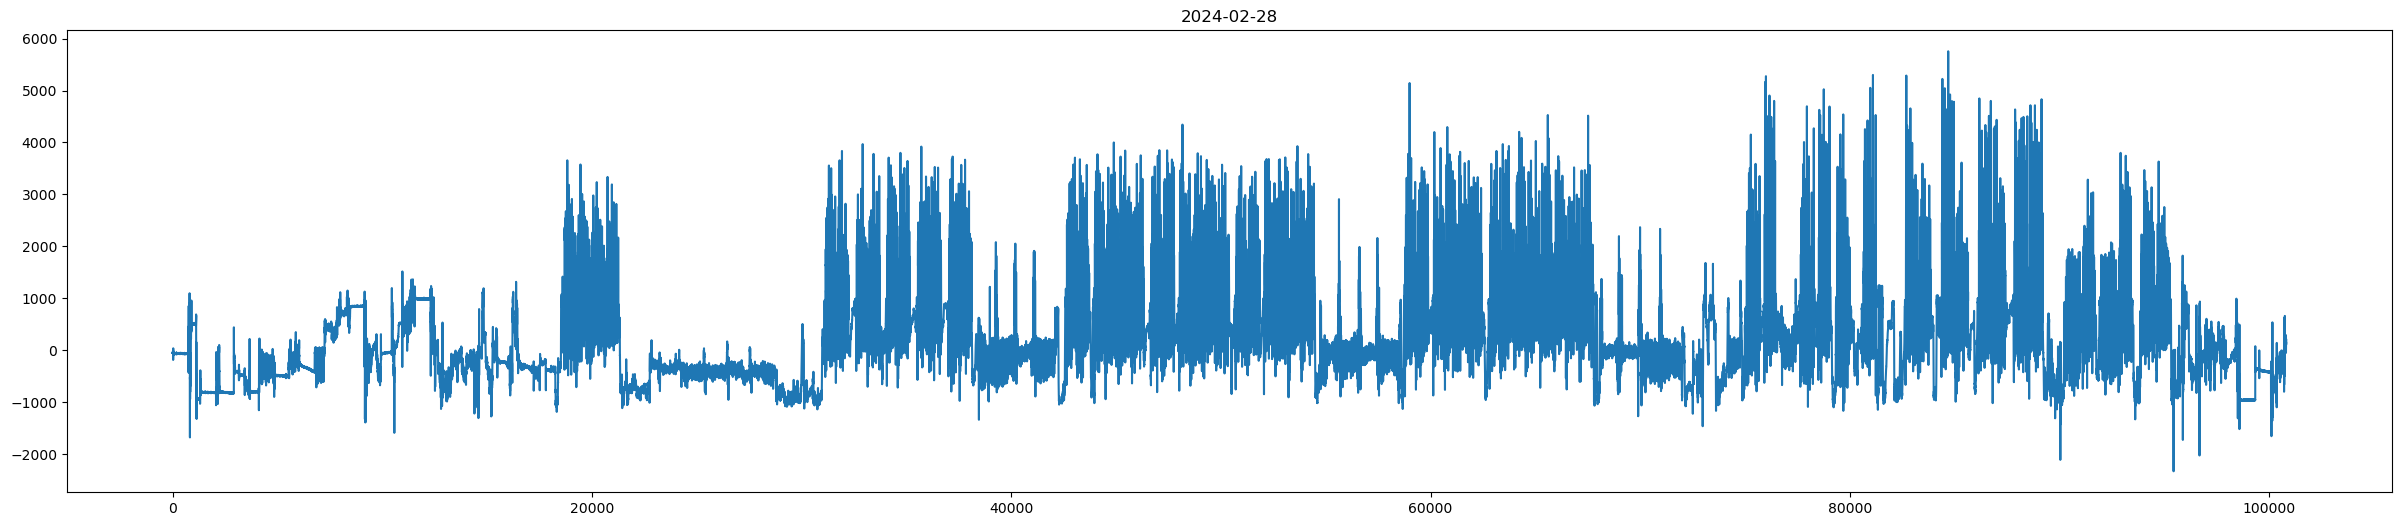

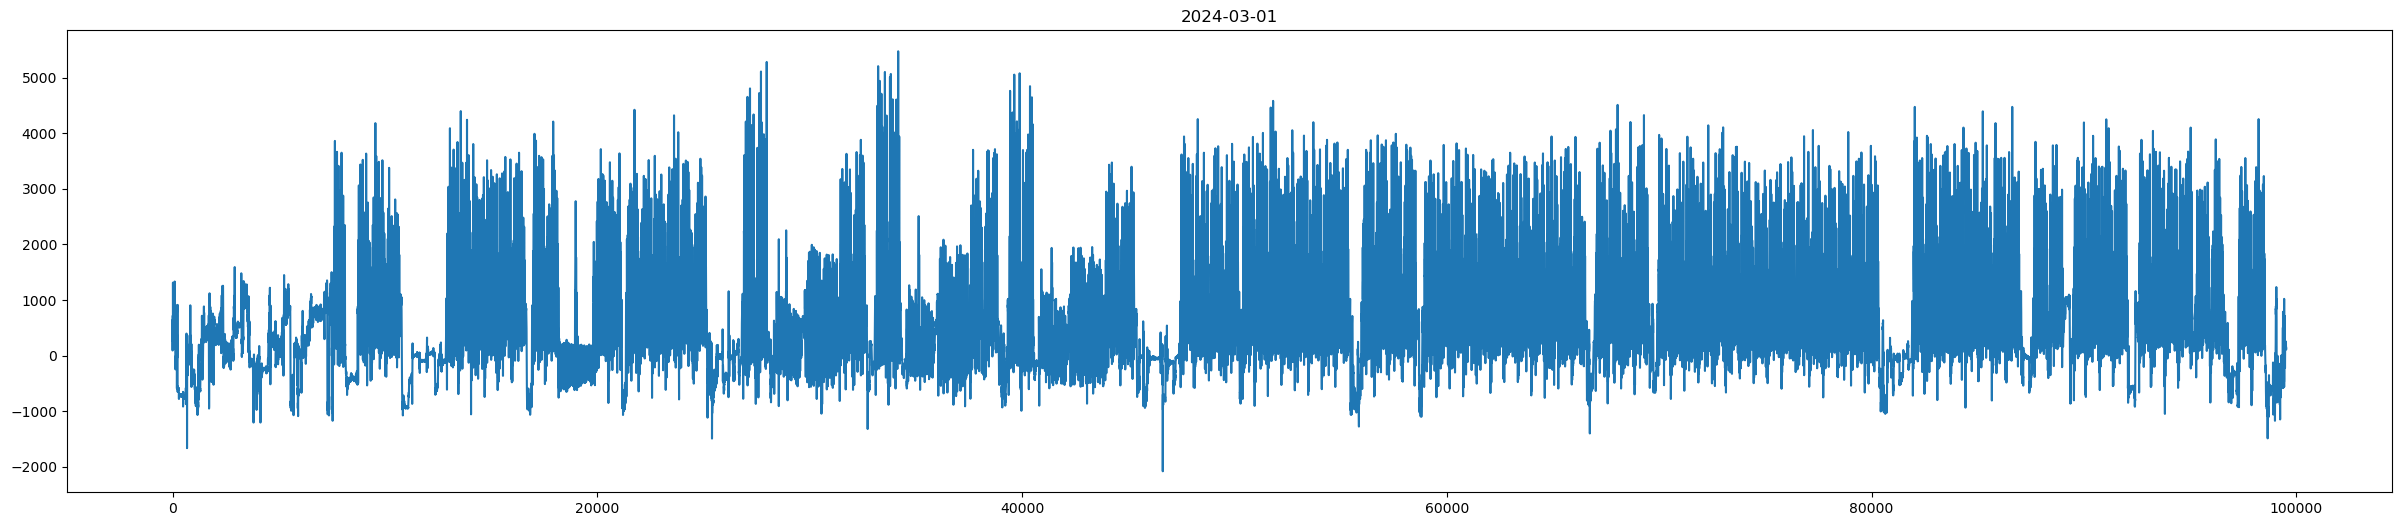

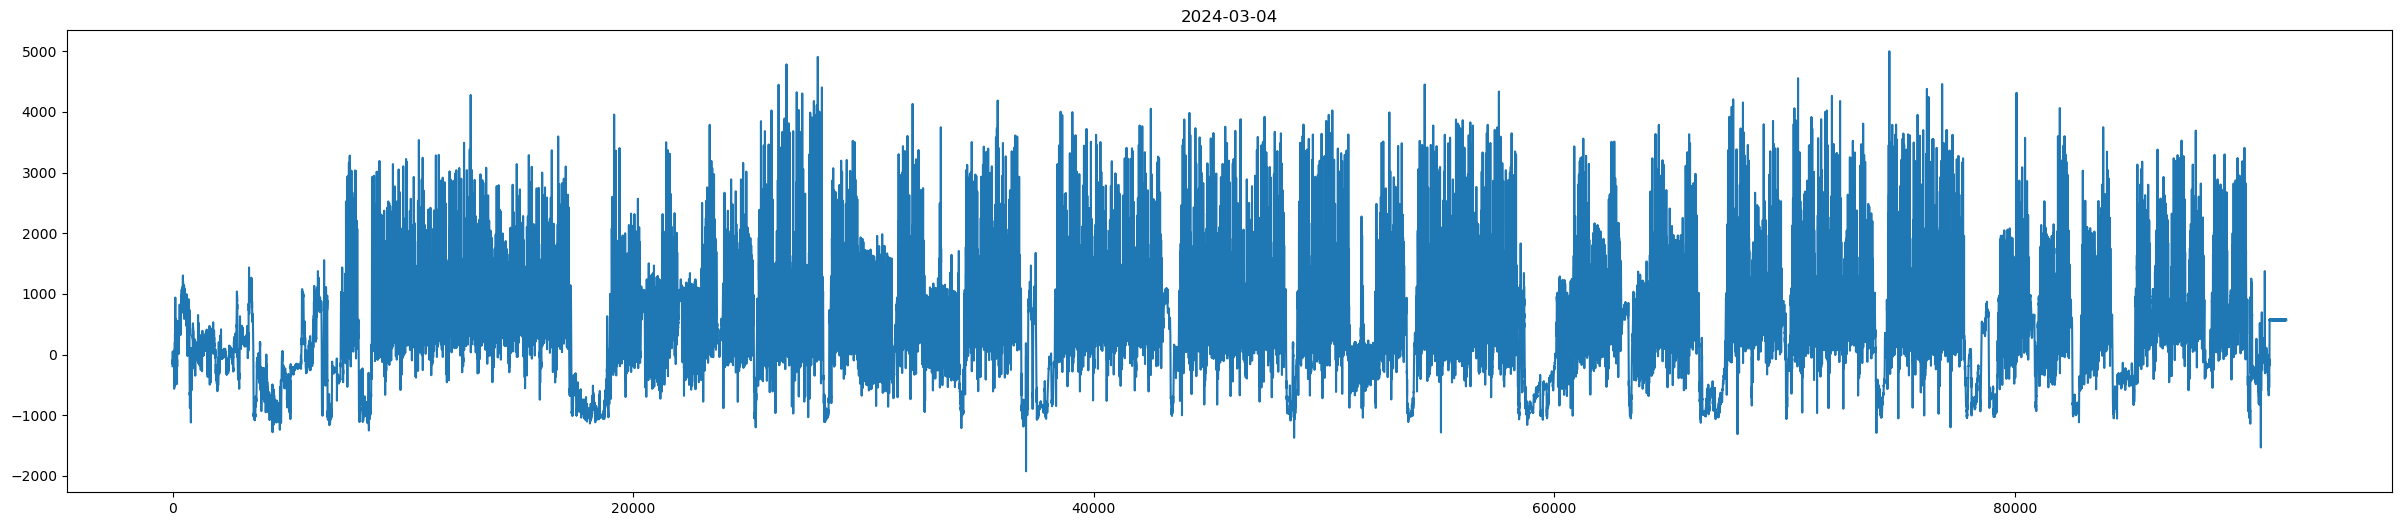

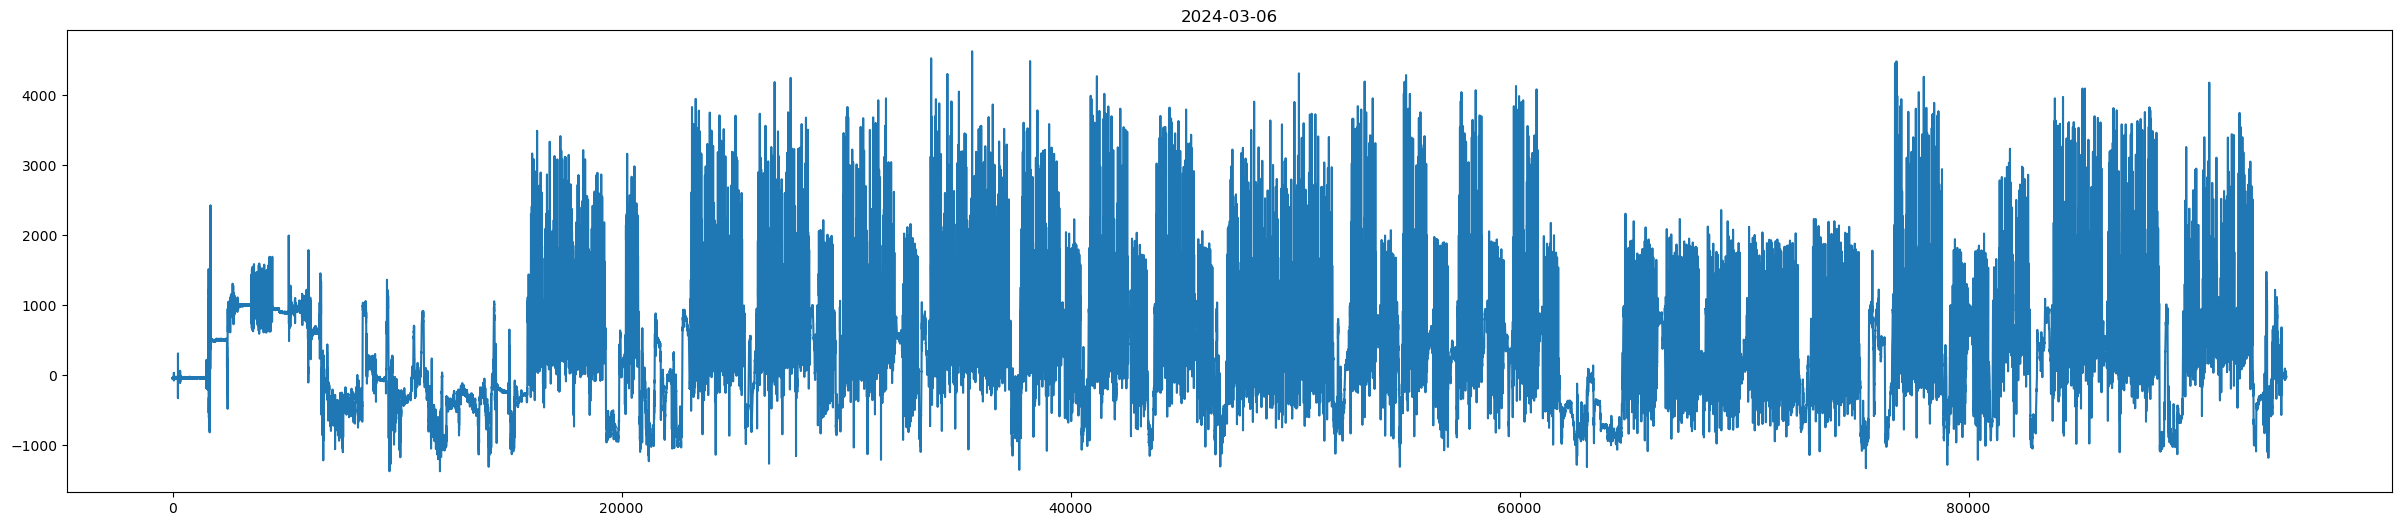

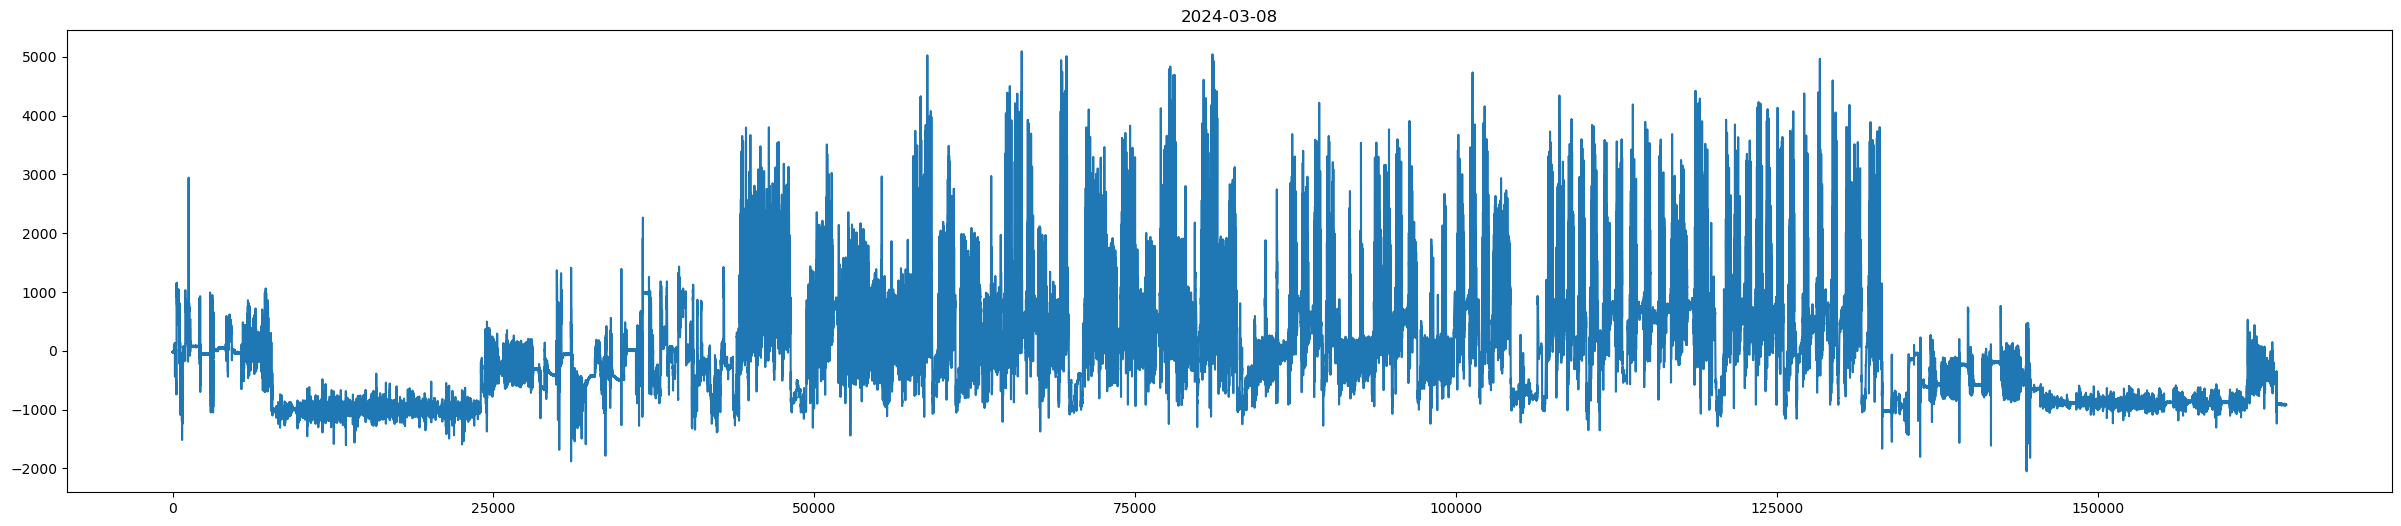

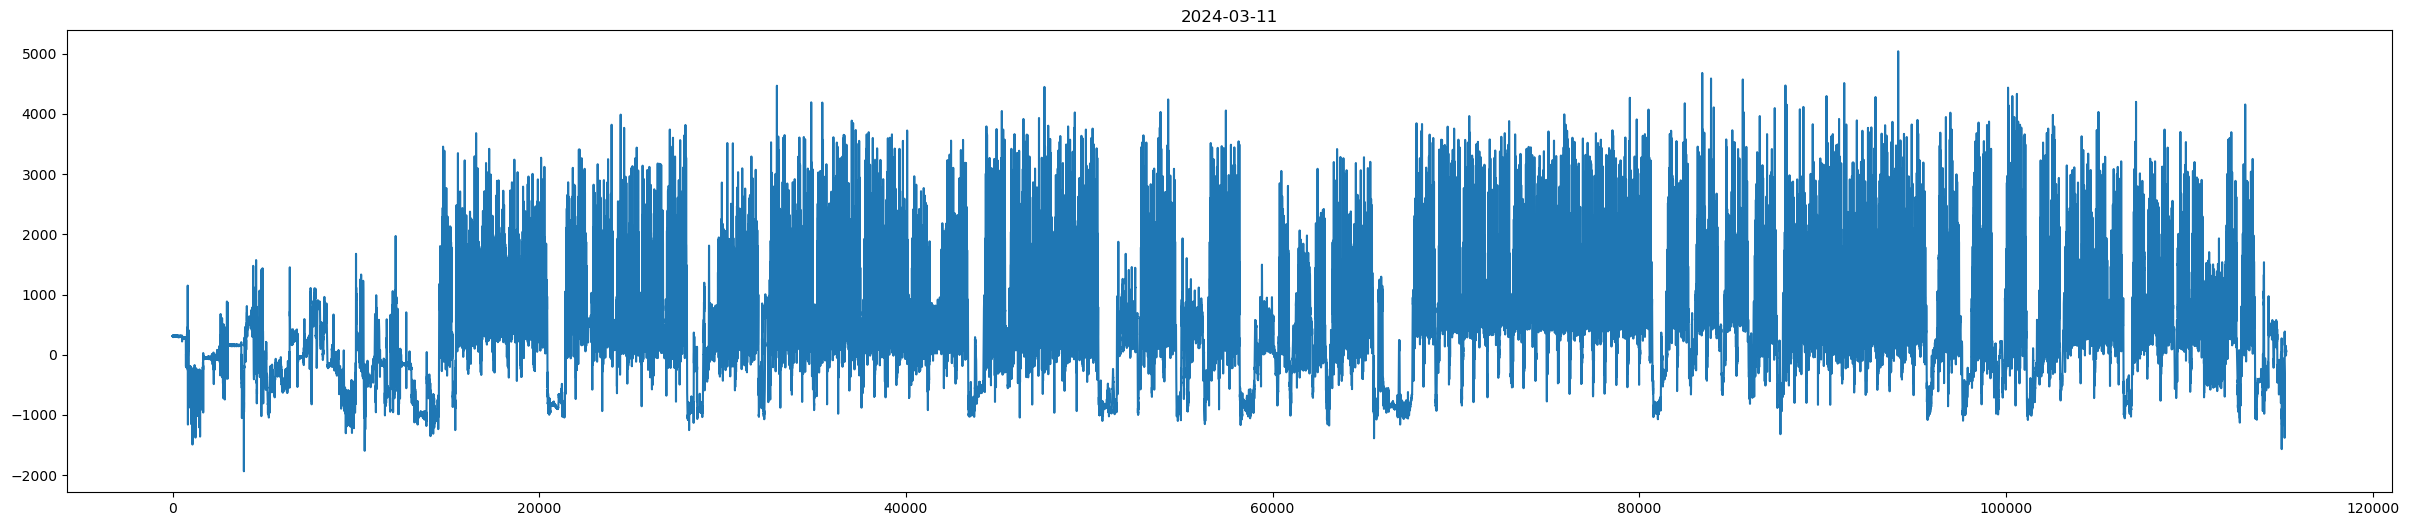

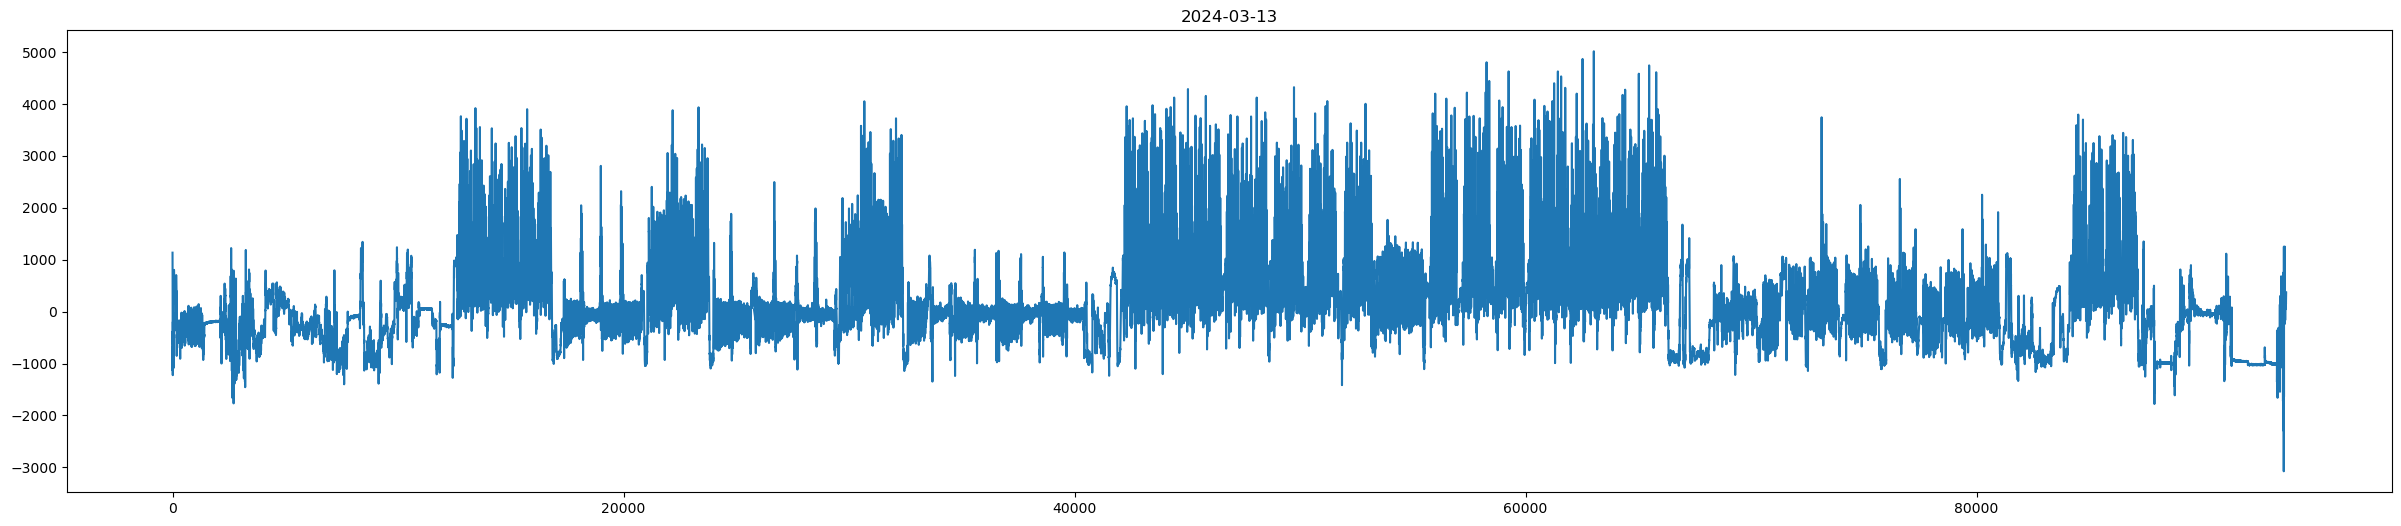

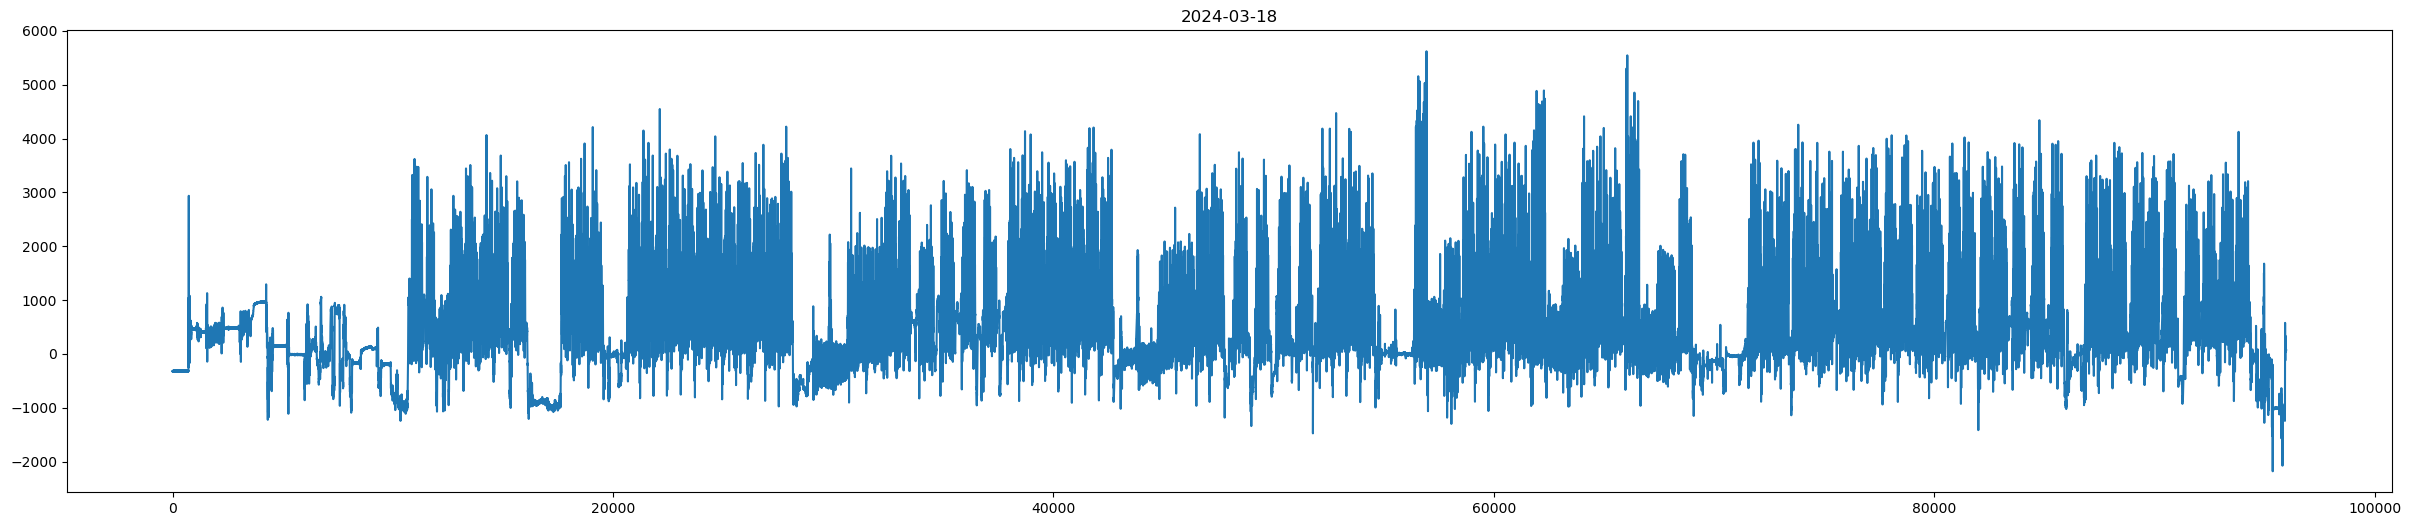

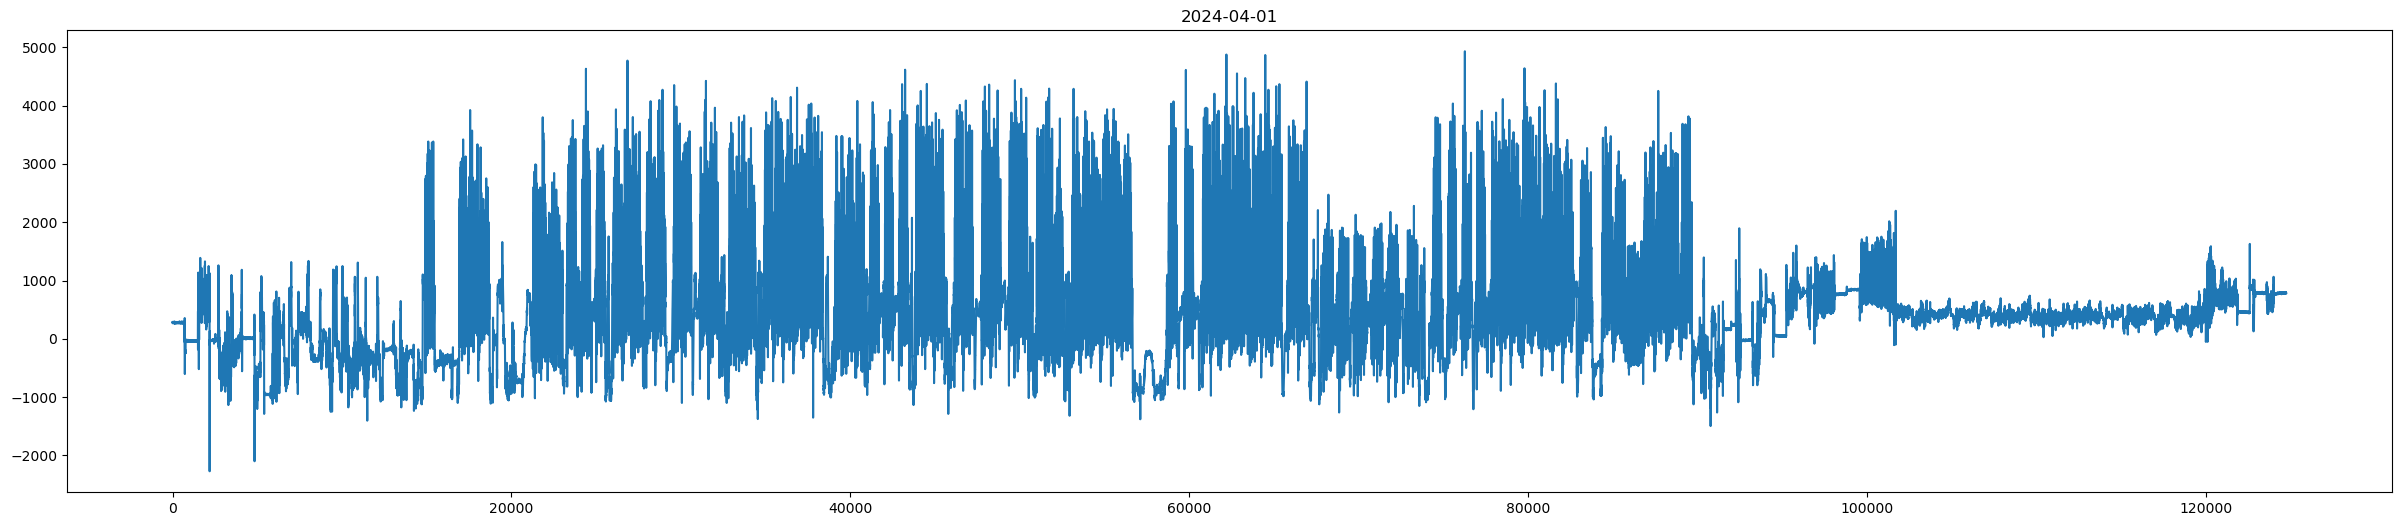

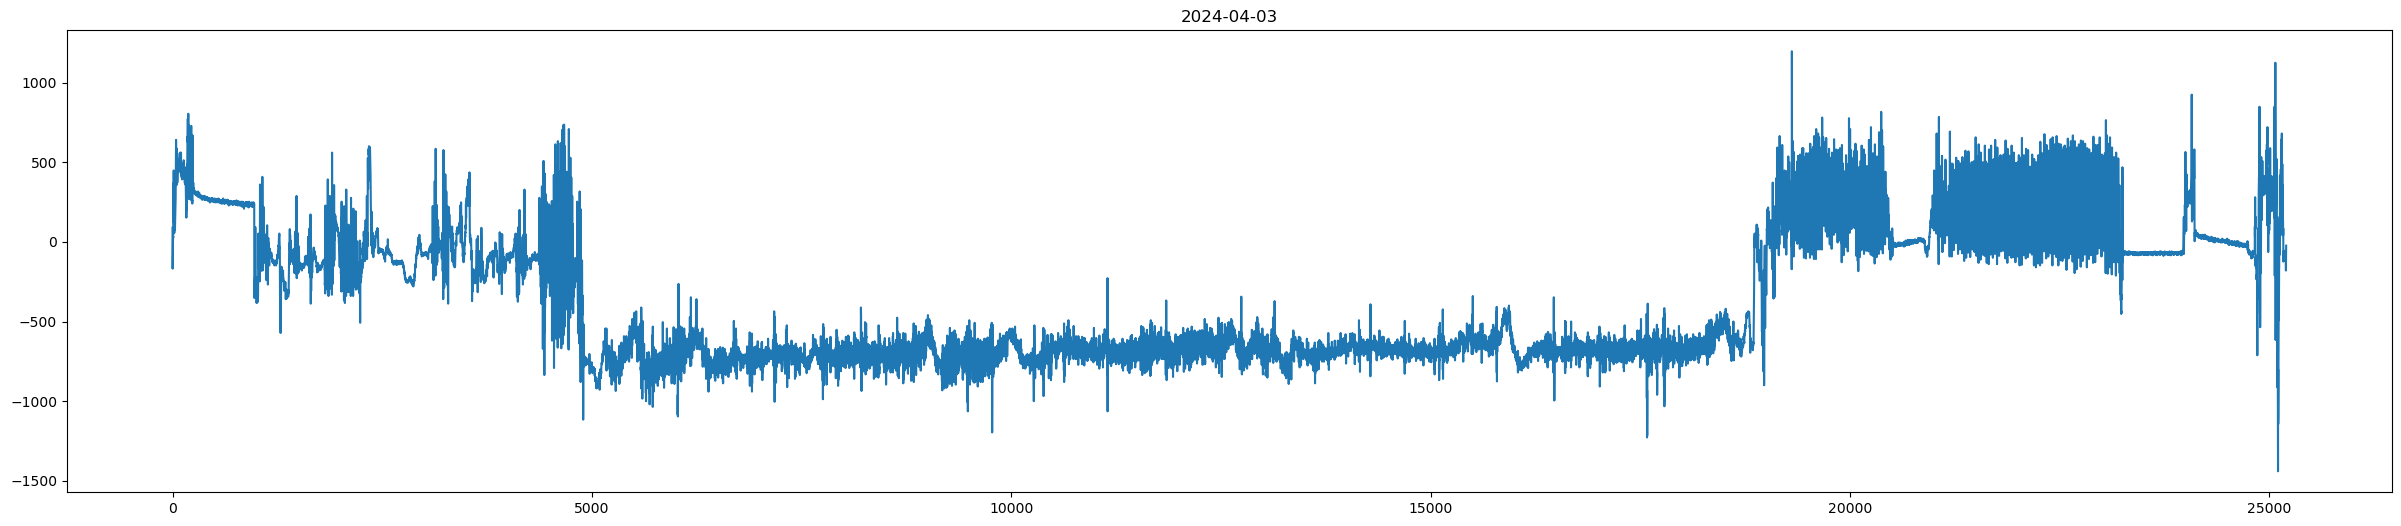

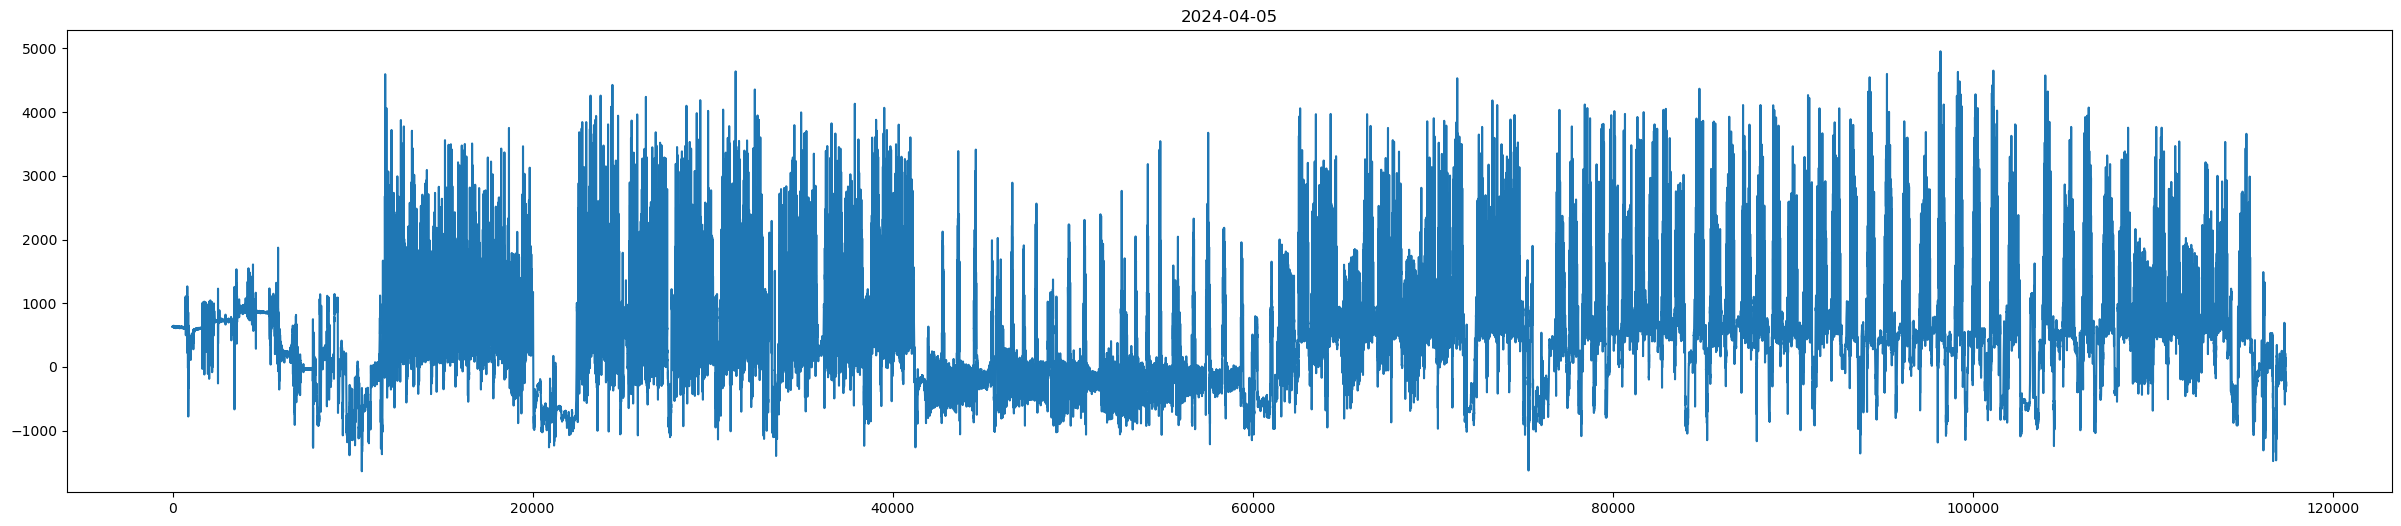

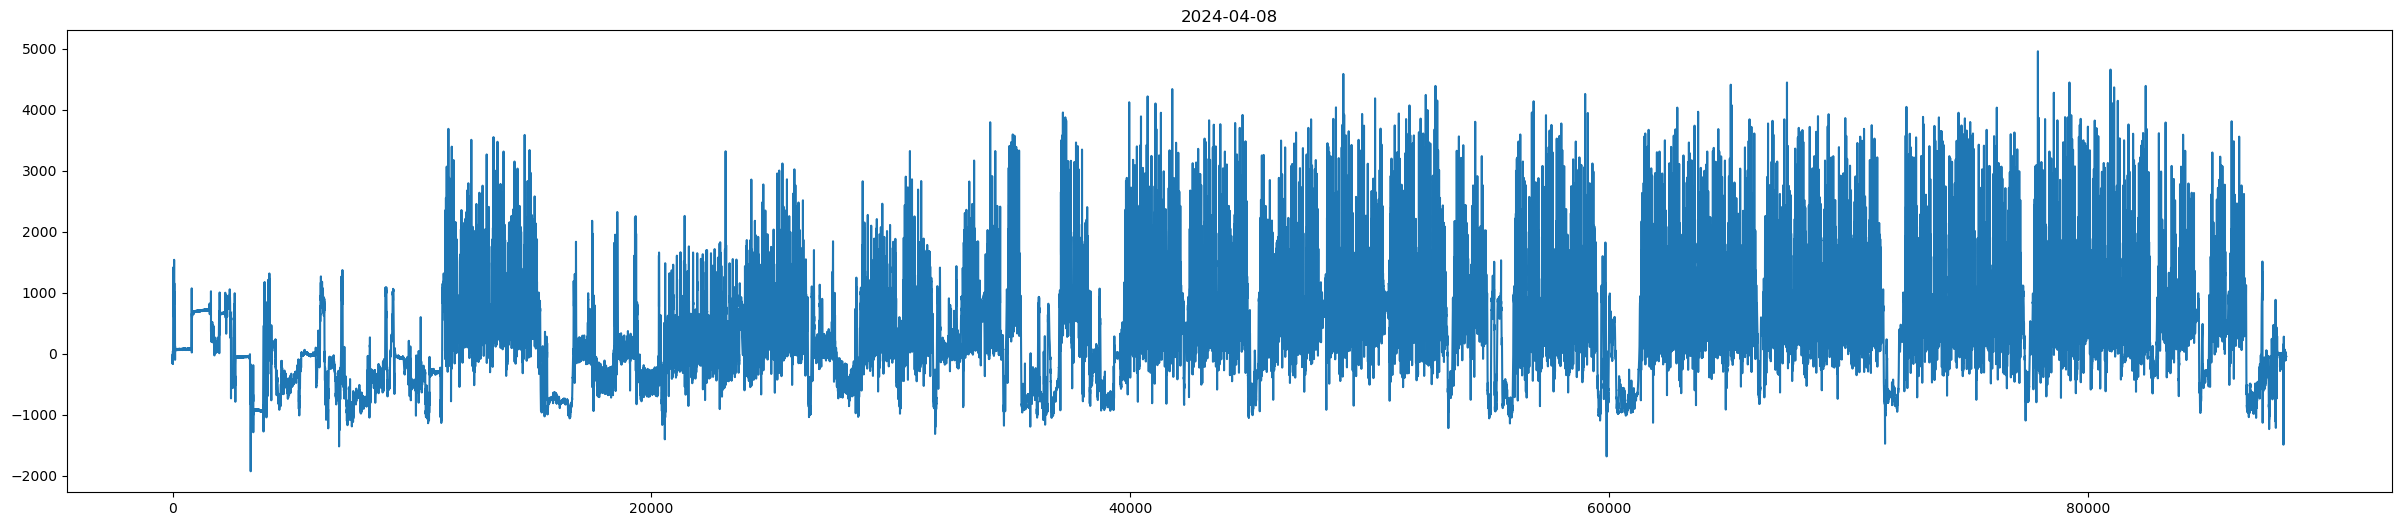

In [13]:
# plotting all dates of available data in this batch of data
for i in range(len(all_dates_i)):
    if i < (len(all_dates_i) - 1):
        if all_dates_i[i] in indices:
            date_object = datetime.fromtimestamp(t_all[all_dates_i[i]]/1000.0)
            fig = plt.figure(figsize=(30, 6))
            plt.plot(acc_x[all_dates_i[i]:all_dates_i[i+1]])
            plt.title(f'{date_object.date()}')
    else:
        if all_dates_i[i] in indices:
            date_object = datetime.fromtimestamp(t_all[all_dates_i[i]]/1000.0)
            fig = plt.figure(figsize=(30, 6))
            plt.plot(acc_x[all_dates_i[i]:])
            plt.title(f'{date_object.date()}')
        
        

date is 2024-02-23 and index is 0, i=0
date is 2024-02-26 and index is 26075, i=2
date is 2024-02-28 and index is 134650, i=3
date is 2024-03-01 and index is 235450, i=4
date is 2024-03-04 and index is 334975, i=5
date is 2024-03-06 and index is 426925, i=7
date is 2024-03-08 and index is 521075, i=8
date is 2024-03-11 and index is 687375, i=10
date is 2024-03-13 and index is 802650, i=11
date is 2024-03-18 and index is 896375, i=12
date is 2024-04-01 and index is 992350, i=13
date is 2024-04-03 and index is 1117825, i=15
date is 2024-04-05 and index is 1145250, i=17
date is 2024-04-08 and index is 1262625, i=18


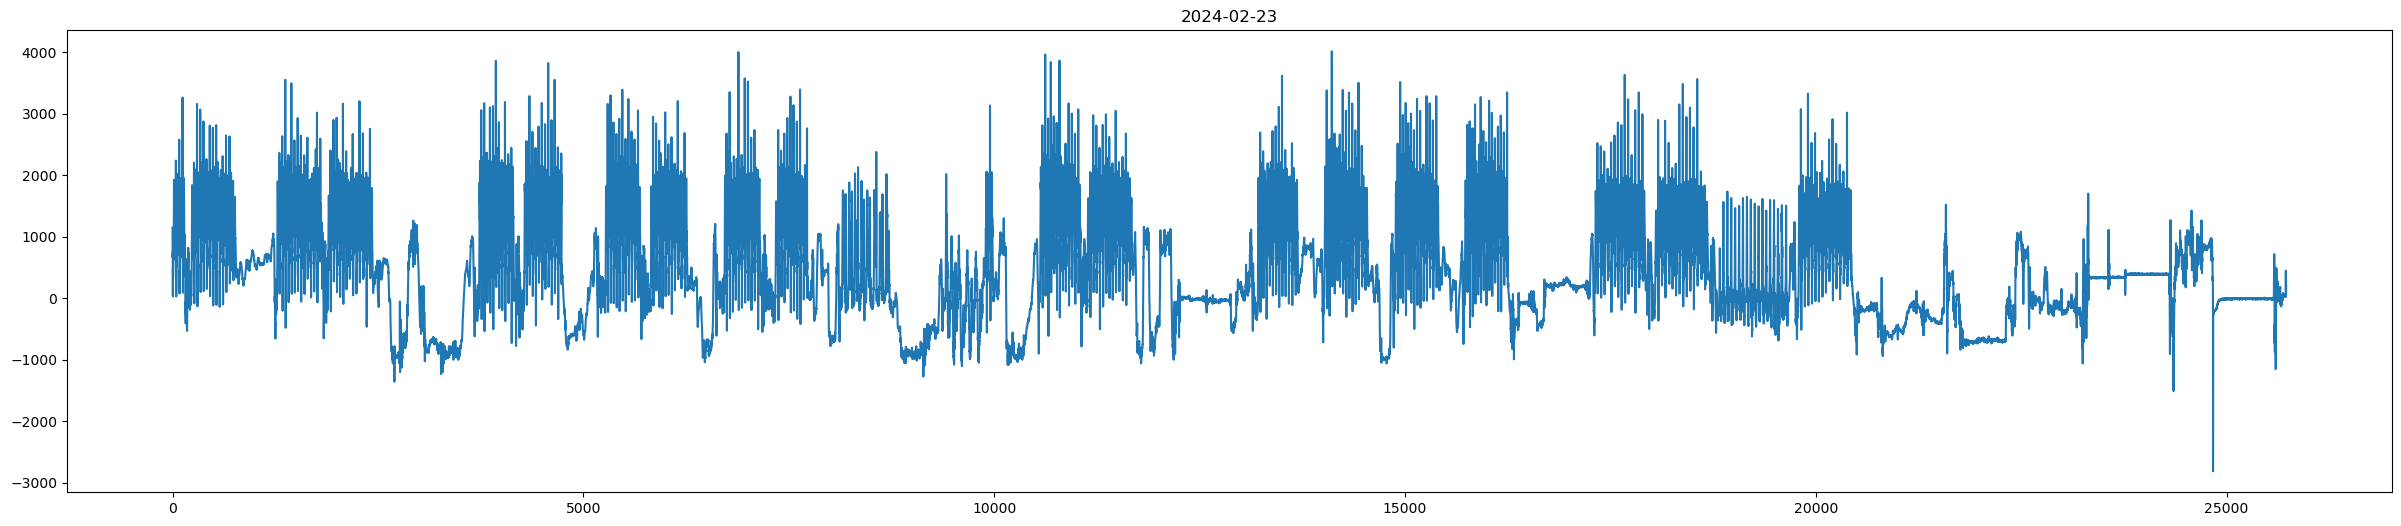

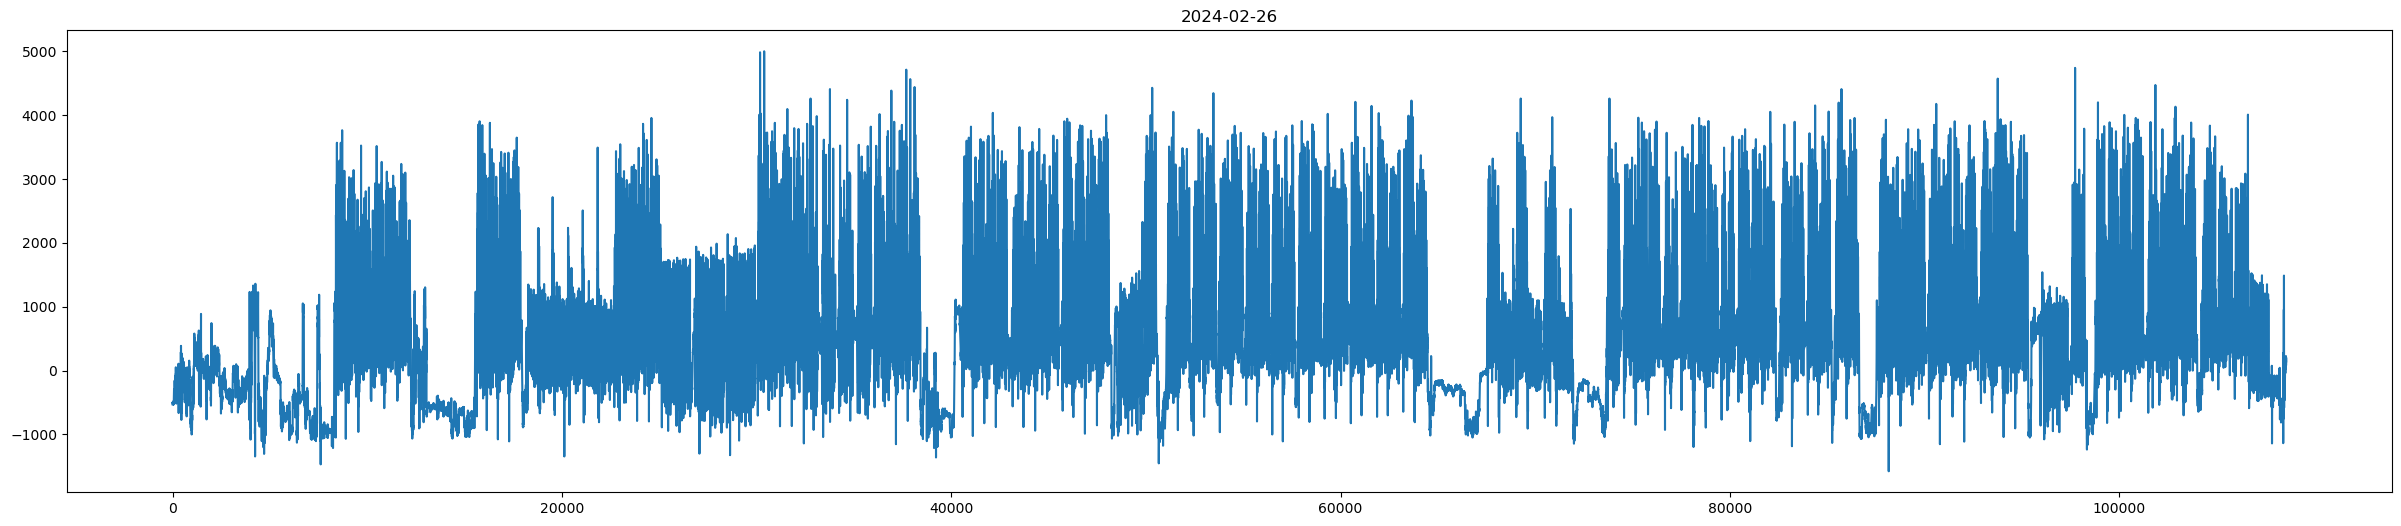

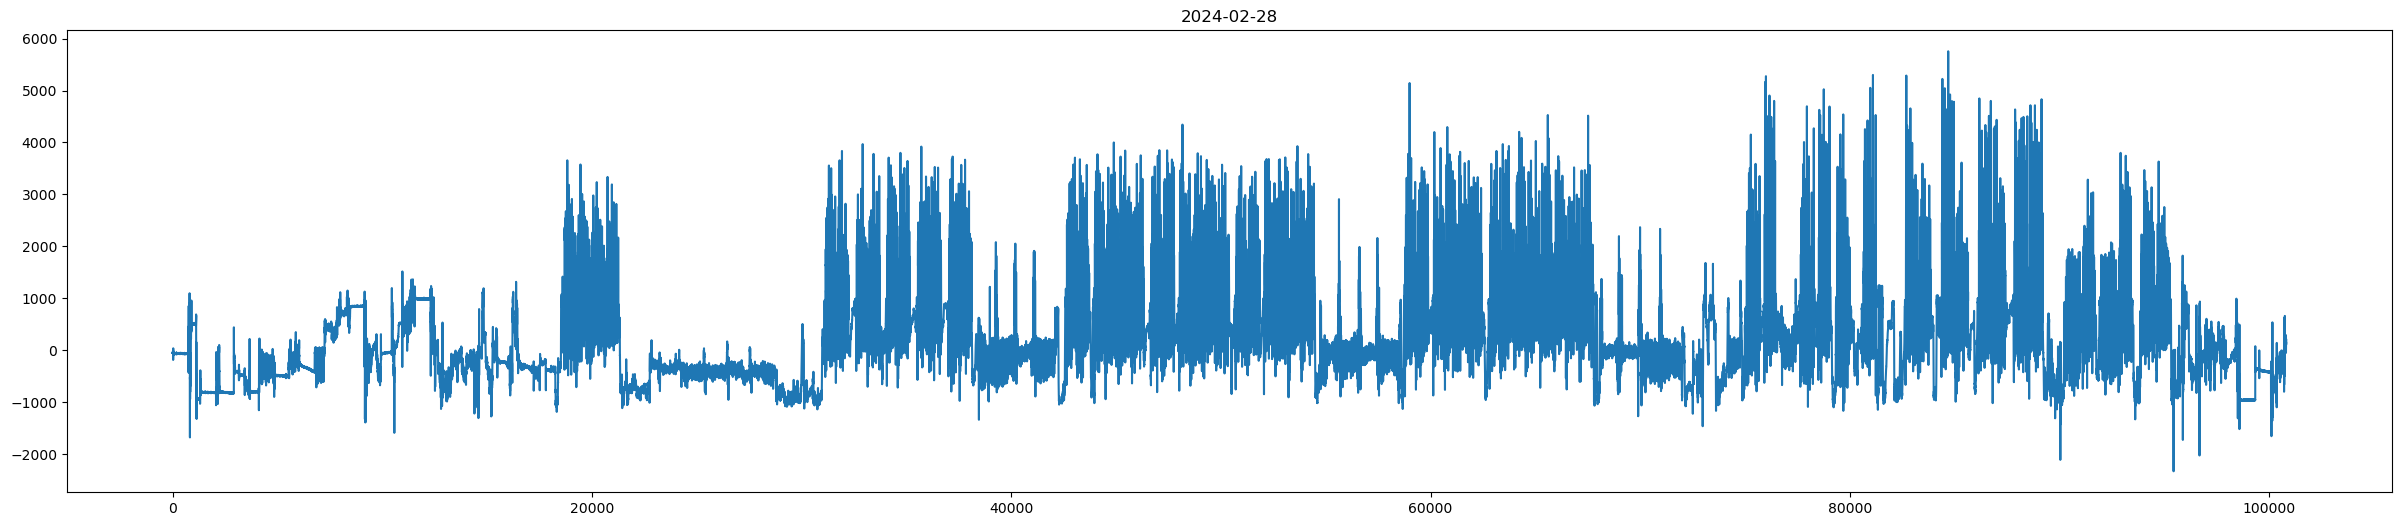

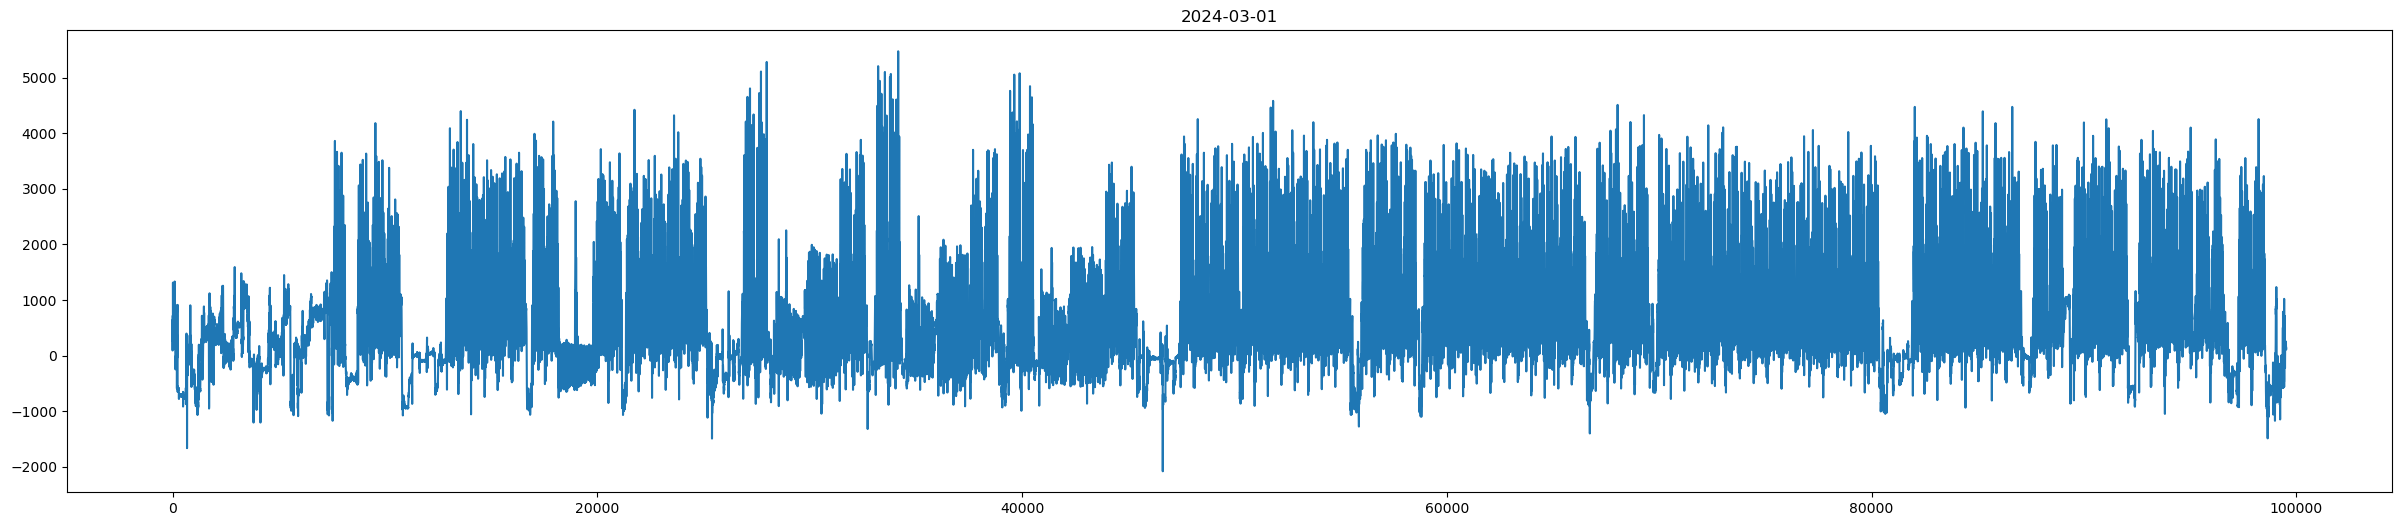

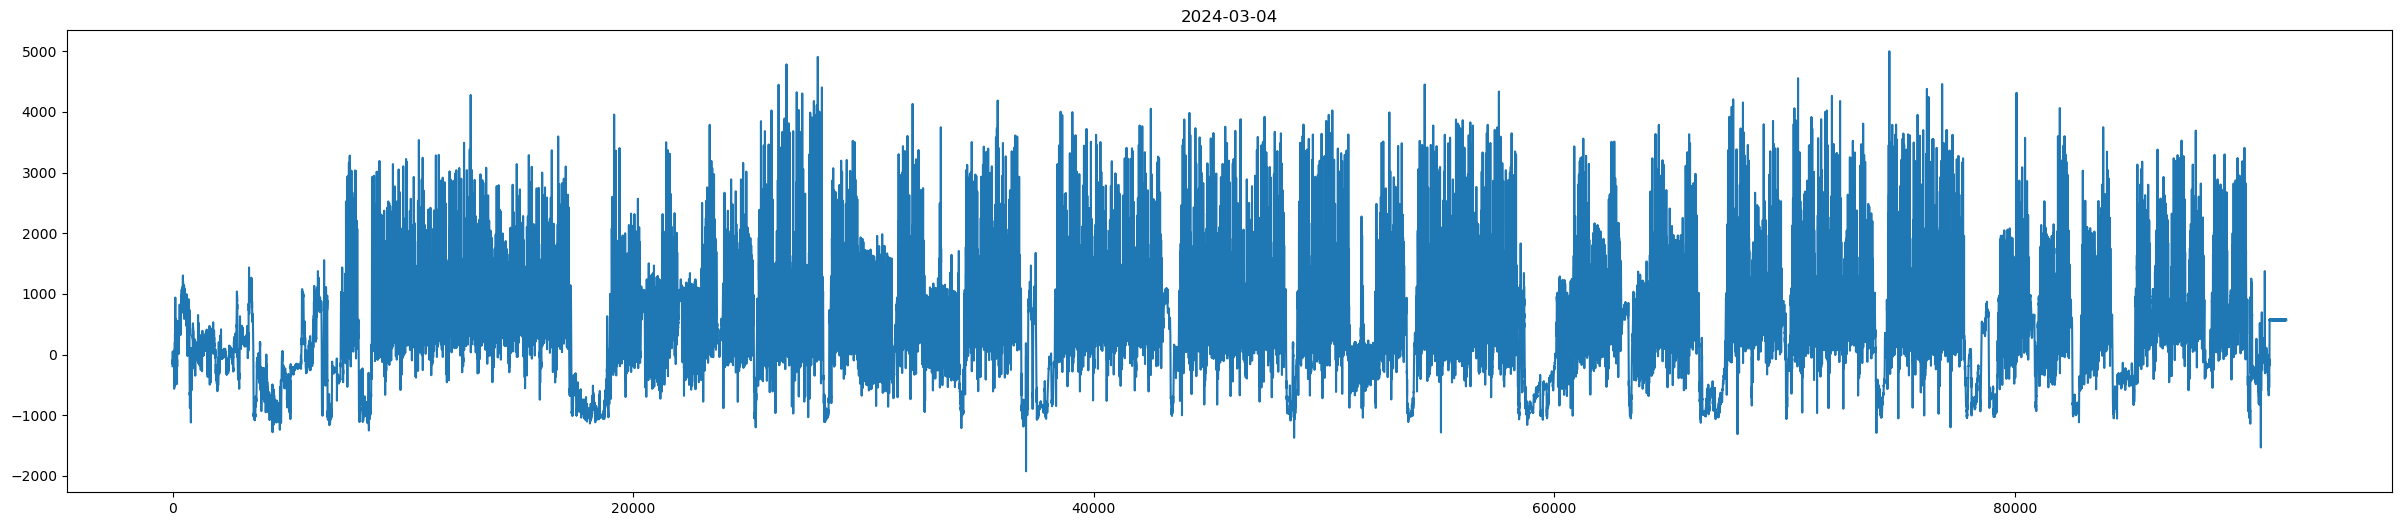

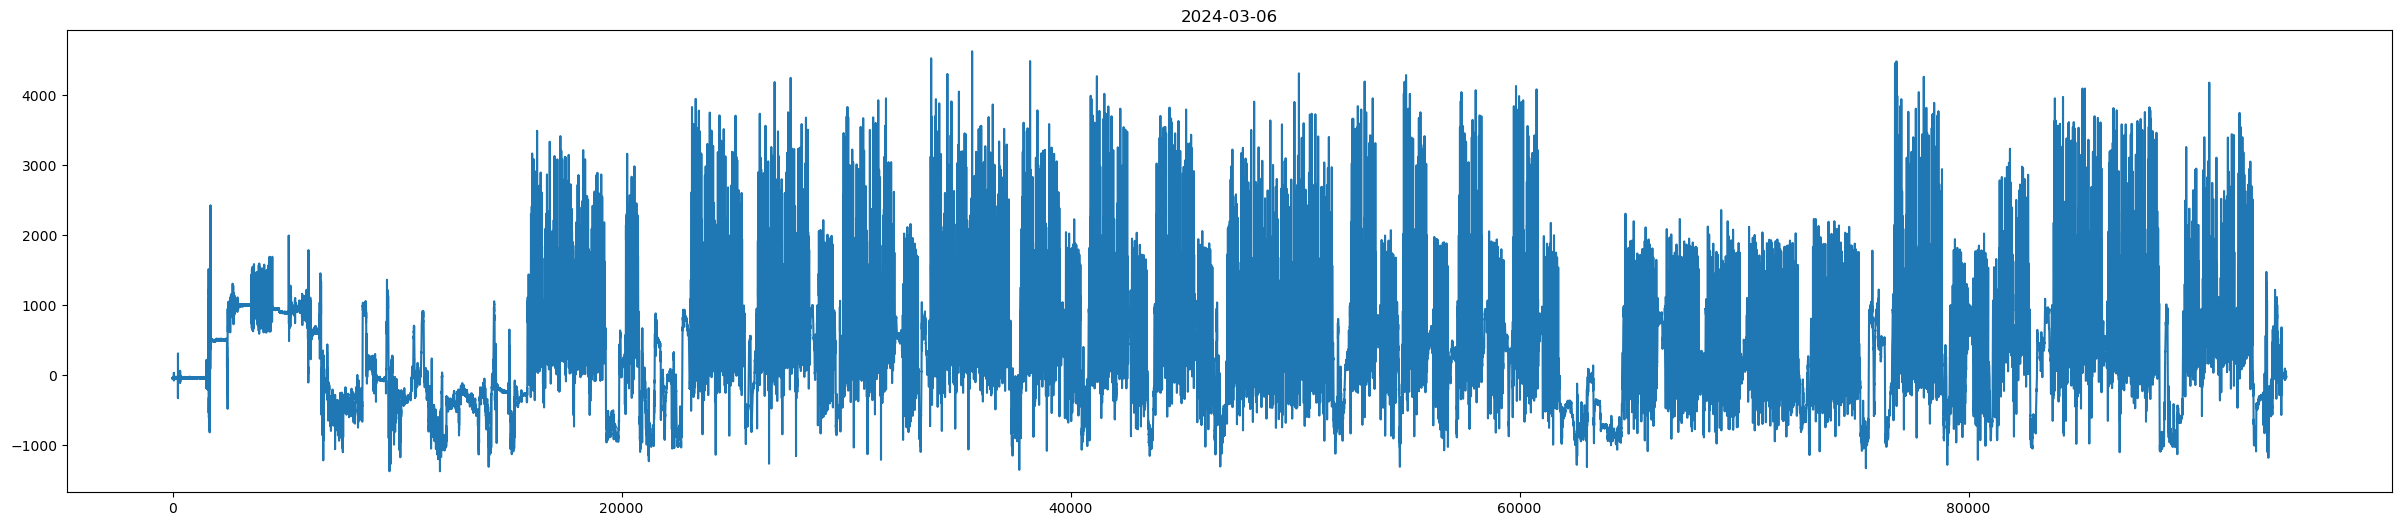

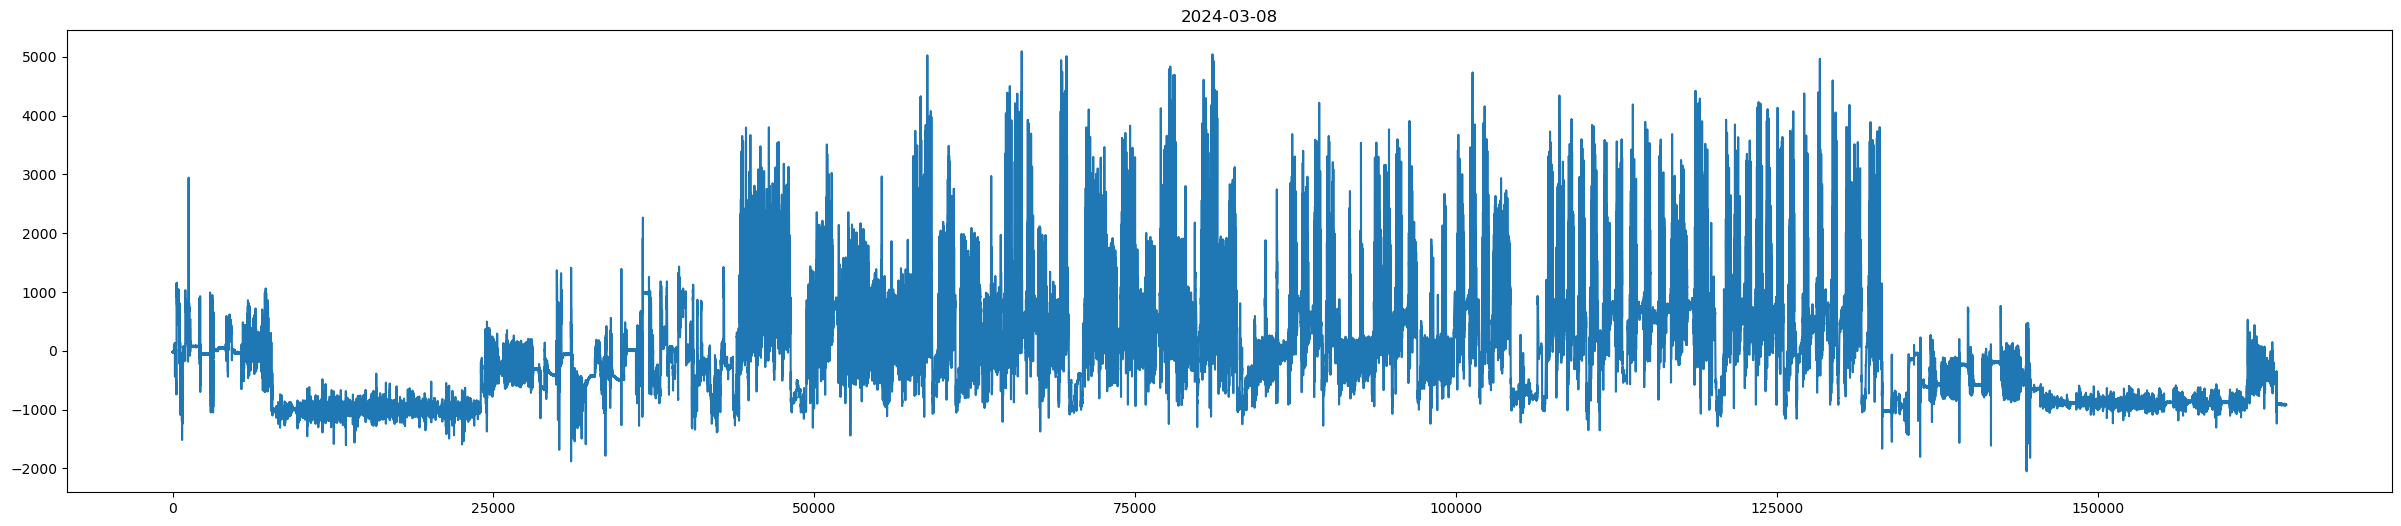

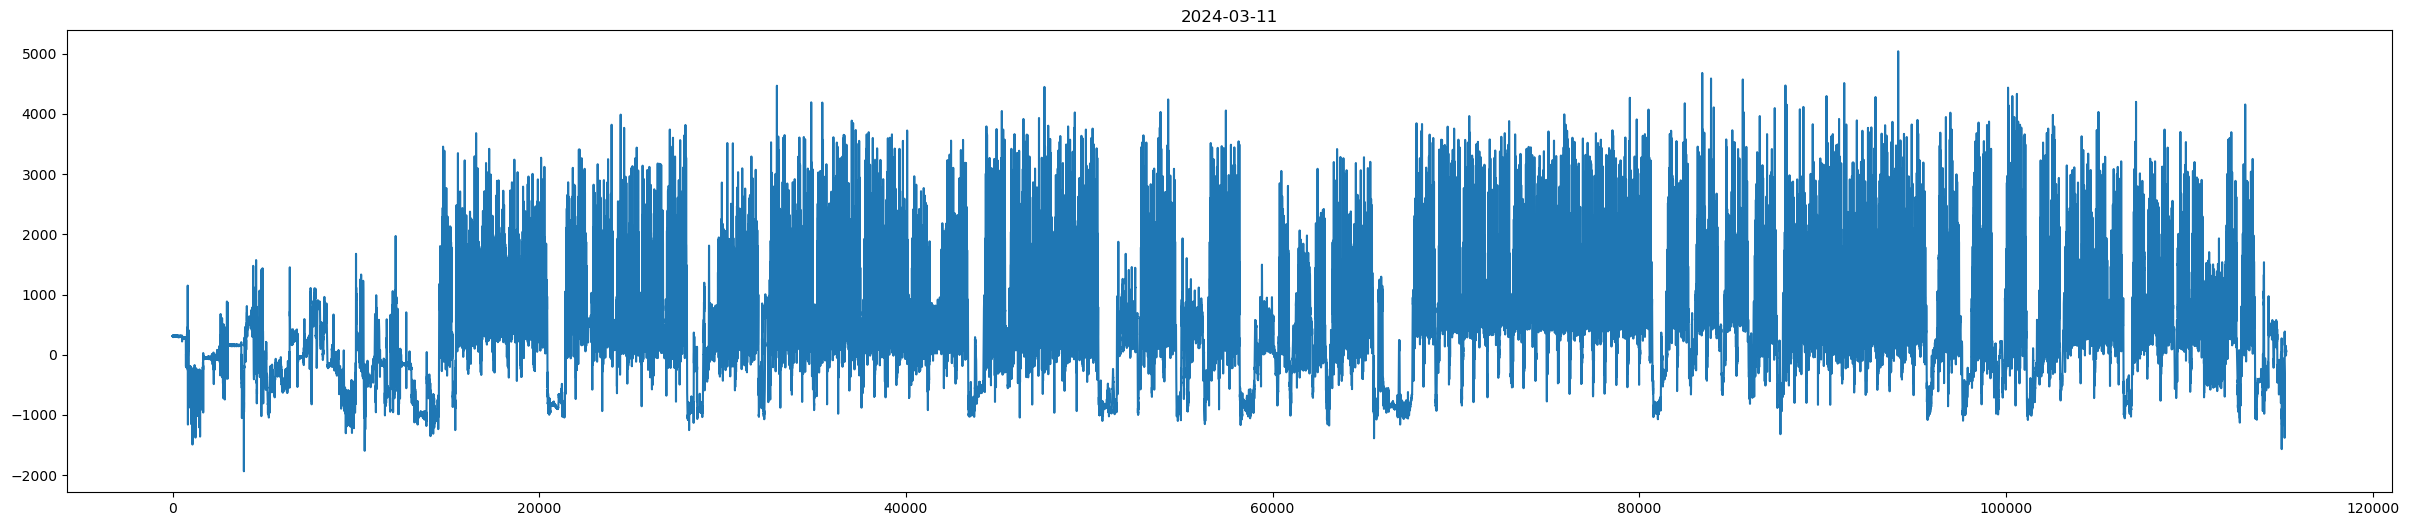

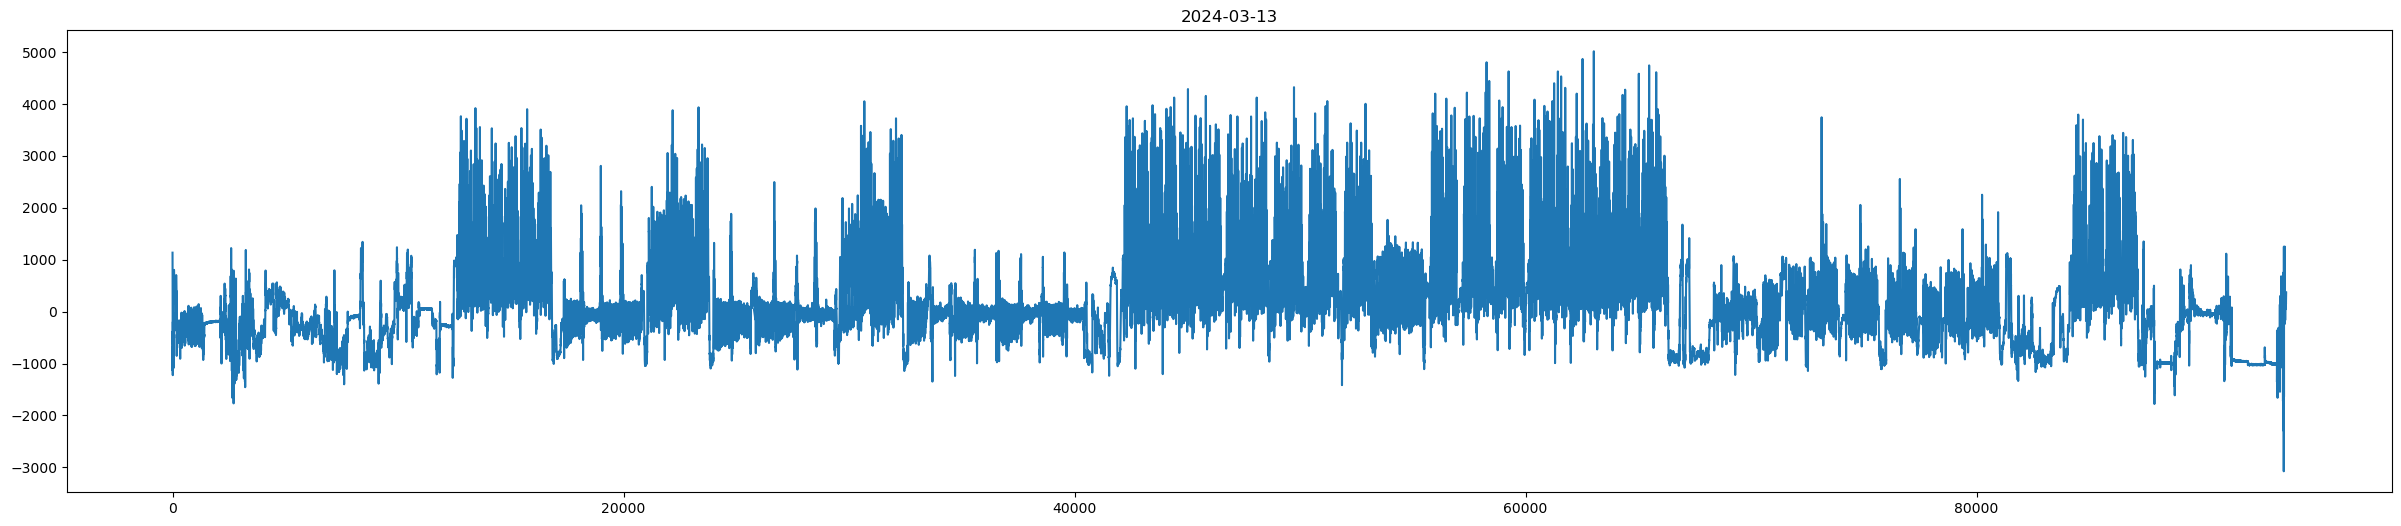

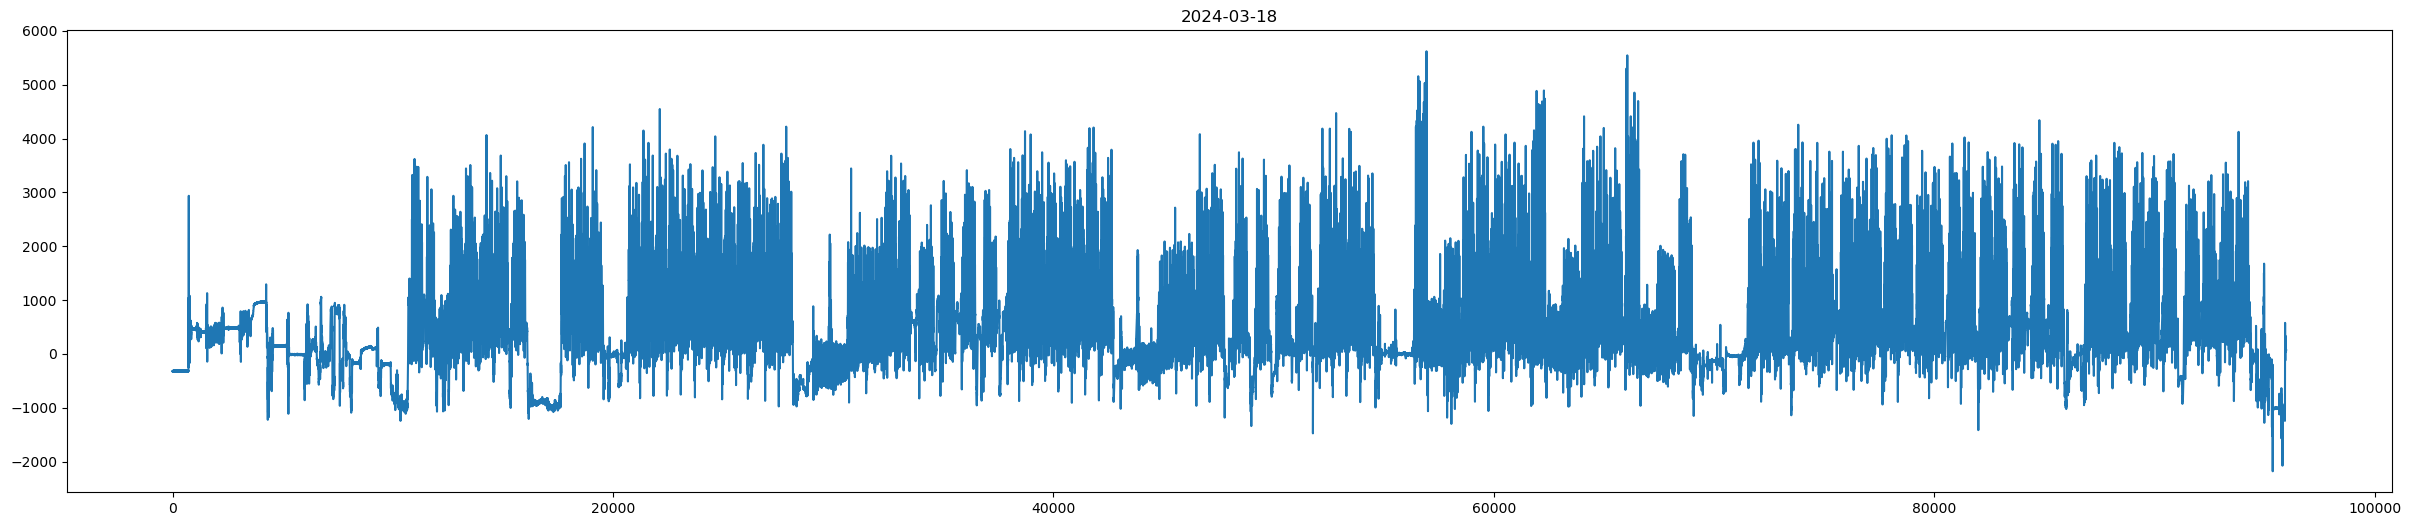

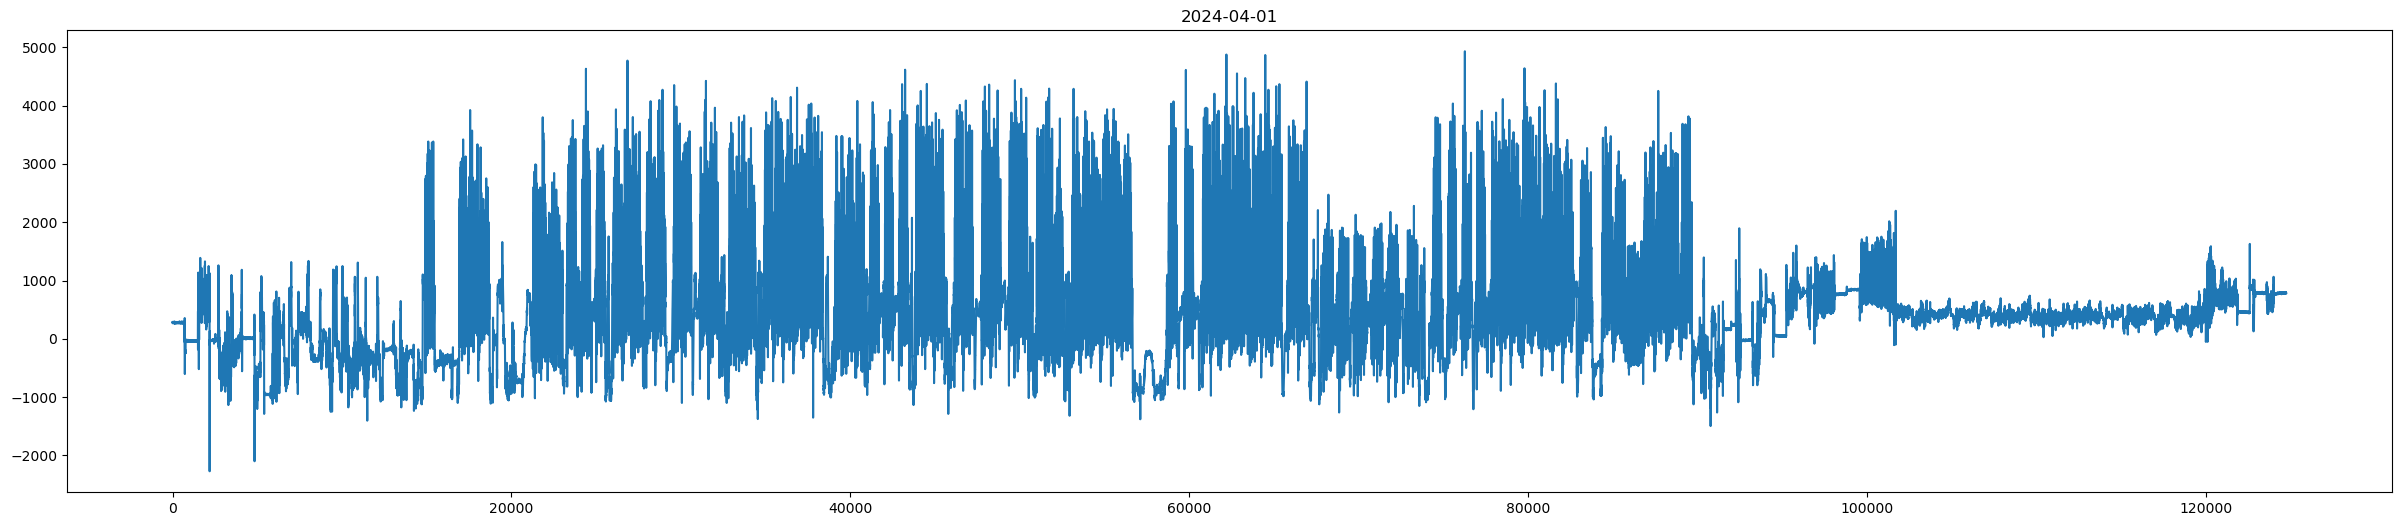

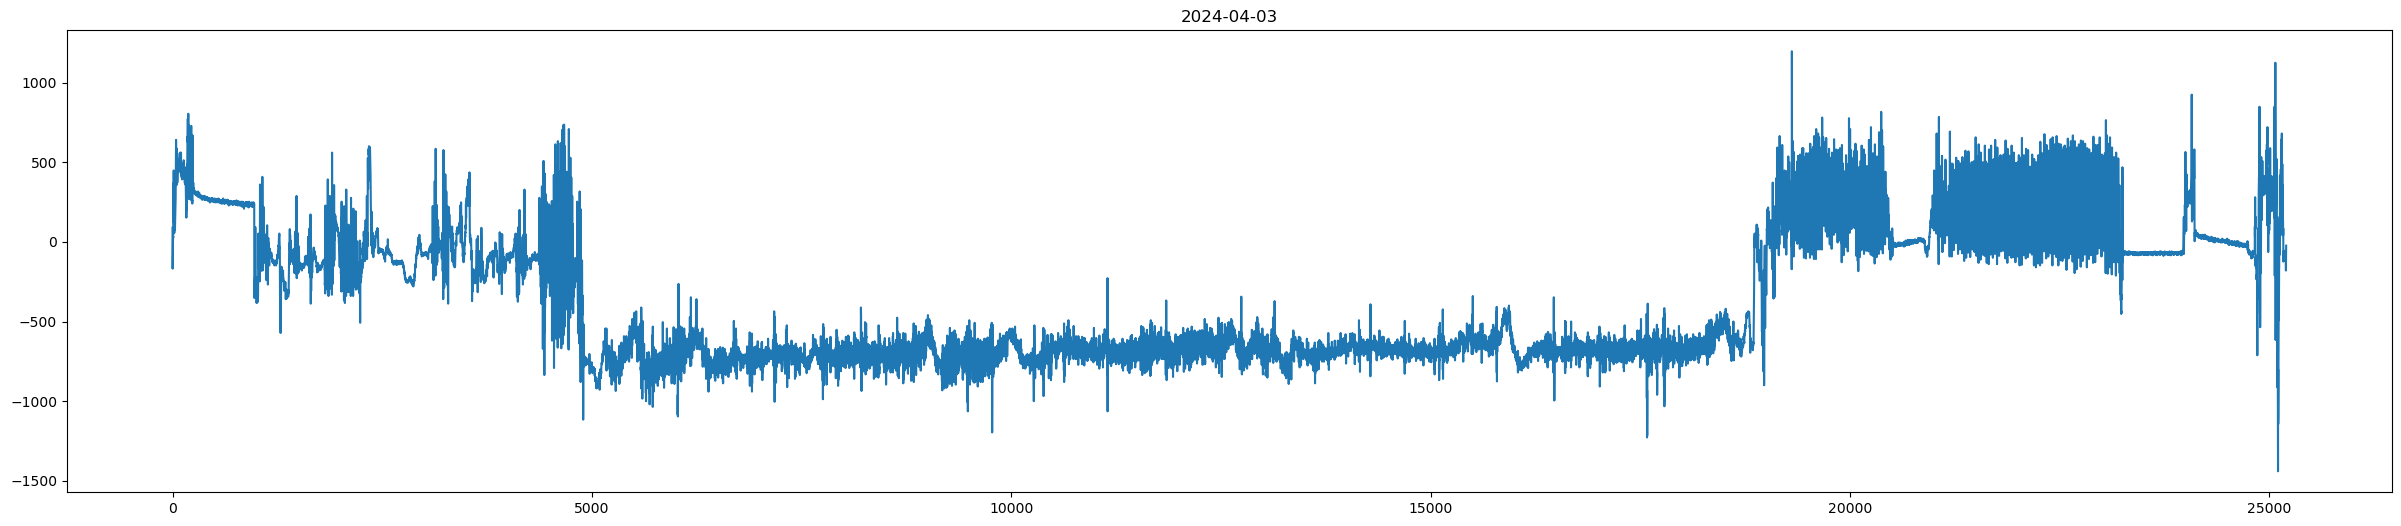

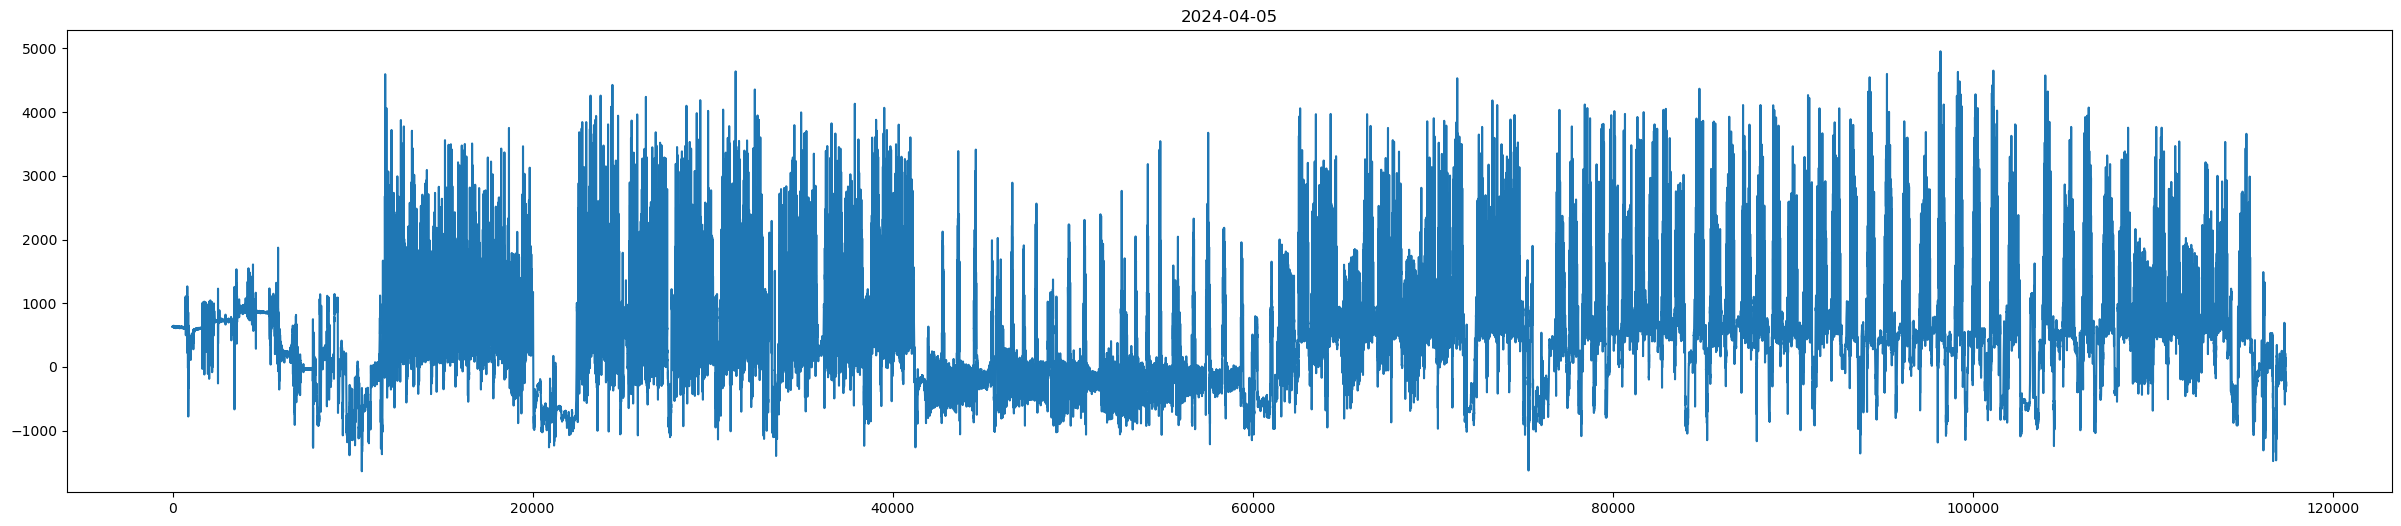

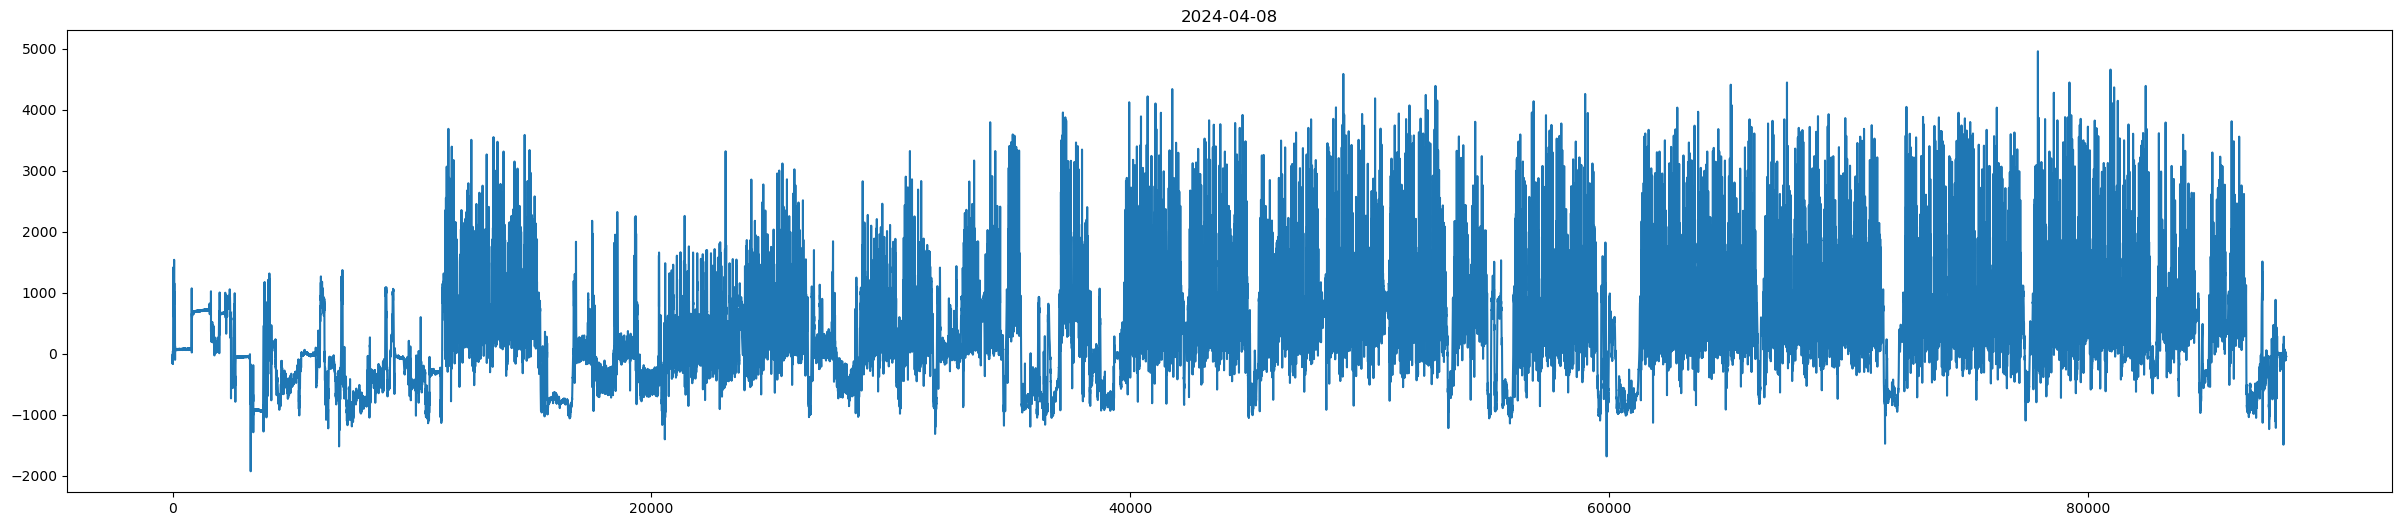

In [14]:
for i in range(len(all_dates_i)):
    if i < (len(all_dates_i) - 1):
        if all_dates_i[i] in indices:
            date_object = datetime.fromtimestamp(t_all[all_dates_i[i]]/1000.0)
            fig = plt.figure(figsize=(30, 6))
            plt.plot(acc_x[all_dates_i[i]:all_dates_i[i+1]])
            plt.title(f'{date_object.date()}')
            print(f'date is {date_object.date()} and index is {all_dates_i[i]}, i={i}')
    else:
        if all_dates_i[i] in indices:
            date_object = datetime.fromtimestamp(t_all[all_dates_i[i]]/1000.0)
            fig = plt.figure(figsize=(30, 6))
            plt.plot(acc_x[all_dates_i[i]:])
            plt.title(f'{date_object.date()}')
            print(f'date is {date_object.date()} and index is {all_dates_i[i]}')

2024-02-28 05:52:24


Text(0, 0.5, 'acceleration in y')

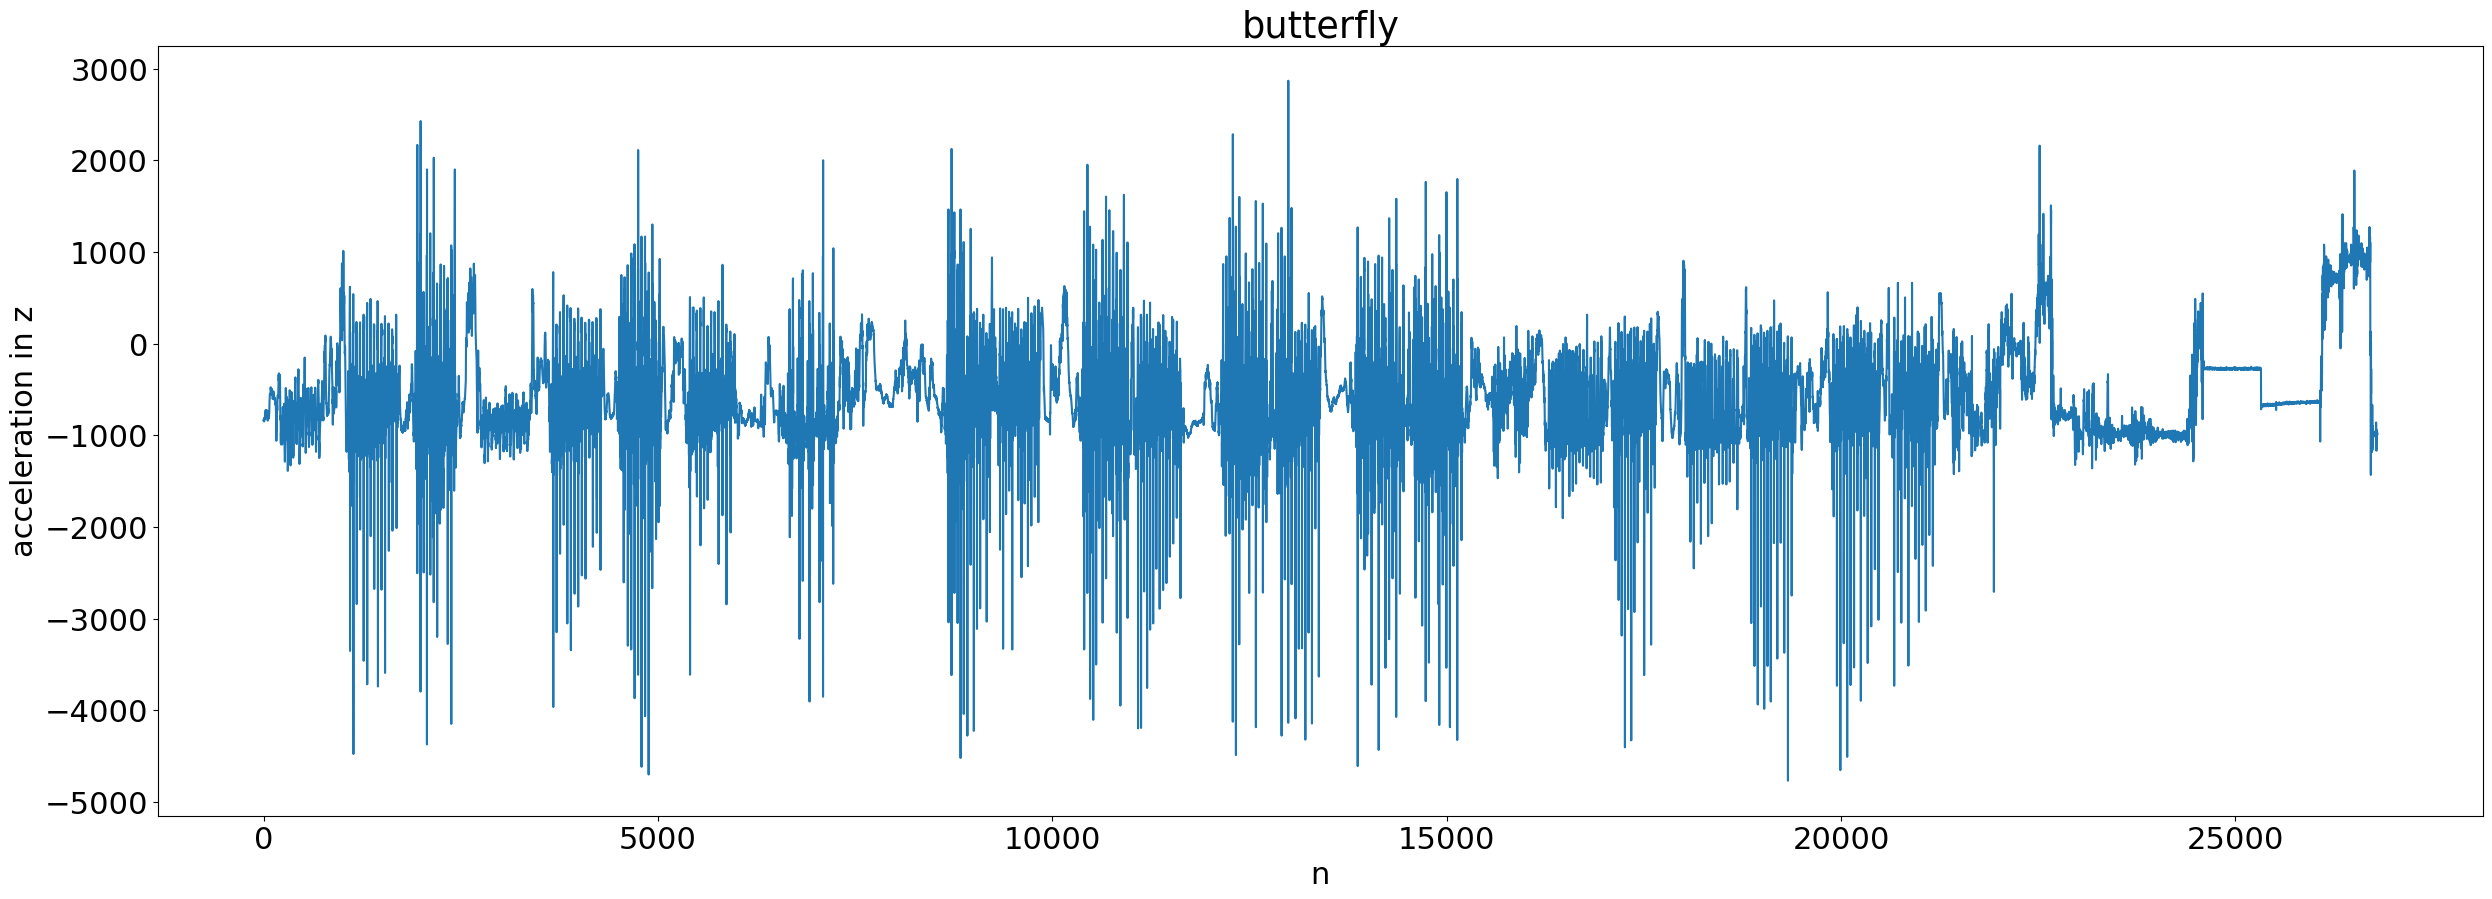

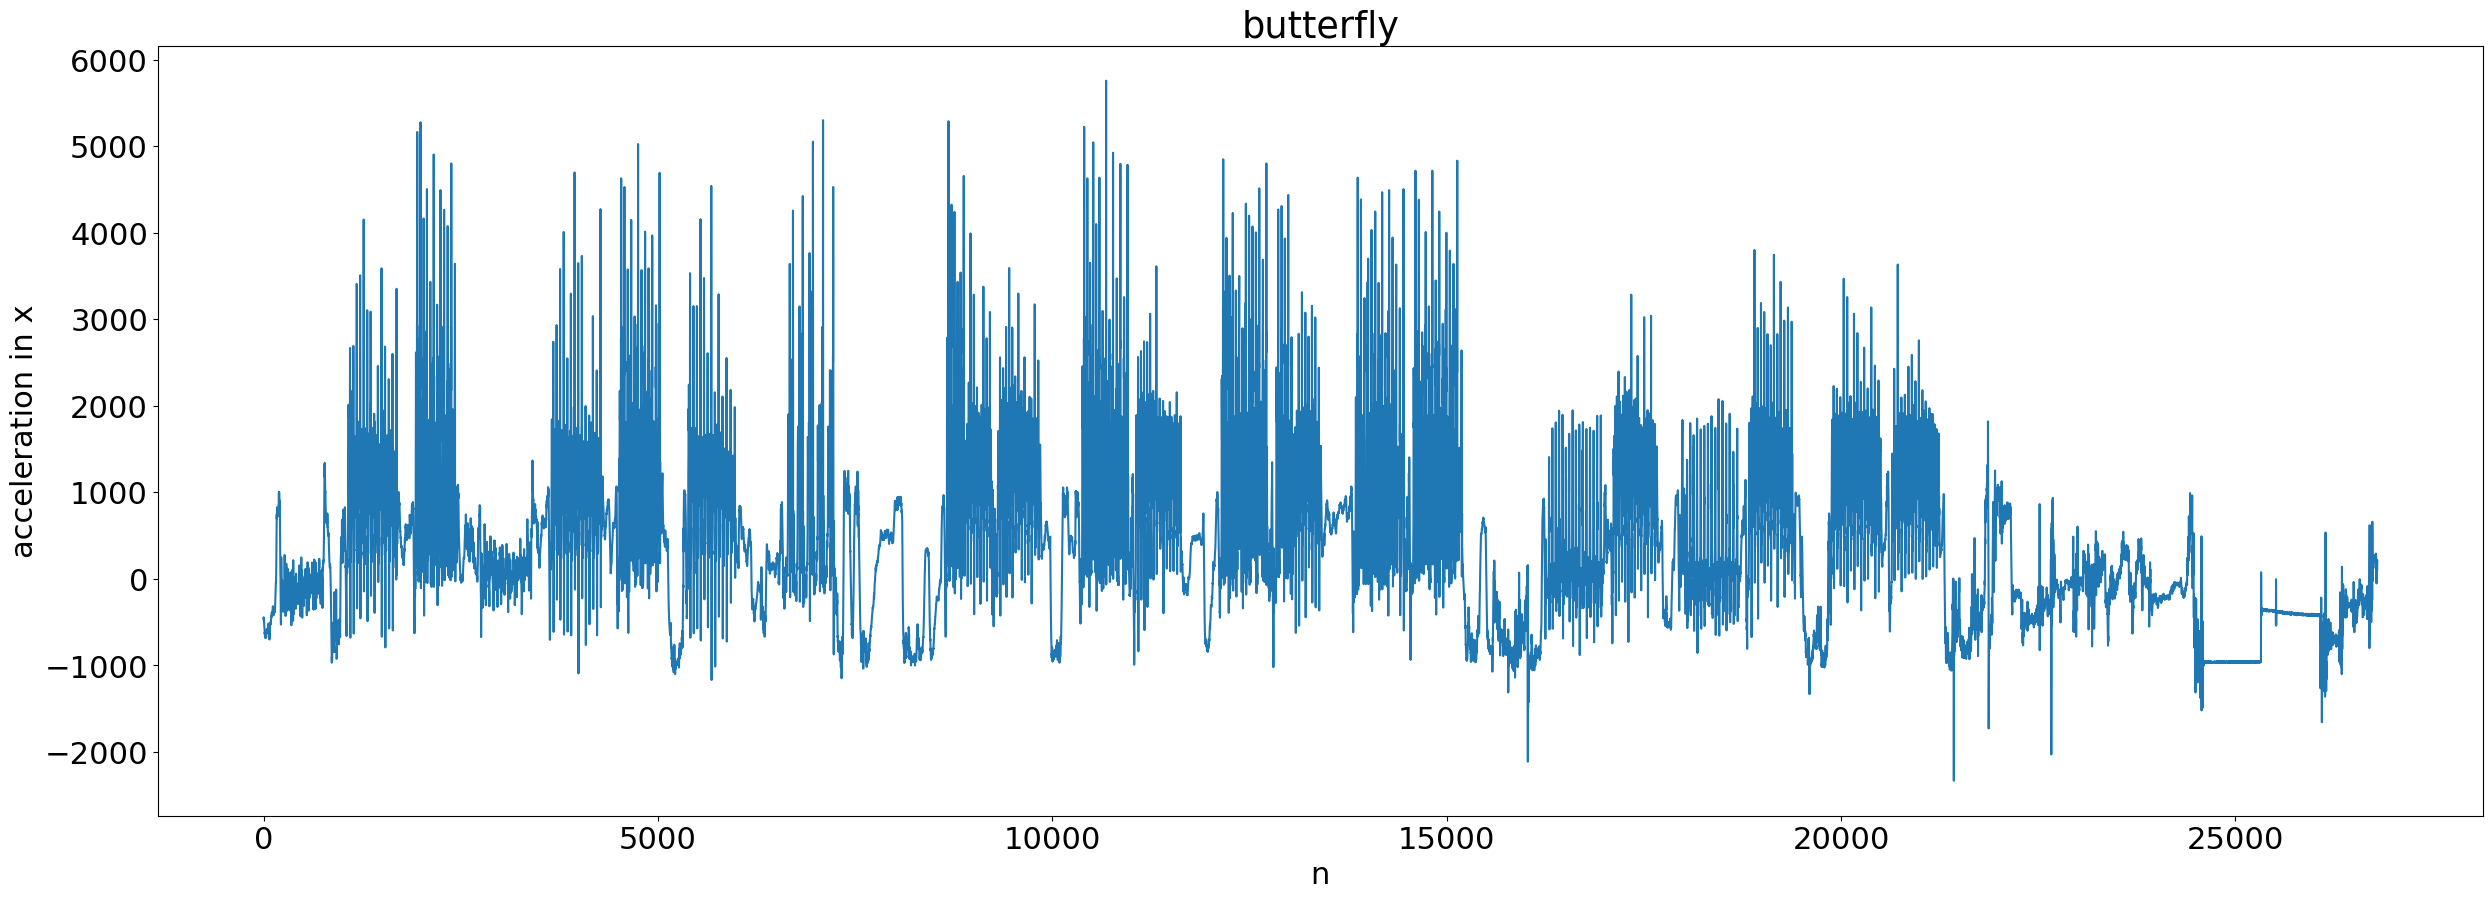

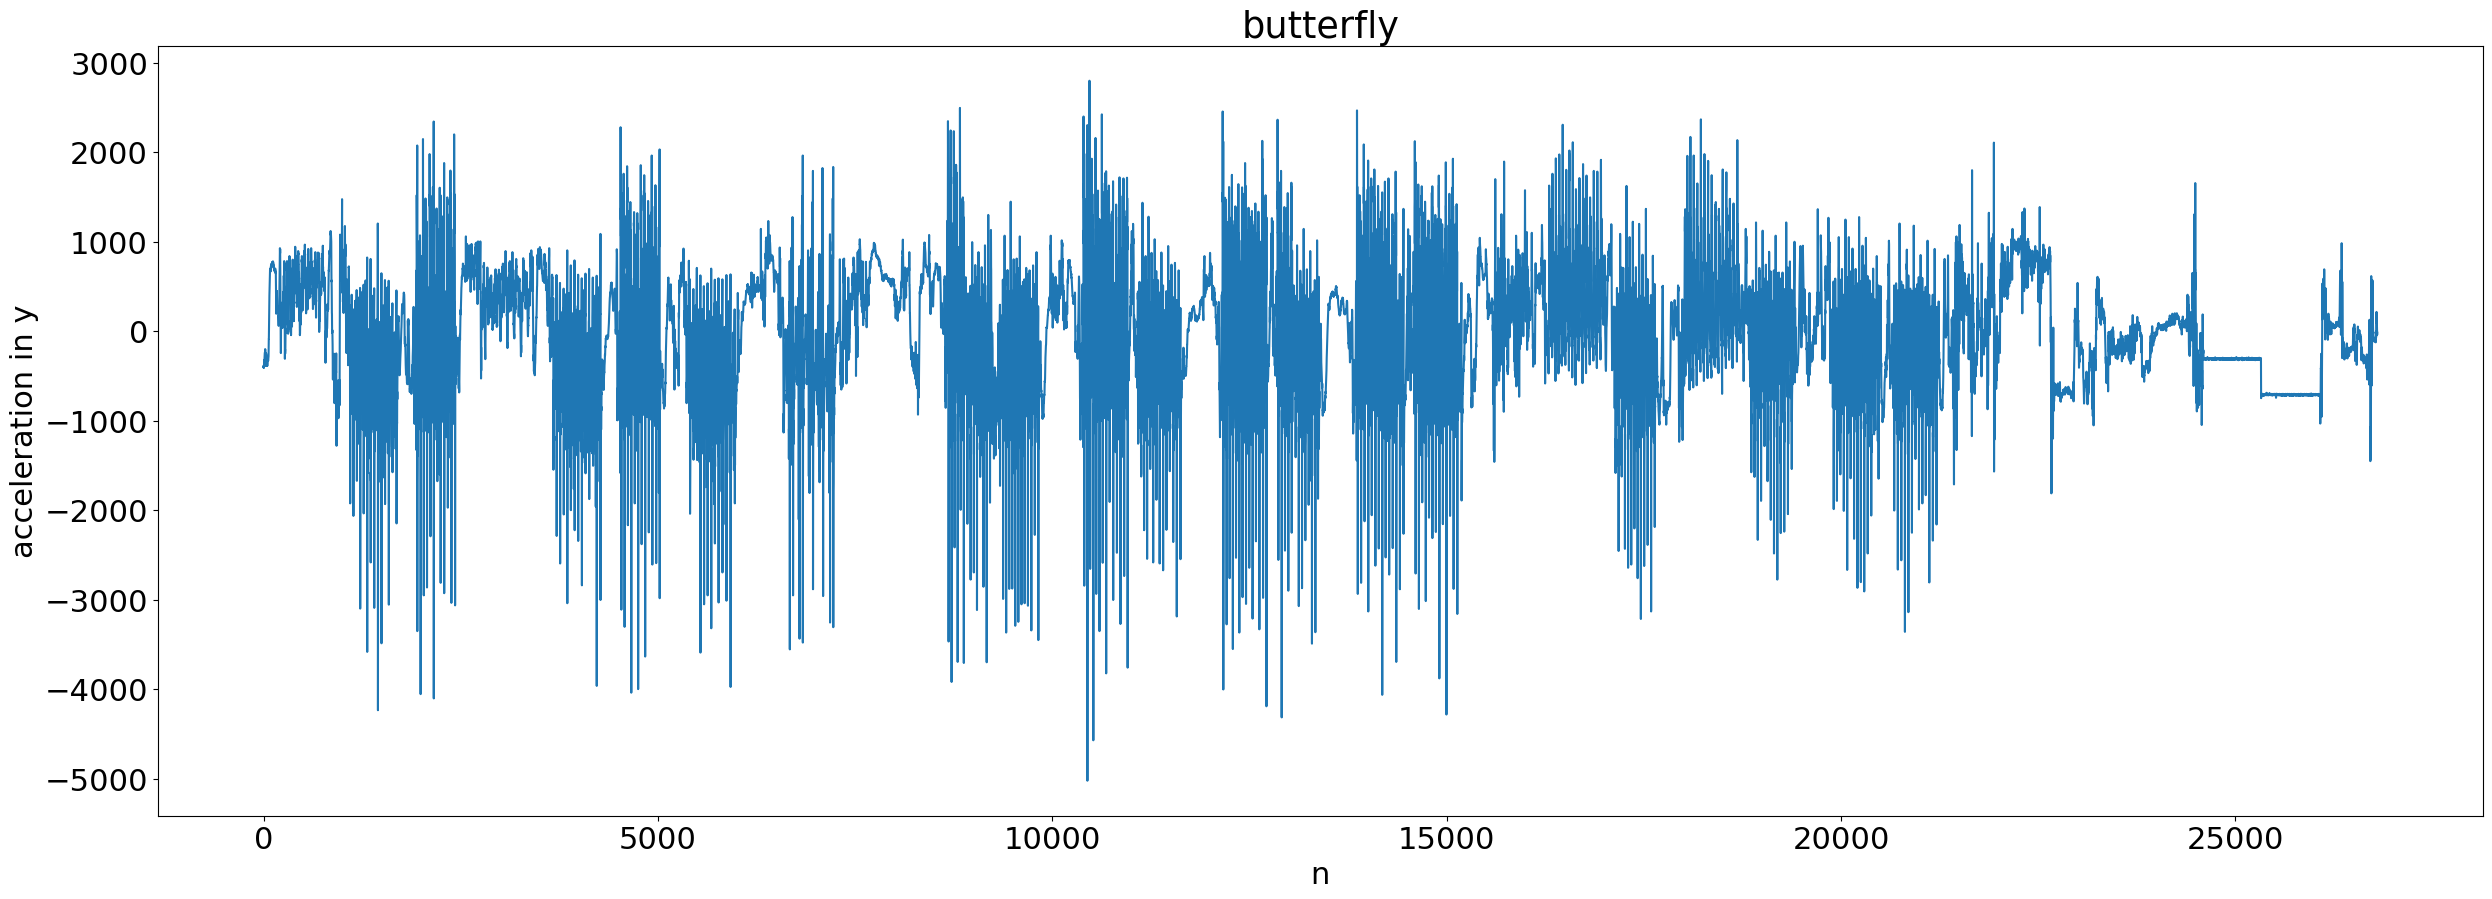

In [49]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(30, 10))
index = 3
date_object = datetime.fromtimestamp(t_all[all_dates_i[index]]/1000.0)
print(date_object)
z = np.array(acc_z[all_dates_i[index]:all_dates_i[index+1]])
y = np.array(acc_y[all_dates_i[index]:all_dates_i[index+1]])
x = np.array(acc_x[all_dates_i[index]:all_dates_i[index+1]])
# butterfly_x = x[20275:20365]
# butterfly_z = z[20275:20365]
# butterfly_y = y[20275:20365]
# full_lap_butterfly_x = x[20100:20800]
# full_lap_butterfly_y = y[20100:20800]
# full_lap_butterfly_z = z[20100:20800]
start =74000
end = -1
plt.plot(z[start:end])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in z")
fig = plt.figure(figsize=(30, 10))
plt.plot(x[start:end])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in x")
fig = plt.figure(figsize=(30,10))
plt.title("butterfly")
plt.plot(y[start:end])
plt.xlabel("n")
plt.ylabel("acceleration in y")

2024-02-28 05:52:24


Text(0, 0.5, 'acceleration in y')

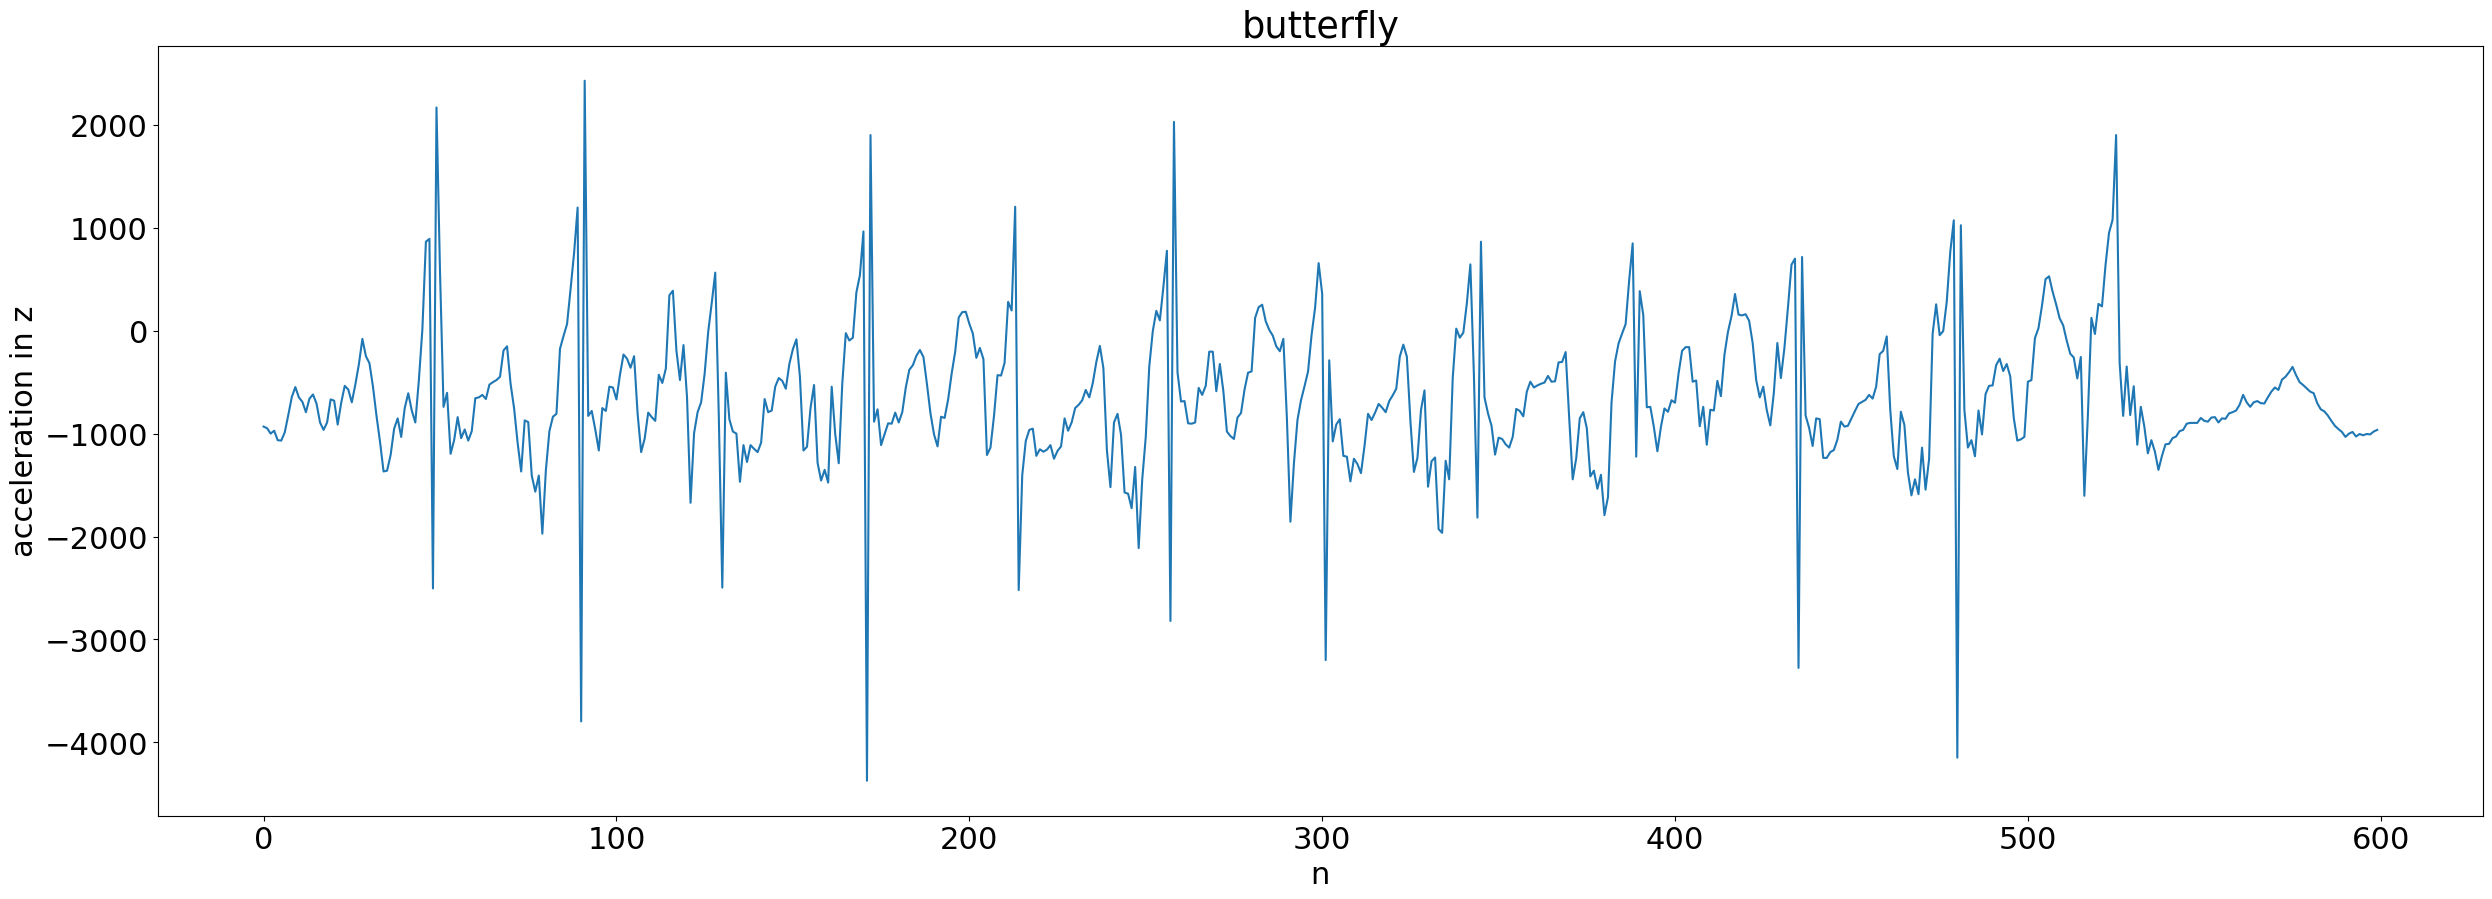

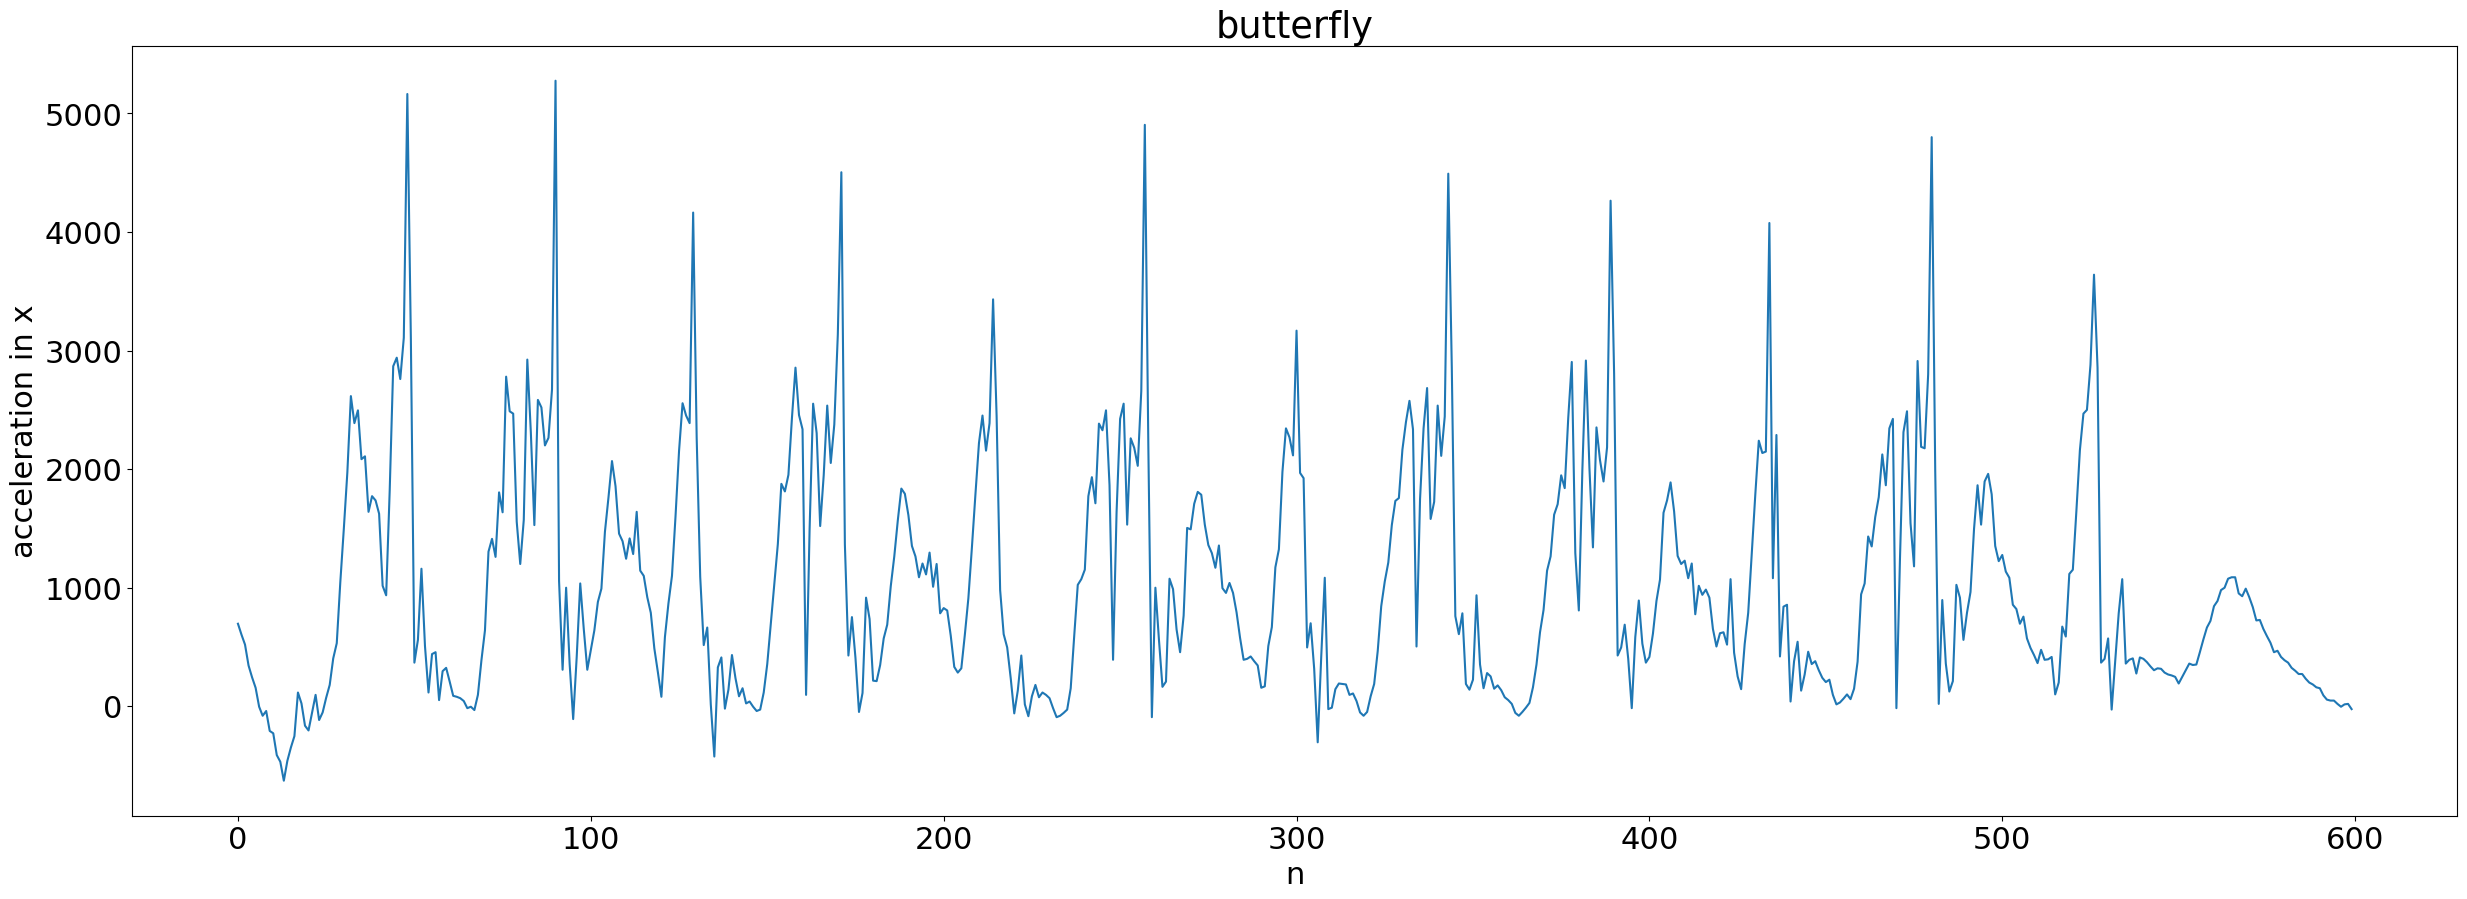

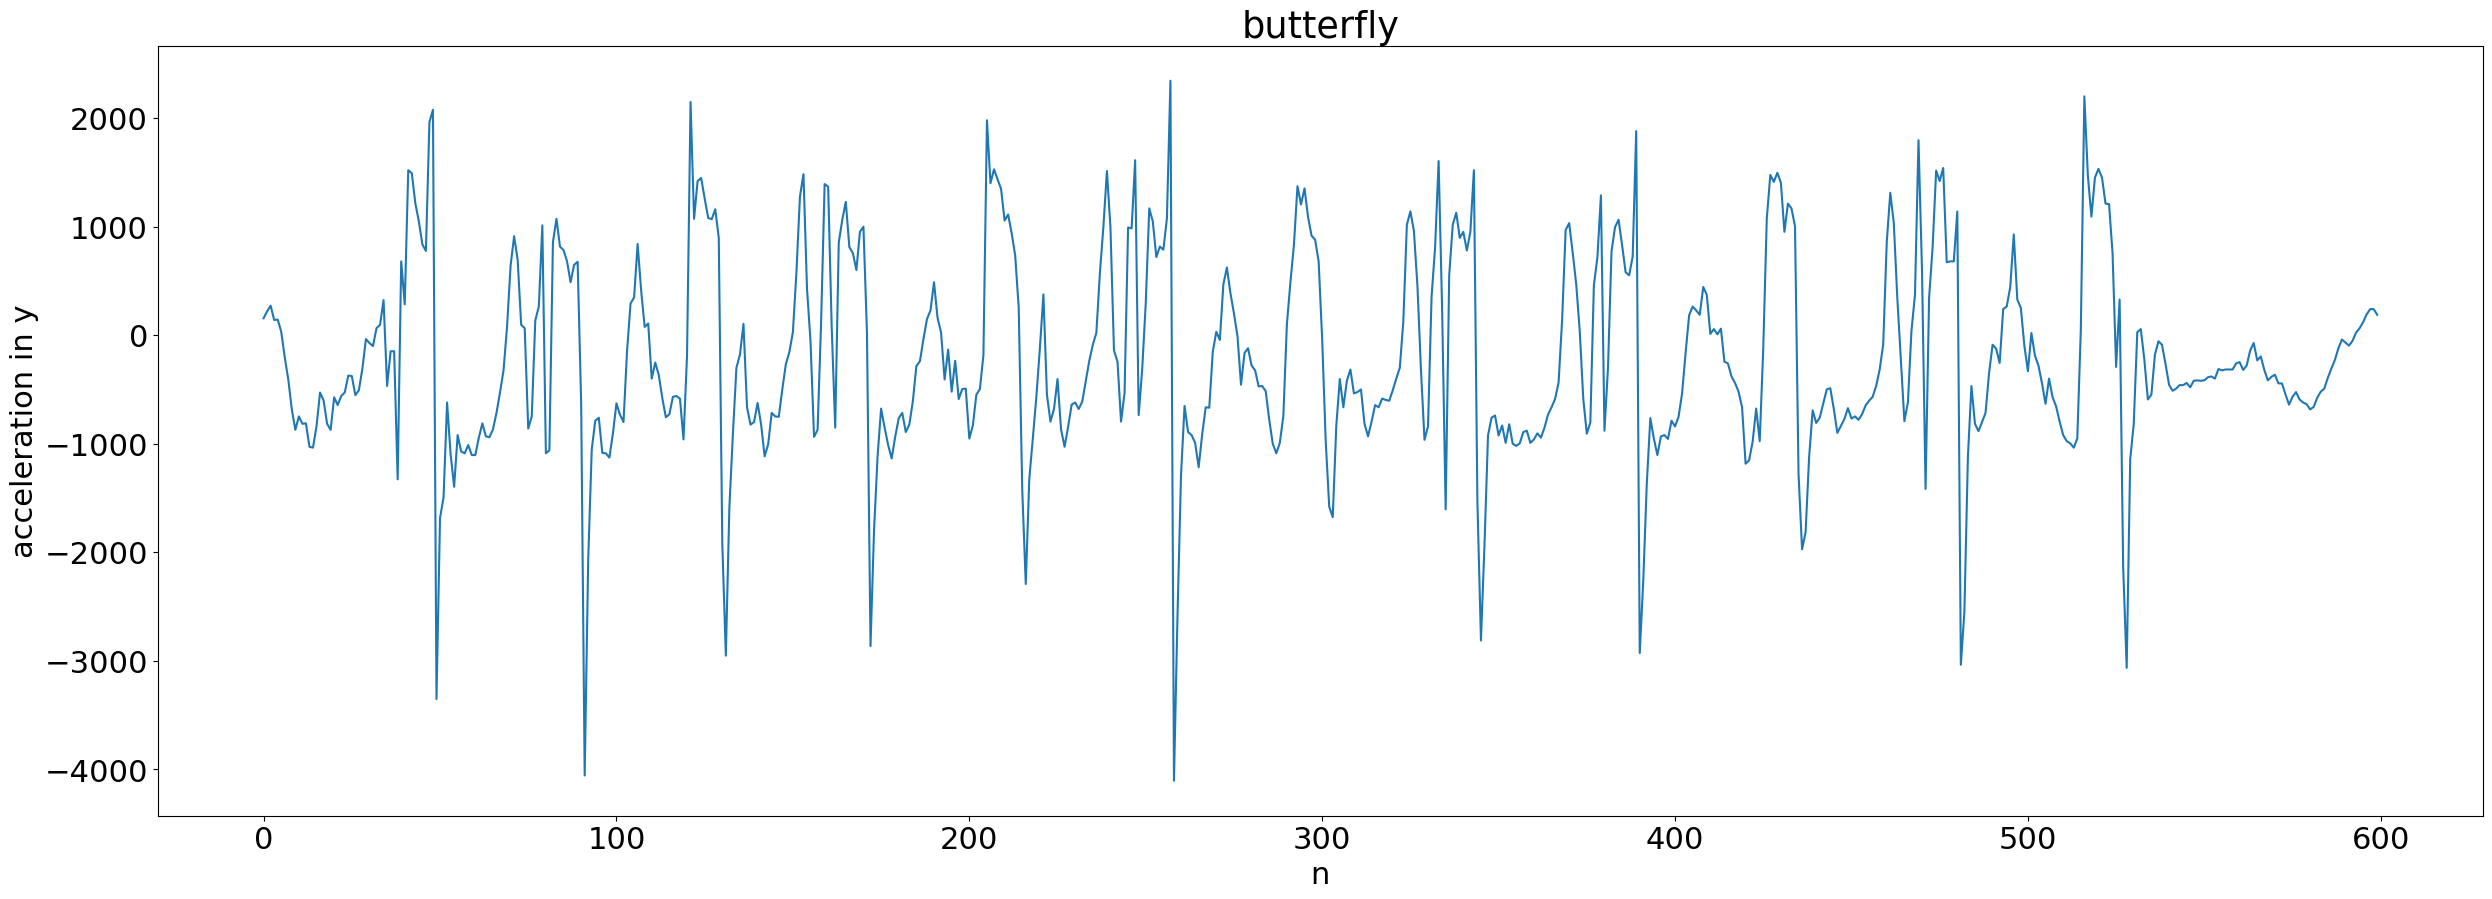

In [78]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(30, 10))
index = 3
date_object = datetime.fromtimestamp(t_all[all_dates_i[index]]/1000.0)
print(date_object)
z = np.array(acc_z[all_dates_i[index]:all_dates_i[index+1]])
y = np.array(acc_y[all_dates_i[index]:all_dates_i[index+1]])
x = np.array(acc_x[all_dates_i[index]:all_dates_i[index+1]])
# butterfly_x = x[20275:20365]
# butterfly_z = z[20275:20365]
# butterfly_y = y[20275:20365]
start = 19950 + 55950
end = -(15100 + 9200)
full_lap_butterfly_x = x[start:end]
full_lap_butterfly_y = y[start:end]
full_lap_butterfly_z = z[start:end]

plt.plot(z[start:end])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in z")
fig = plt.figure(figsize=(30, 10))
plt.plot(x[start:end])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in x")
fig = plt.figure(figsize=(30,10))
plt.title("butterfly")
plt.plot(y[start:end])
plt.xlabel("n")
plt.ylabel("acceleration in y")

In [83]:
start

75900

lagxy: 75900


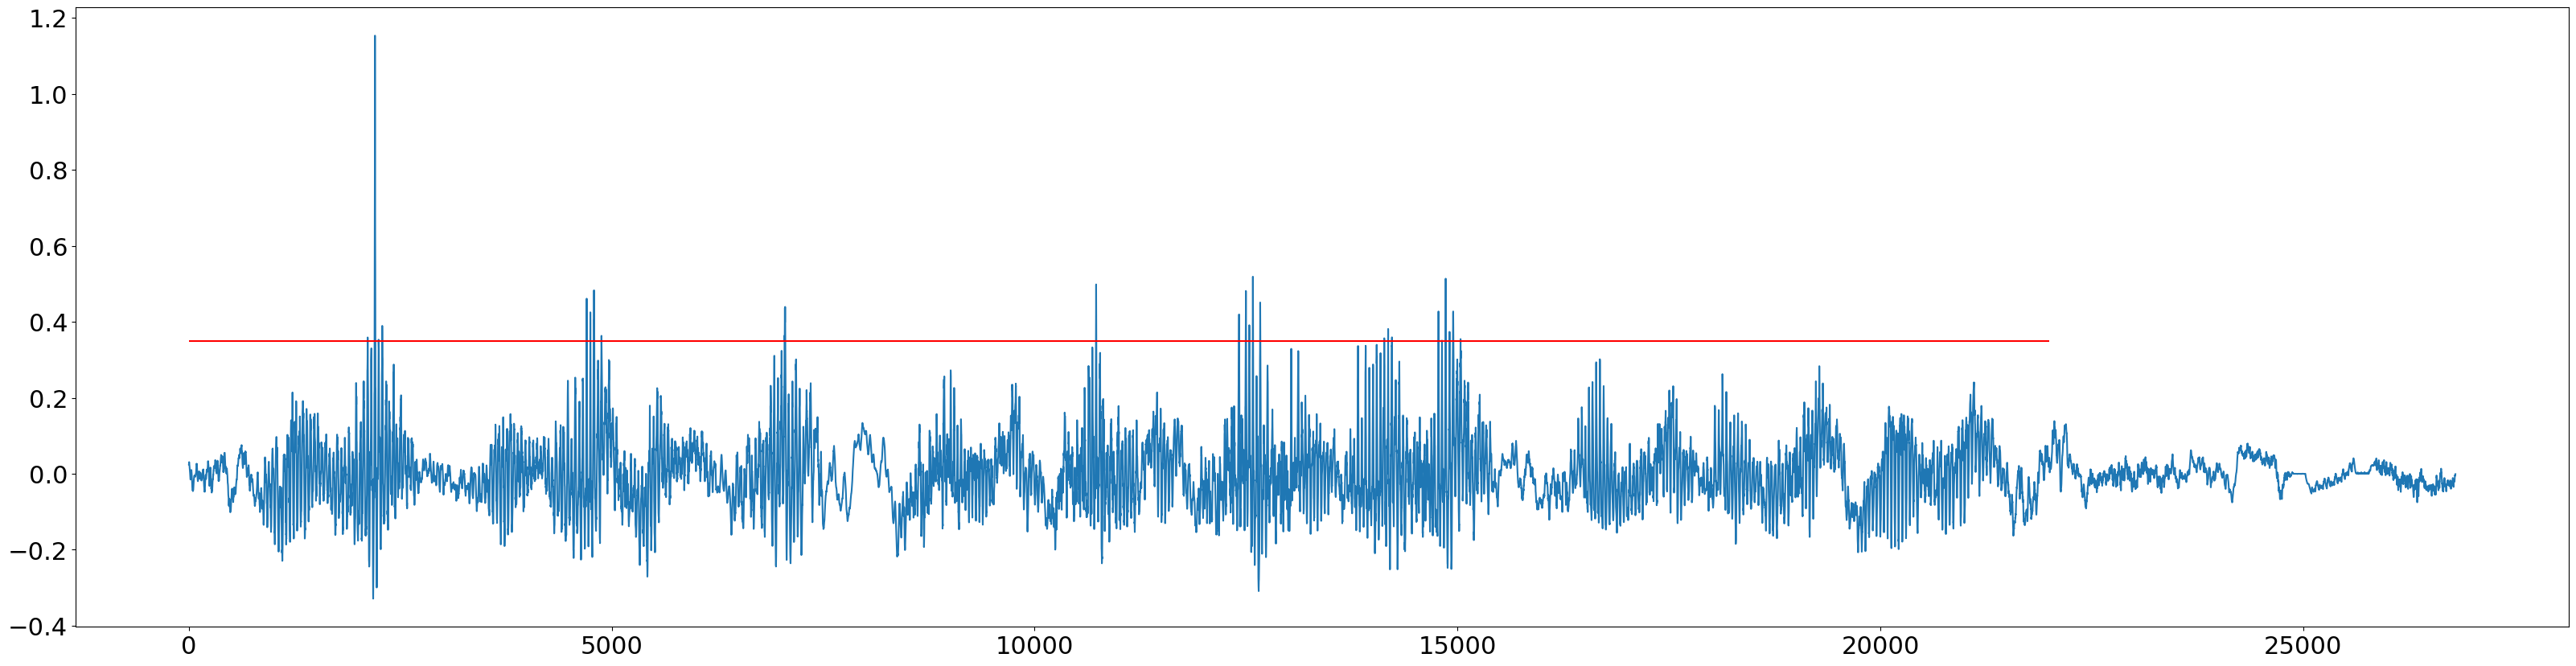

In [101]:
from scipy import signal

corrxy = signal.correlate((x-x.mean()), (full_lap_butterfly_x-full_lap_butterfly_x.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(x)*np.std(full_lap_butterfly_x)*len(full_lap_butterfly_x))
lags = signal.correlation_lags(len(x), len(full_lap_butterfly_x), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy[74000:])
plt.hlines(0.35, 0,22000,color='r')

In [97]:
lags[np.where(corrxy>0.47)]

array([75896, 75897, 75898, 75899, 75900, 75901, 75902, 75903, 75904,
       78490, 84427, 86198, 86280, 86281, 88560, 88561])

In [88]:
lagxy

array([75900])

lagxy: 75900


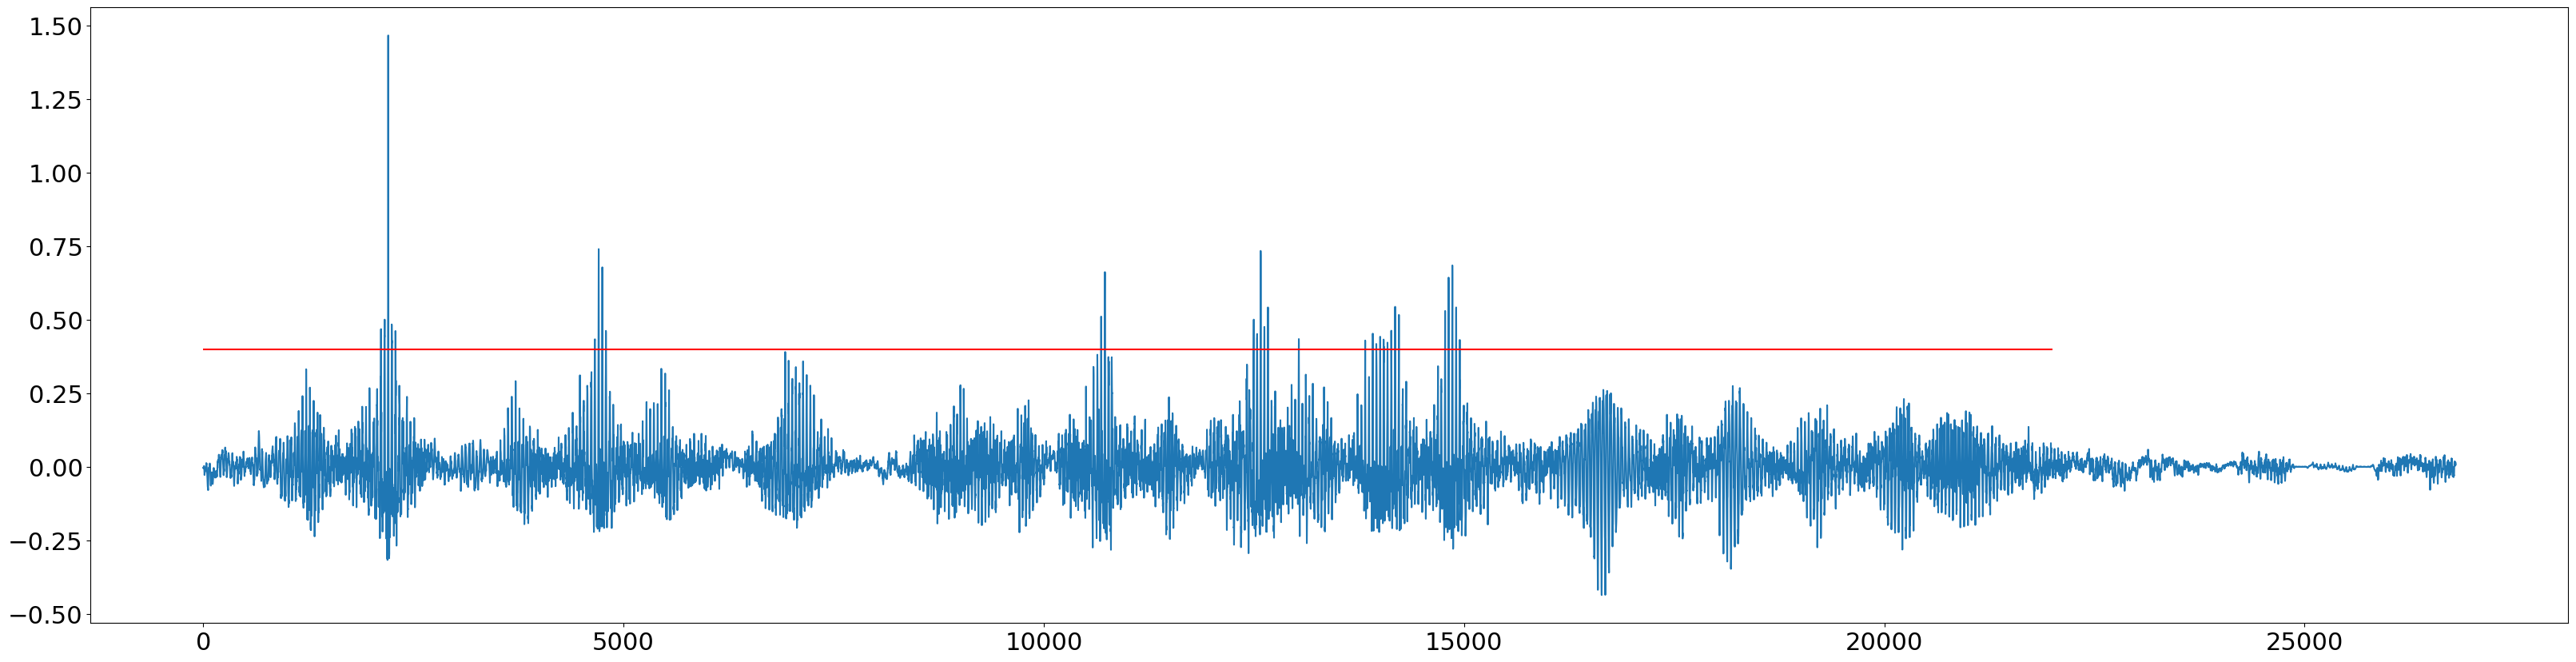

In [84]:
from scipy import signal

corrxy = signal.correlate((y-y.mean()), (full_lap_butterfly_y-full_lap_butterfly_y.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(y)*np.std(full_lap_butterfly_y)*len(full_lap_butterfly_y))
lags = signal.correlation_lags(len(y), len(full_lap_butterfly_y), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy[74000:])
plt.hlines(0.4, 0,22000,color='r')

lagxy: 75900


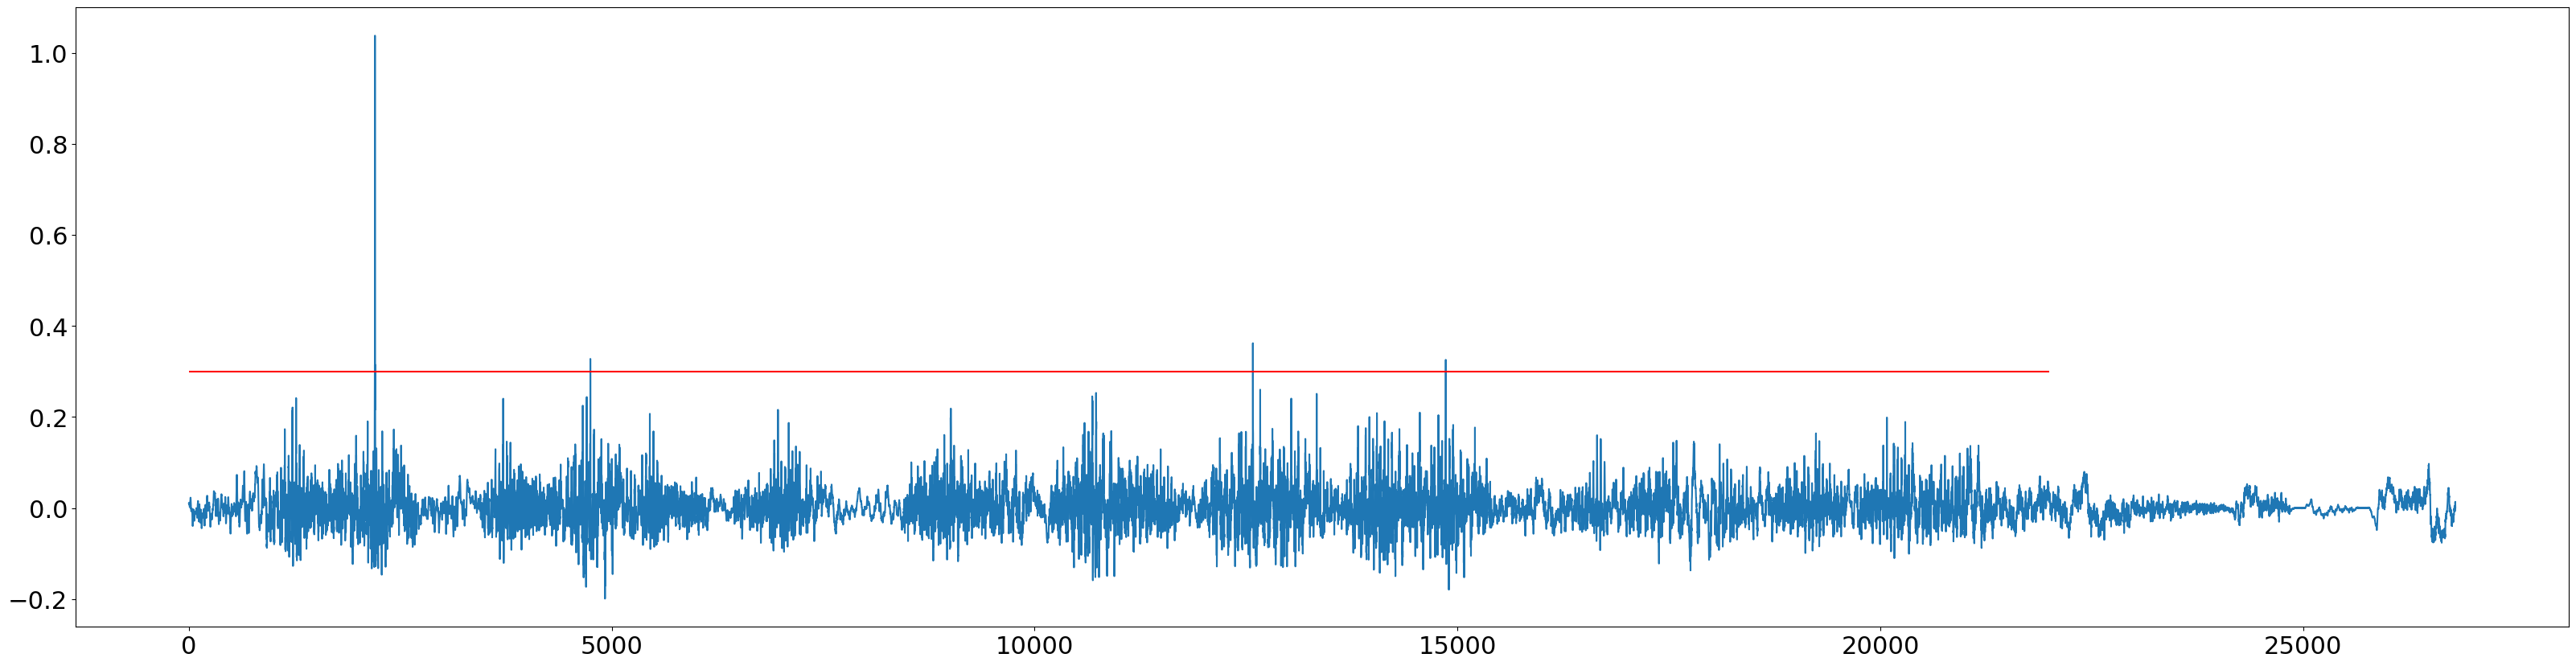

In [86]:
from scipy import signal

corrxy = signal.correlate((z-z.mean()), (full_lap_butterfly_z-full_lap_butterfly_z.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(z)*np.std(full_lap_butterfly_z)*len(full_lap_butterfly_z))
lags = signal.correlation_lags(len(z), len(full_lap_butterfly_z), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy[74000:])
plt.hlines(0.3, 0,22000,color='r')

lagxy: 72900


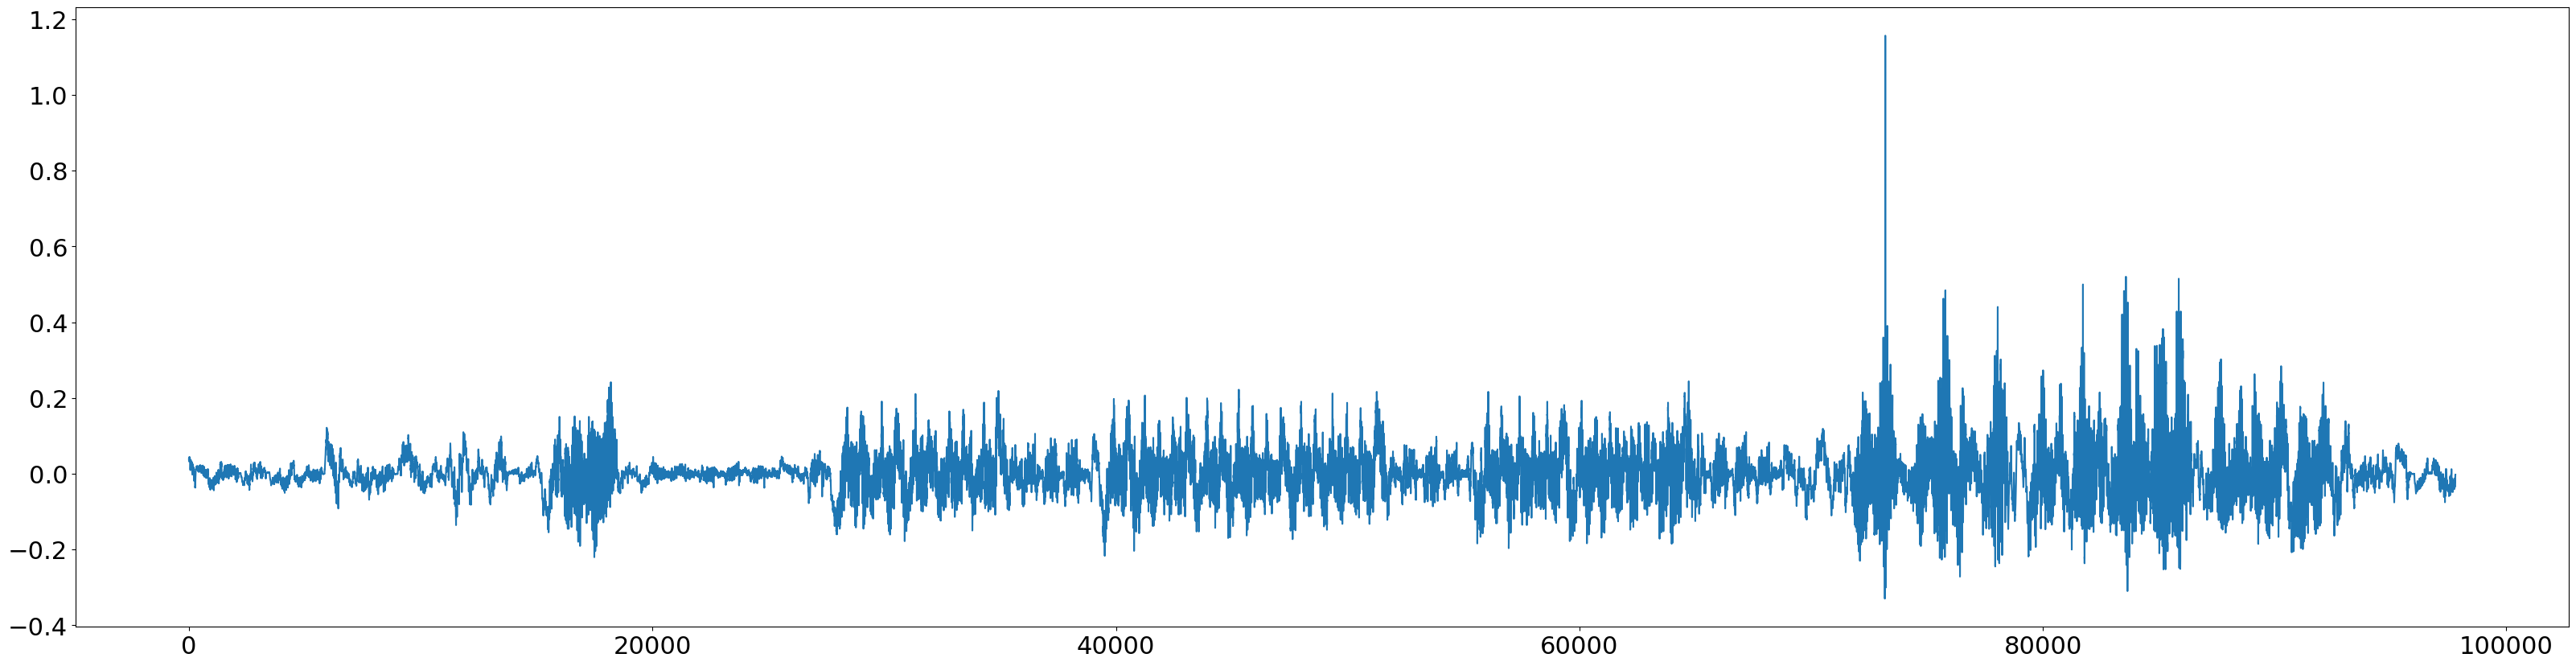

In [71]:
from scipy import signal

corrxy = signal.correlate((x-x.mean()), (full_lap_butterfly_x-full_lap_butterfly_x.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(x)*np.std(full_lap_butterfly_x)*len(full_lap_butterfly_x))
lags = signal.correlation_lags(len(x), len(full_lap_butterfly_x), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy)

lagxy: 20192


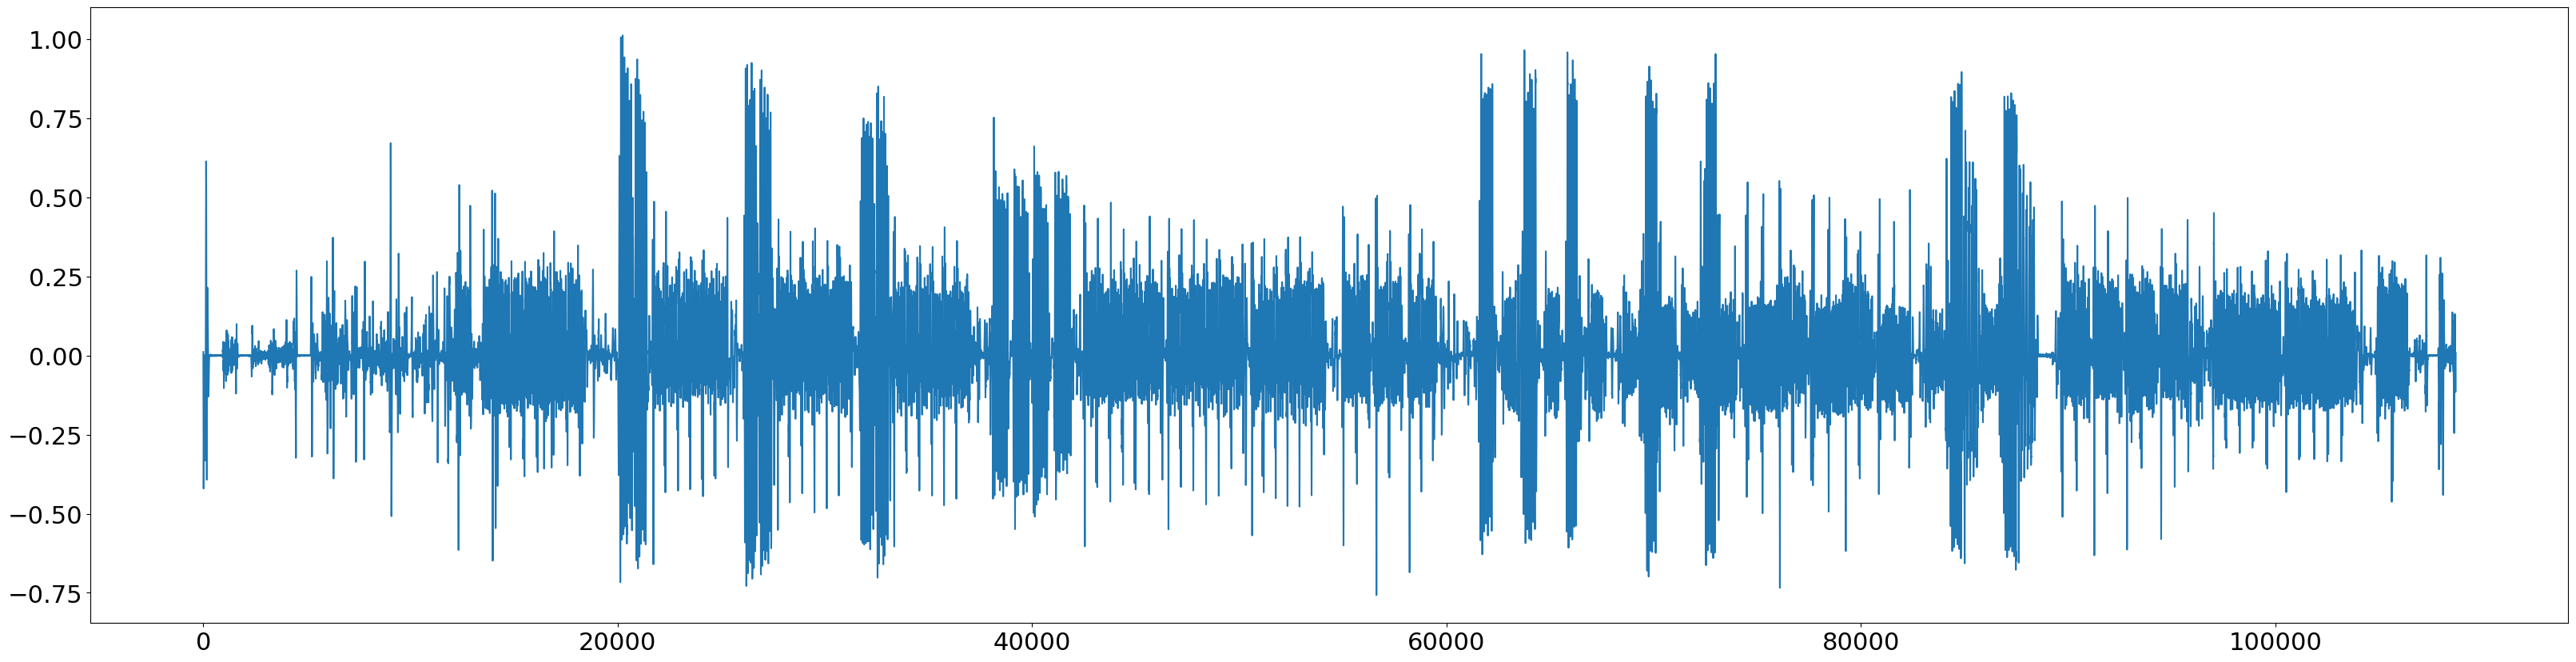

In [58]:
from scipy import signal

corrxy = signal.correlate((x-x.mean()), (butterfly_x-butterfly_x.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(x)*np.std(butterfly_x)*len(butterfly_x))
lags = signal.correlation_lags(len(x), len(butterfly_x), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy)

lagxy: 87116


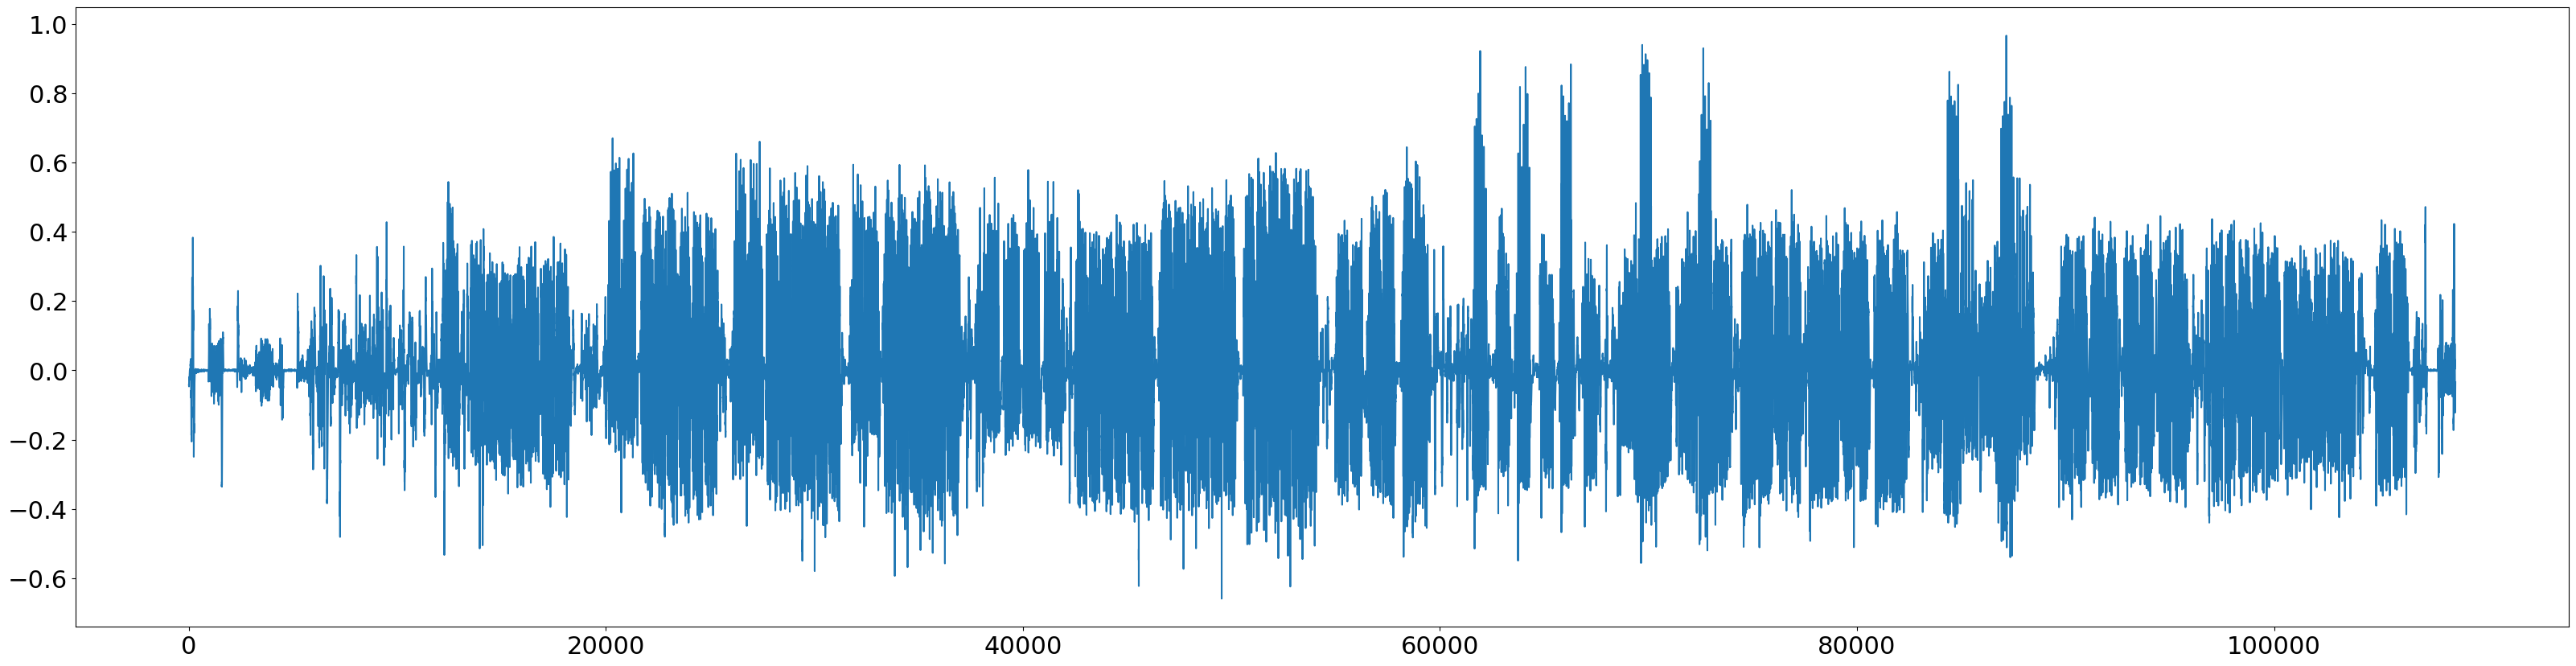

In [51]:

corrxy = signal.correlate((y-y.mean()), (butterfly_y-butterfly_y.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(y)*np.std(butterfly_y)*len(butterfly_y))
lags = signal.correlation_lags(len(y), len(butterfly_y), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy)

lagxy: 72755


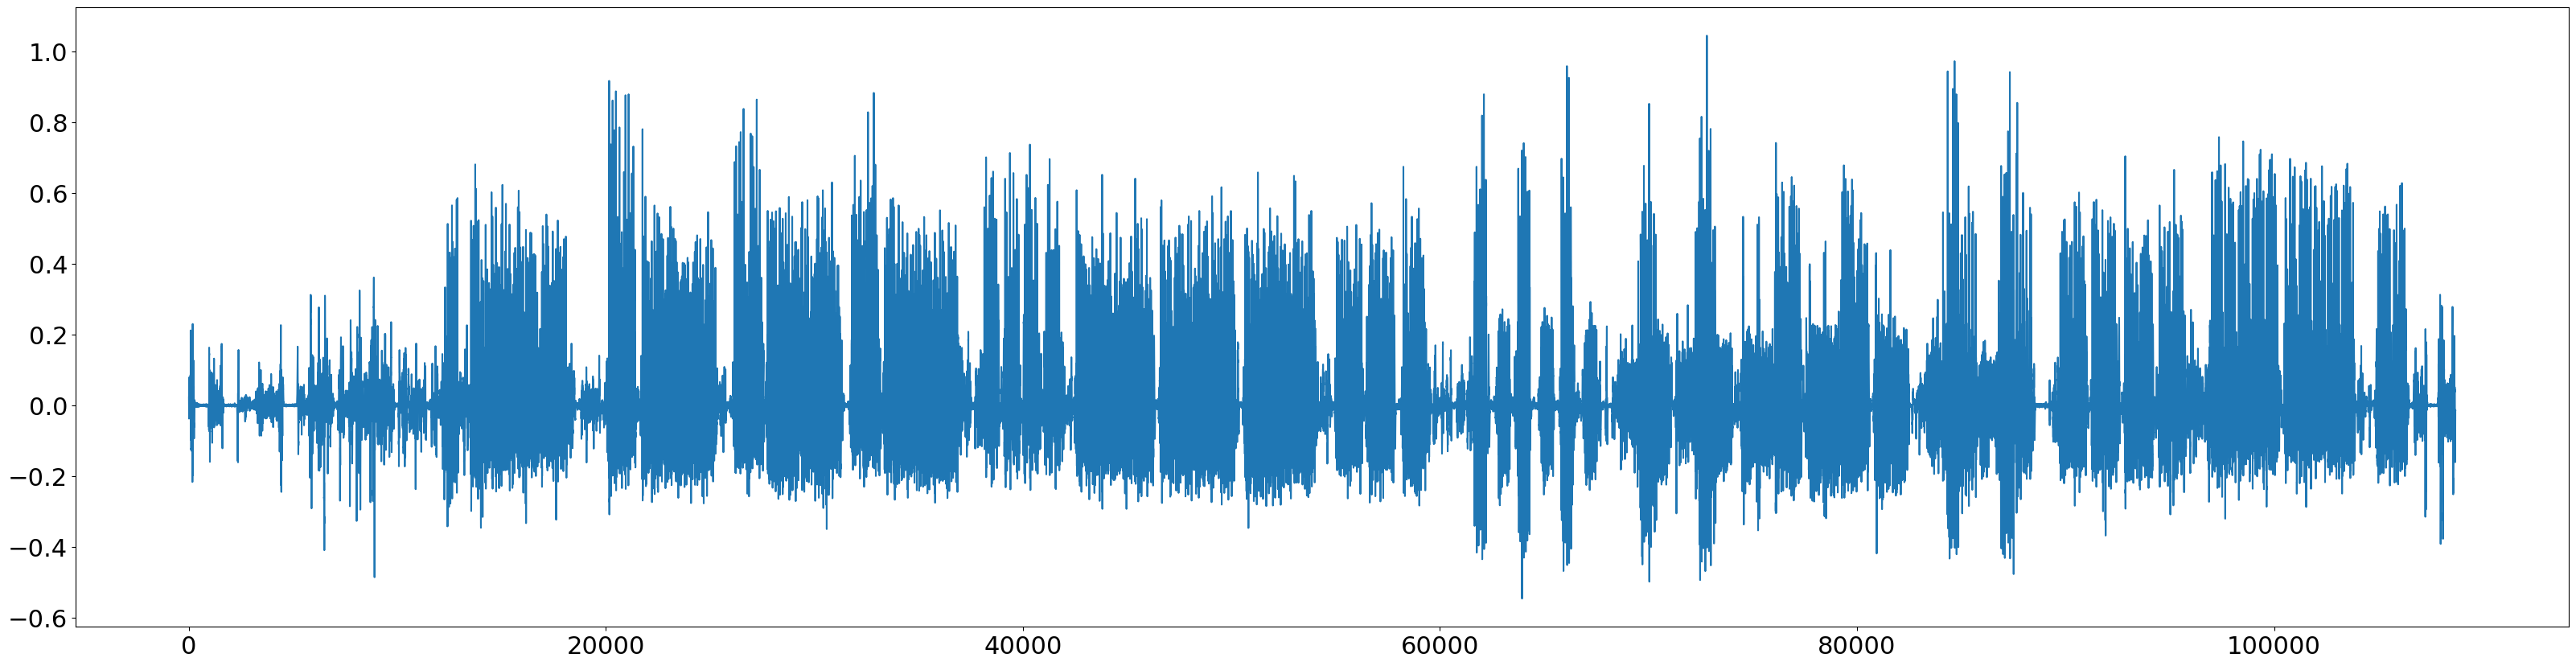

In [53]:
corrxy = signal.correlate((z-z.mean()), (butterfly_z-butterfly_z.mean()), mode="same", method="direct")
corrxy = corrxy /(np.std(z)*np.std(butterfly_z)*len(butterfly_z))
lags = signal.correlation_lags(len(z), len(butterfly_z), mode="same")
lagxy = lags[np.argmax(corrxy)]
print(f'lagxy: {lagxy}')
fig = plt.figure(figsize=(40, 10))
plt.plot(corrxy)

2024-02-07 05:53:13


Text(0, 0.5, 'acceleration in y')

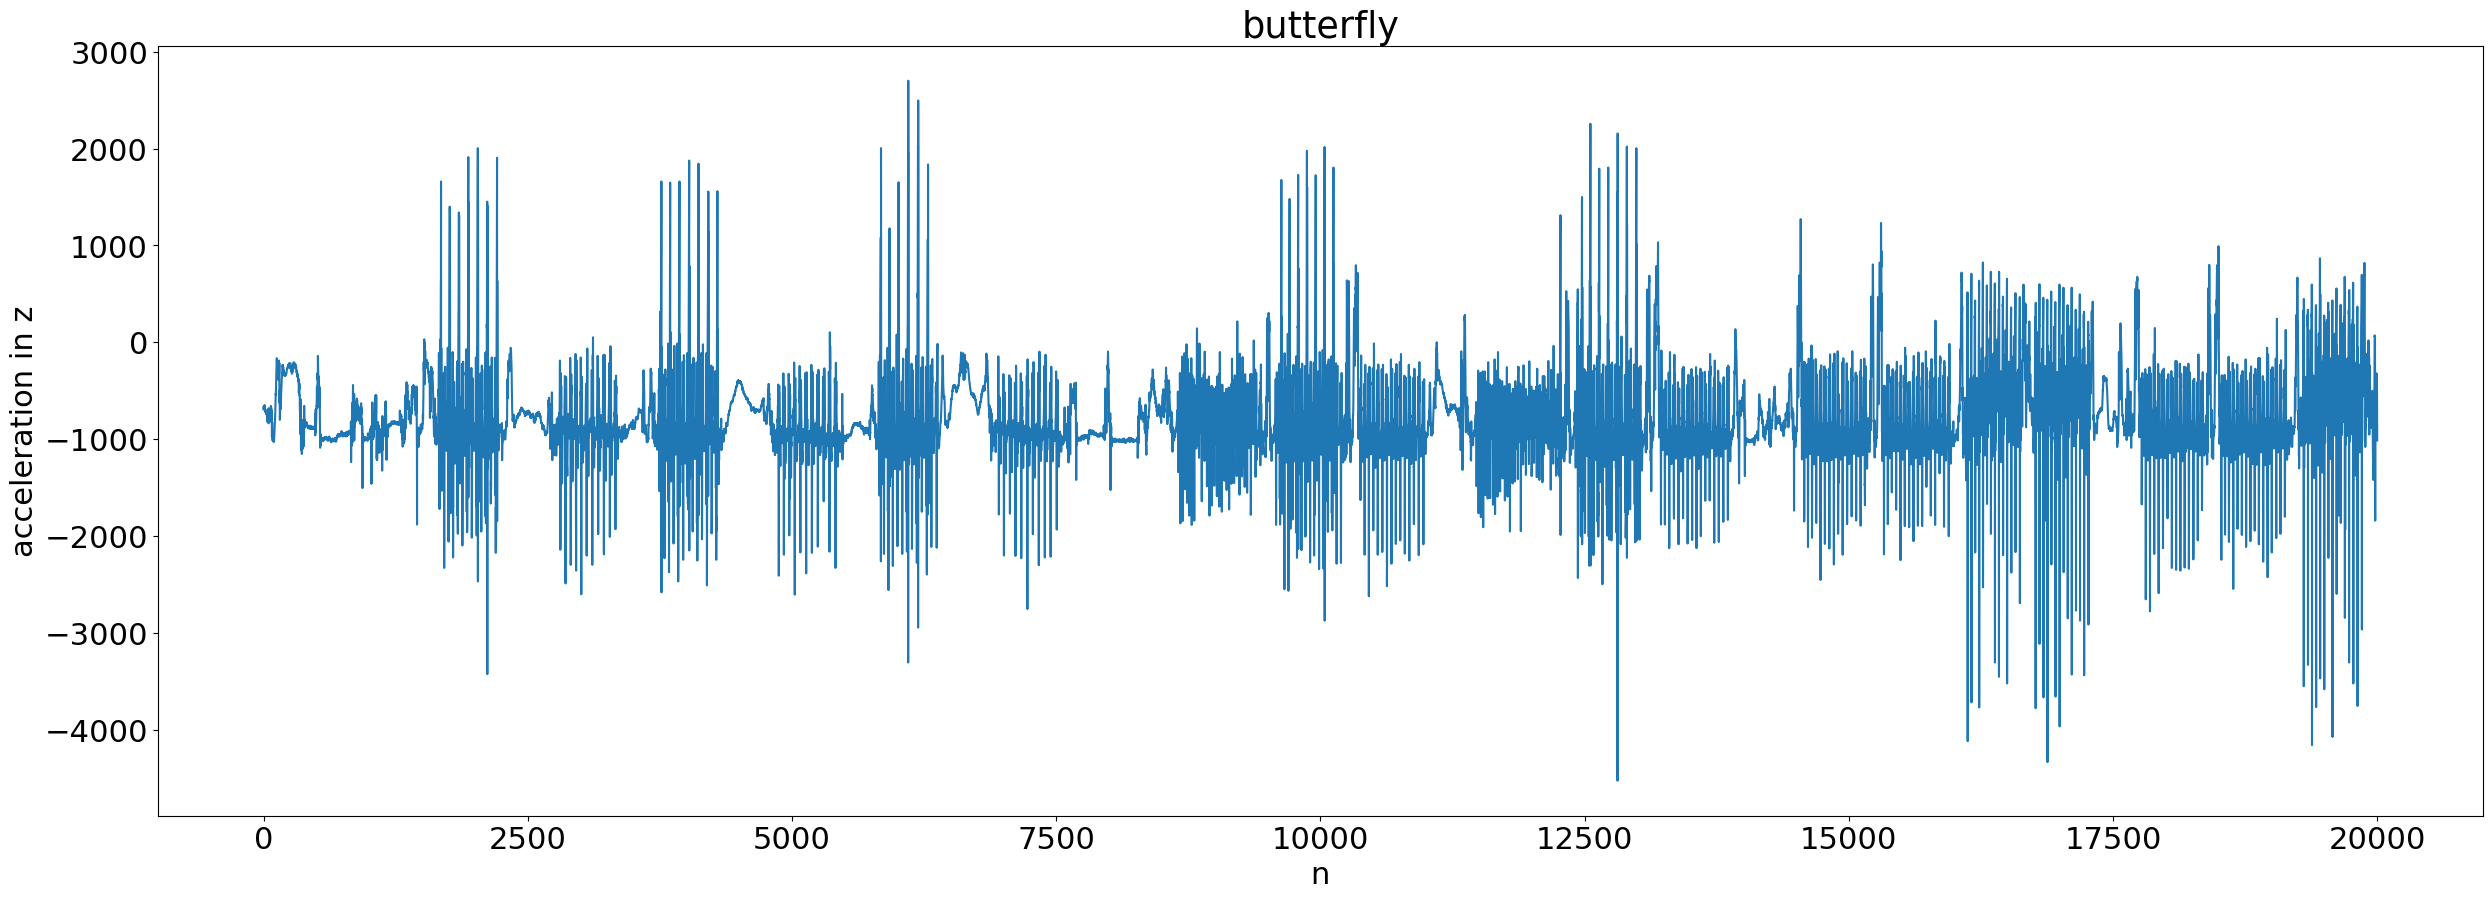

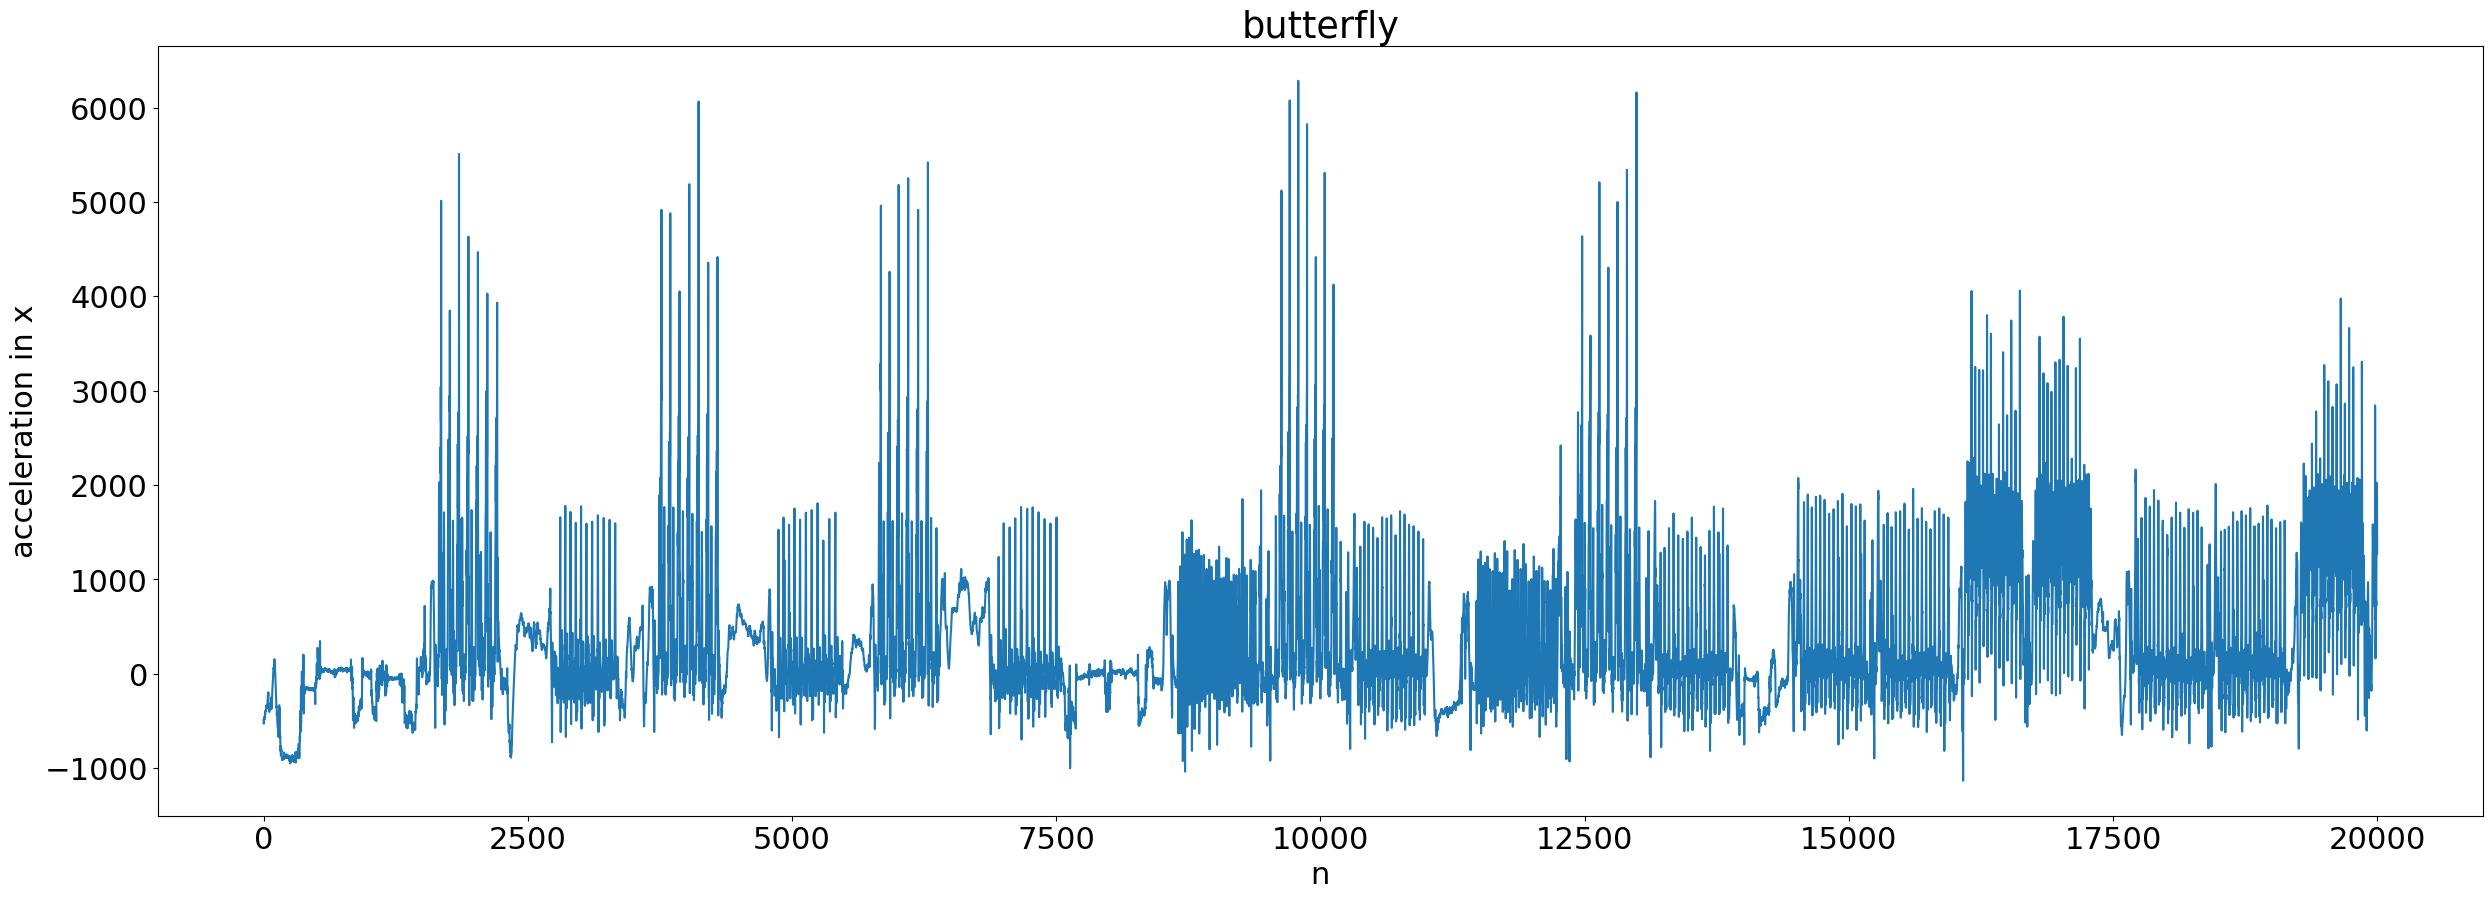

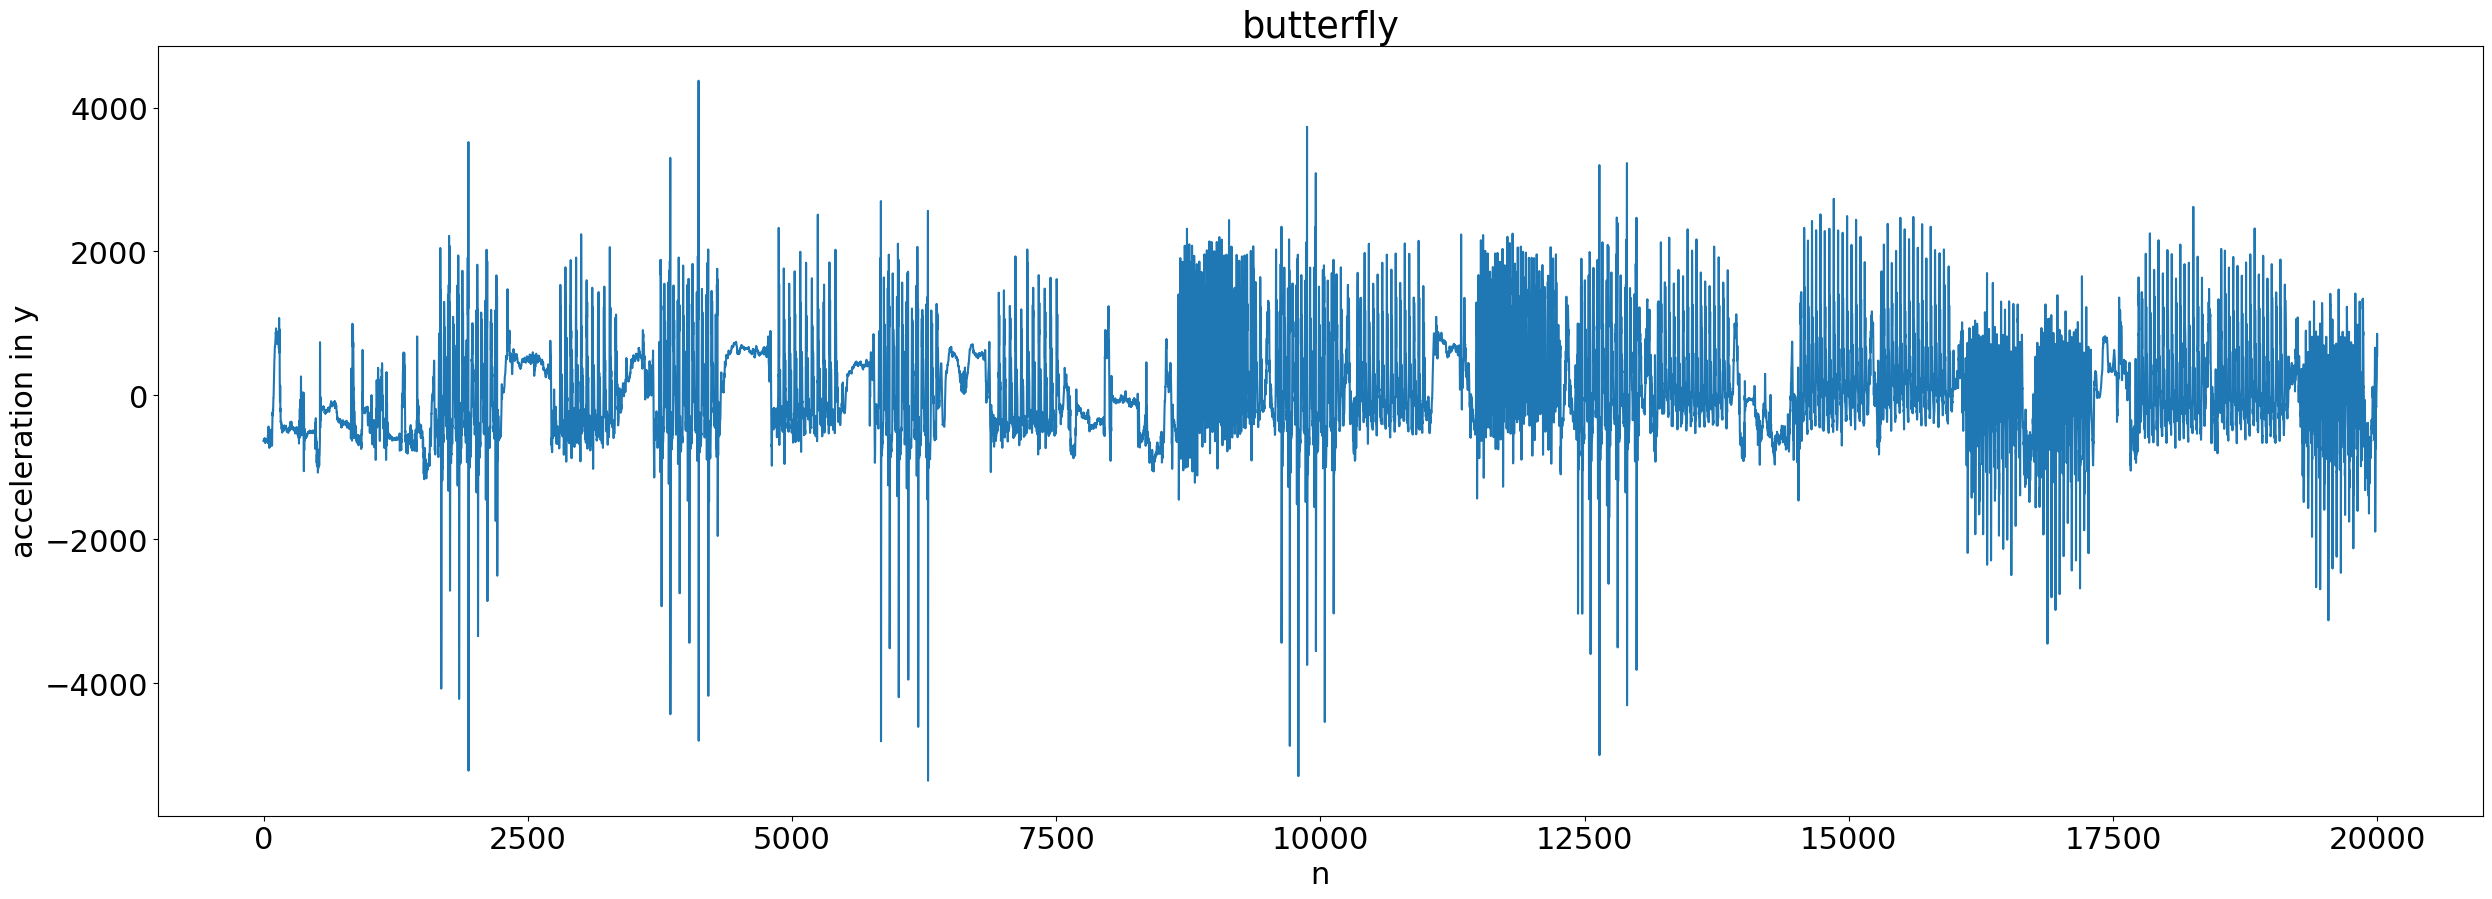

In [54]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(30, 10))
index = 4
date_object = datetime.fromtimestamp(t_all[all_dates_i[index]]/1000.0)
print(date_object)
z = np.array(acc_z[all_dates_i[4]:all_dates_i[5]])
y = np.array(acc_y[all_dates_i[4]:all_dates_i[5]])
x = np.array(acc_x[all_dates_i[4]:all_dates_i[5]])
butterfly_x = x[20275:20365]
butterfly_z = z[20275:20365]
butterfly_y = y[20275:20365]
plt.plot(z[60000:80000])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in z")
fig = plt.figure(figsize=(30, 10))
plt.plot(x[60000:80000])
plt.title("butterfly")
plt.xlabel("n")
plt.ylabel("acceleration in x")
fig = plt.figure(figsize=(30,10))
plt.title("butterfly")
plt.plot(y[60000:80000])
plt.xlabel("n")
plt.ylabel("acceleration in y")

Text(0, 0.5, 'acceleration in y')

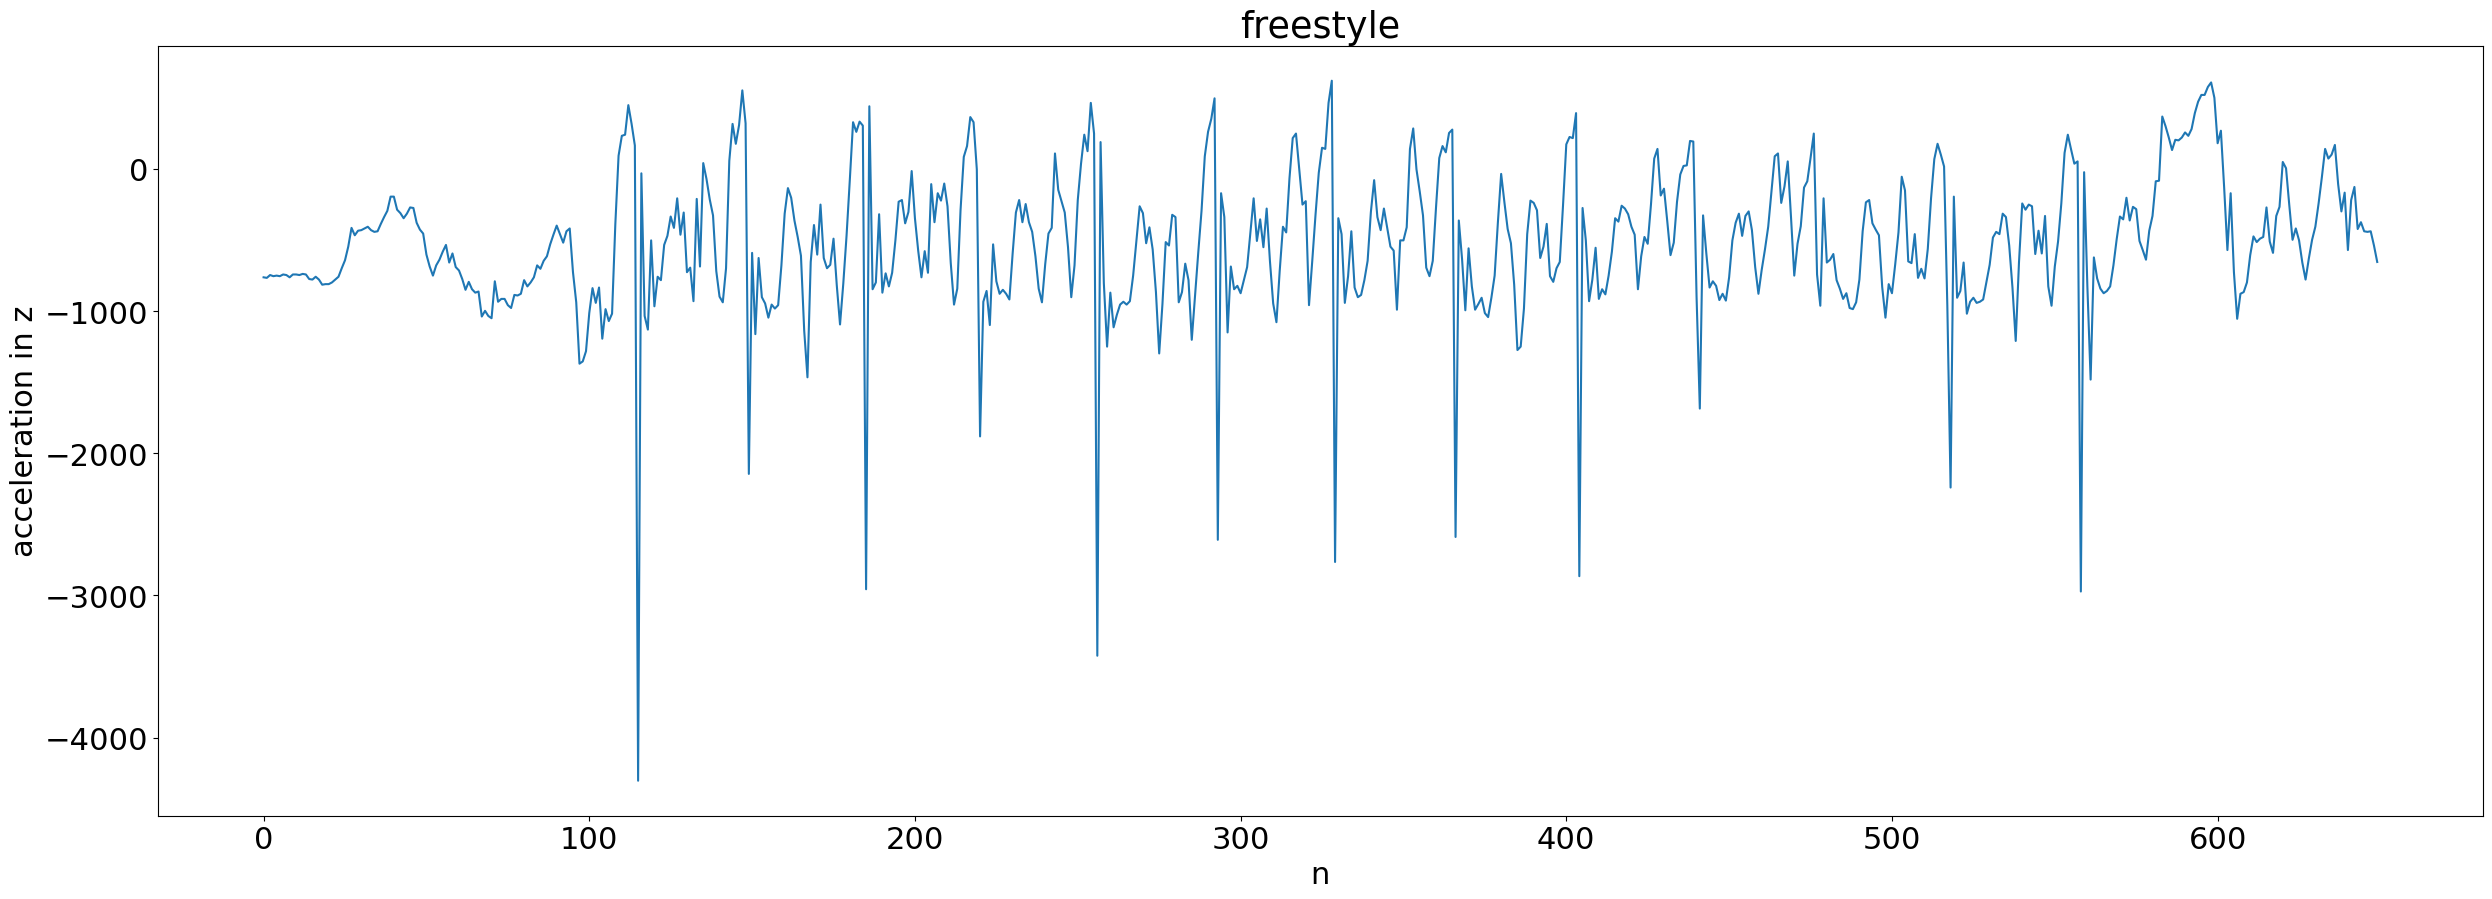

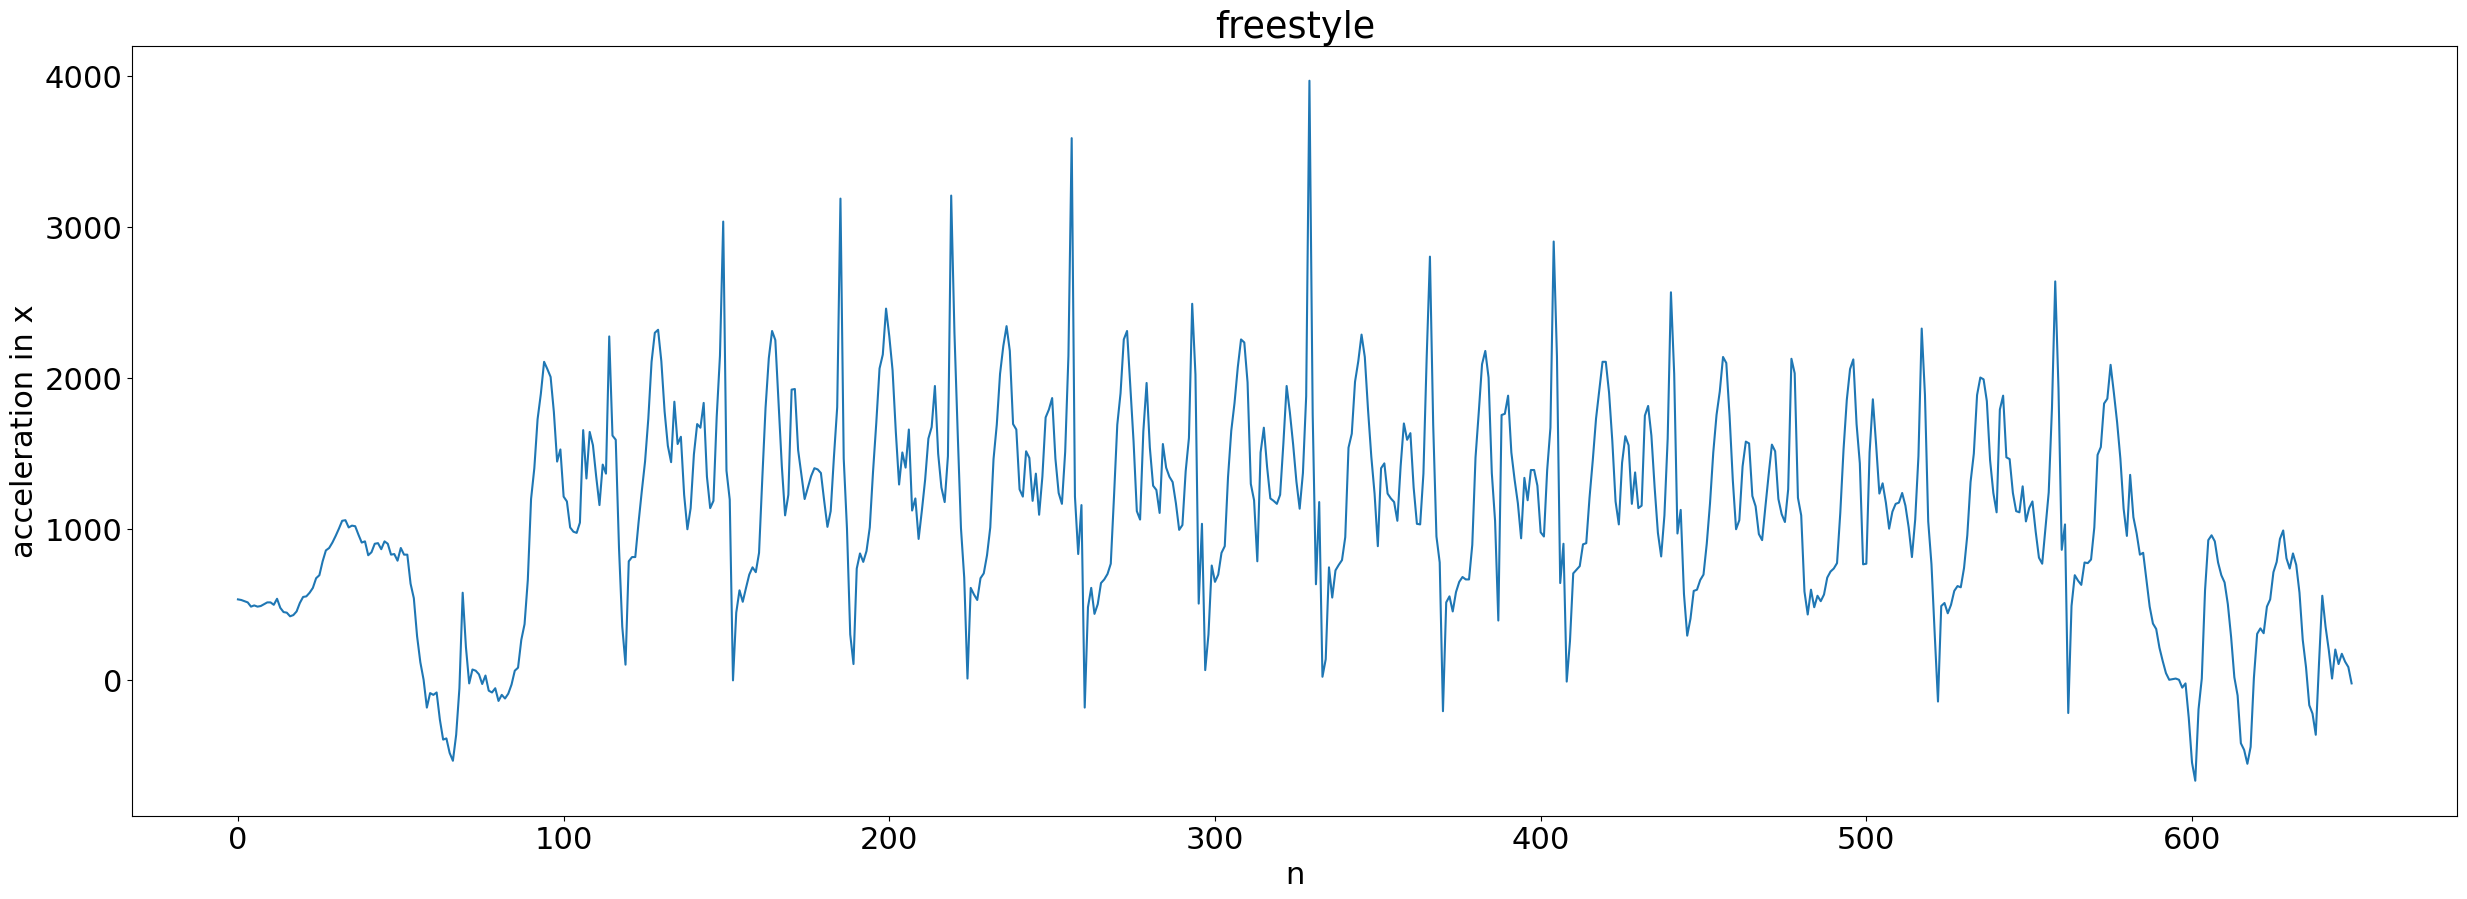

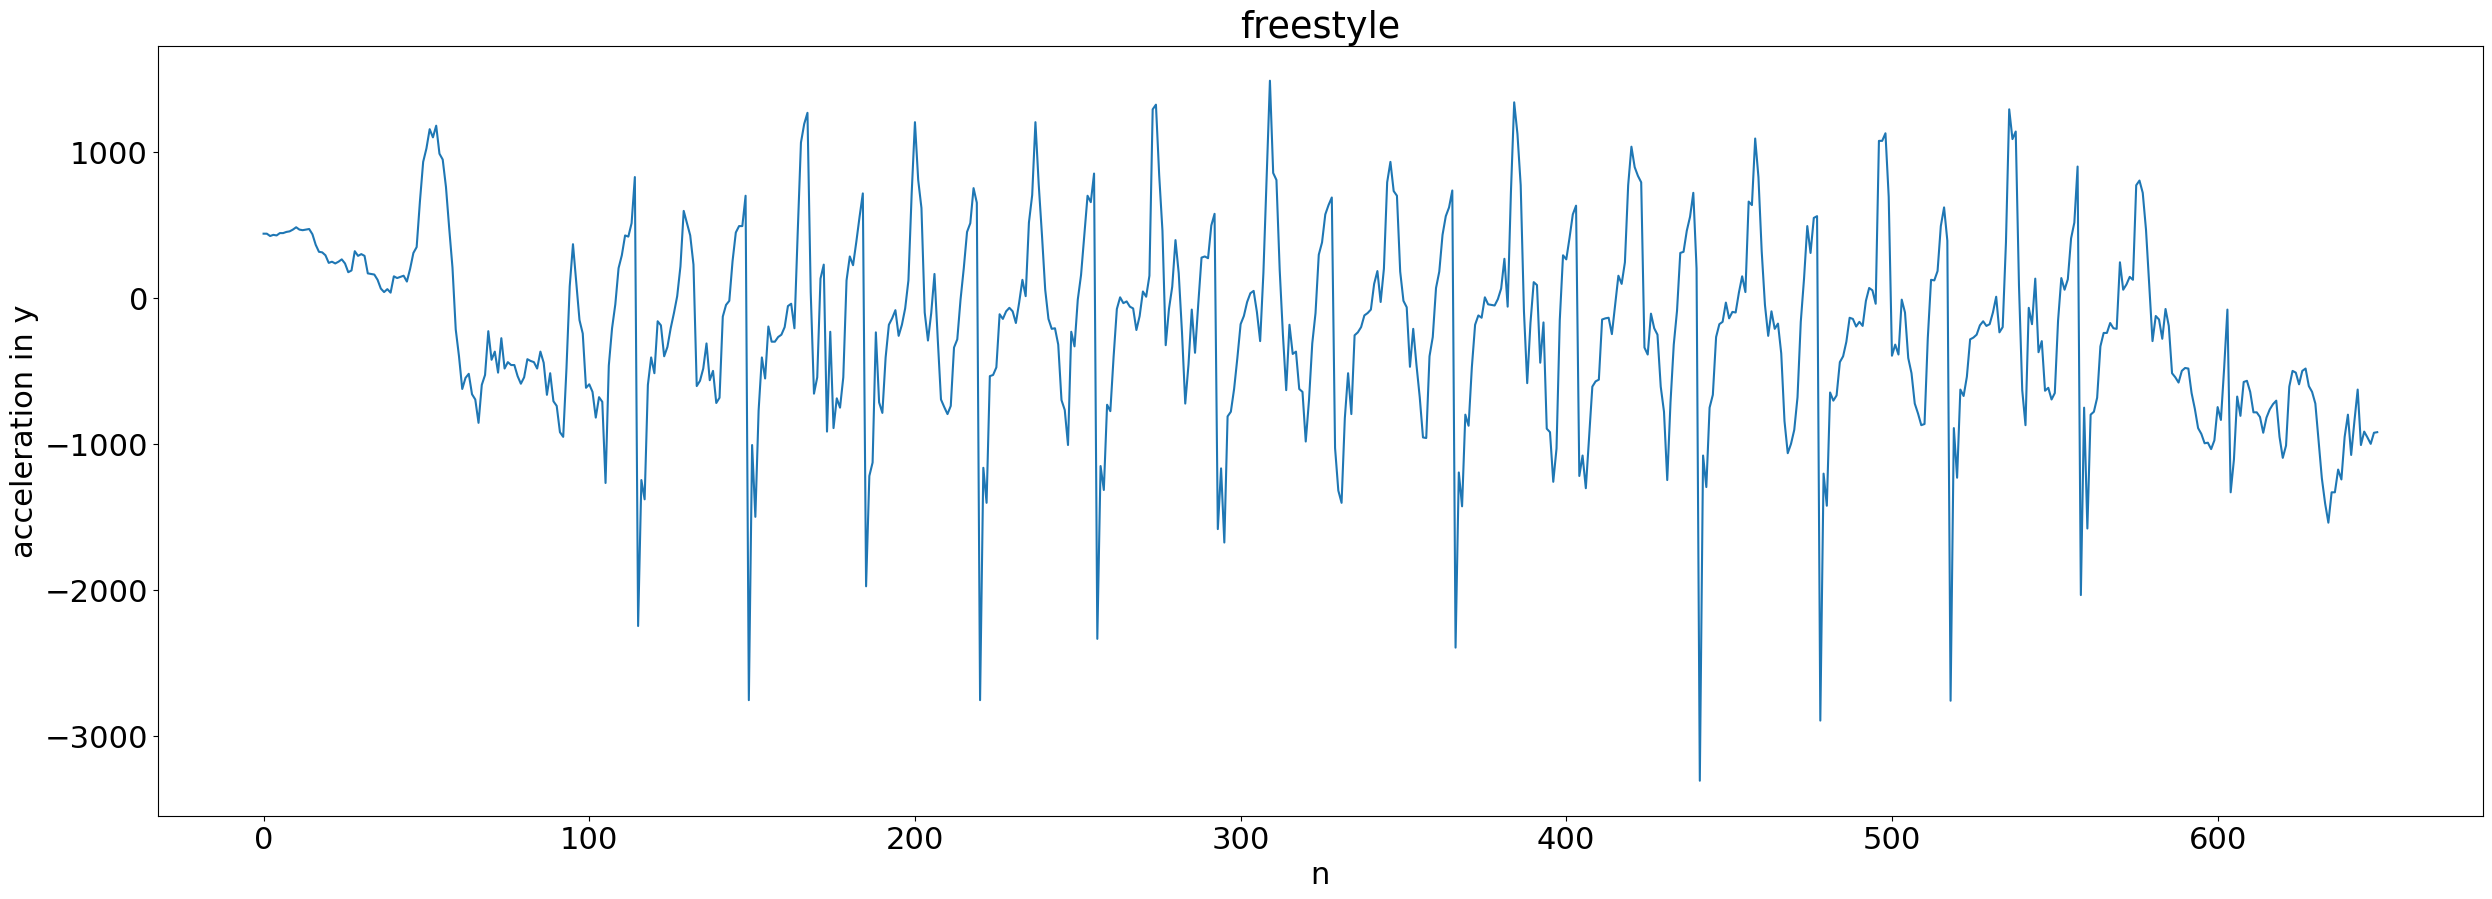

In [19]:
fig = plt.figure(figsize=(30, 10))
z = acc_z[all_dates_i[4]:all_dates_i[5]]
y = acc_y[all_dates_i[4]:all_dates_i[5]]
x = acc_x[all_dates_i[4]:all_dates_i[5]]
plt.plot(z[21650:22300])
plt.title("freestyle")
plt.xlabel("n")
plt.ylabel("acceleration in z")
fig = plt.figure(figsize=(30, 10))
plt.plot(x[21650:22300])
plt.title("freestyle")
plt.xlabel("n")
plt.ylabel("acceleration in x")
fig = plt.figure(figsize=(30, 10))
plt.title("freestyle")
plt.plot(y[21650:22300])
plt.xlabel("n")
plt.ylabel("acceleration in y")

In [ ]:
fig = plt.figure(figsize=(30, 6))
plt.plot(acc_z[all_dates_i[9]:all_dates_i[10]])

In [ ]:
track